In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
snapshots_hist = pd.read_csv('/content/drive/MyDrive/New_Snapshots/snapshots_hist.csv')


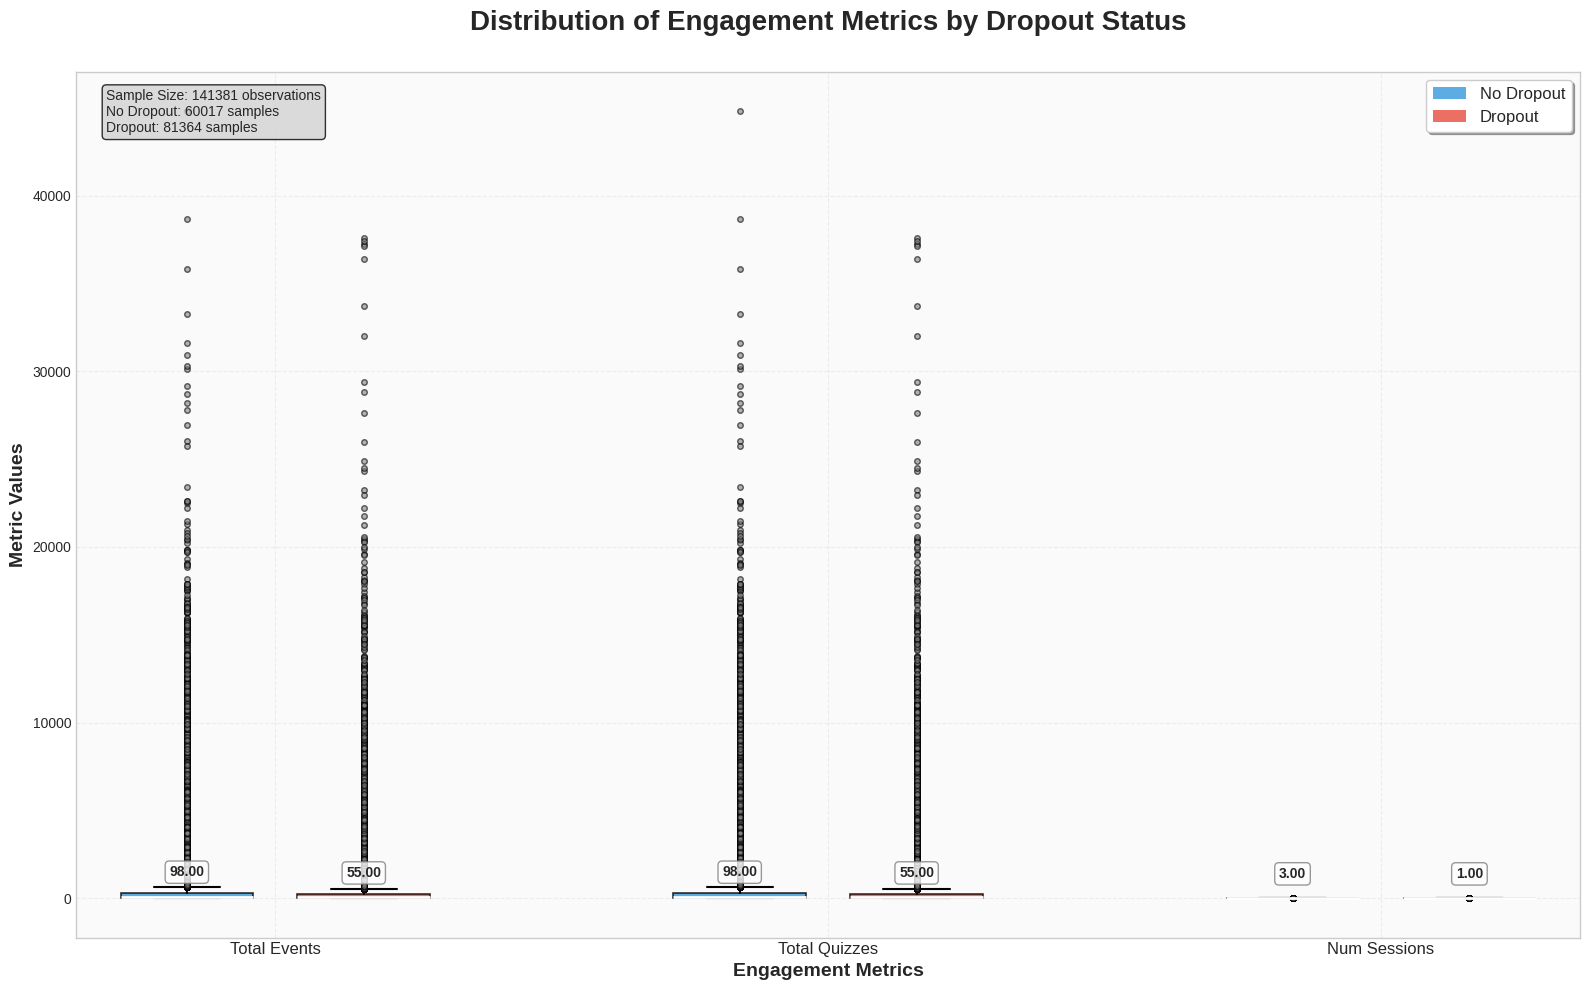

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Set style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create a larger figure with better proportions
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Define colors with better contrast and aesthetics
colors = {
    'no_dropout': '#3498db',  # Professional blue
    'dropout': '#e74c3c',     # Professional red
    'no_dropout_light': '#85c1e9',
    'dropout_light': '#f1948a'
}

# Prepare data for box plots
box_data = []
box_labels = []
box_colors = []
positions = []

# Assuming key_vars is defined - if not, you can uncomment and modify this:
key_vars = ['total_events', 'total_quizzes', 'num_sessions']
pos = 1
for i, var in enumerate(key_vars):
    # No dropout data
    no_dropout_data = snapshots_hist[snapshots_hist['label'] == 0][var].dropna().values
    dropout_data = snapshots_hist[snapshots_hist['label'] == 1][var].dropna().values

    box_data.extend([no_dropout_data, dropout_data])

    # Create cleaner labels
    clean_var_name = var.replace('_', ' ').title()
    box_labels.extend([f'{clean_var_name}\n(No Dropout)', f'{clean_var_name}\n(Dropout)'])
    box_colors.extend([colors['no_dropout'], colors['dropout']])
    positions.extend([pos, pos + 0.8])
    pos += 2.5

# Create the box plot with custom styling
bp = ax.boxplot(box_data,
                positions=positions,
                patch_artist=True,
                widths=0.6,
                showfliers=True,
                flierprops=dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.6),
                medianprops=dict(color='white', linewidth=2),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5))

# Style the boxes
for i, (patch, color) in enumerate(zip(bp['boxes'], box_colors)):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

# Add median value annotations with better styling
for i, (patch, median_line) in enumerate(zip(bp['boxes'], bp['medians'])):
    median_val = median_line.get_ydata()[0]
    x_pos = positions[i]

    # Add median value text with background
    ax.text(x_pos, median_val + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.02,
            f'{median_val:.2f}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))

# Enhance the plot appearance
ax.set_title('Distribution of Engagement Metrics by Dropout Status',
             fontsize=20, fontweight='bold', pad=30)
ax.set_ylabel('Metric Values', fontsize=14, fontweight='bold')
ax.set_xlabel('Engagement Metrics', fontsize=14, fontweight='bold')

# Set custom x-axis labels and positions
label_positions = [(positions[i] + positions[i+1]) / 2 for i in range(0, len(positions), 2)]
clean_labels = [var.replace('_', ' ').title() for var in key_vars]
ax.set_xticks(label_positions)
ax.set_xticklabels(clean_labels, fontsize=12, rotation=0)

# Add a professional legend
legend_elements = [
    Patch(facecolor=colors['no_dropout'], alpha=0.8, label='No Dropout'),
    Patch(facecolor=colors['dropout'], alpha=0.8, label='Dropout')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12, frameon=True,
          fancybox=True, shadow=True)

# Improve grid appearance
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add statistical information as text boxes
stats_text = f"Sample Size: {len(snapshots_hist)} observations\n"
stats_text += f"No Dropout: {len(snapshots_hist[snapshots_hist['label'] == 0])} samples\n"
stats_text += f"Dropout: {len(snapshots_hist[snapshots_hist['label'] == 1])} samples"

ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

# Add subtle background color
ax.set_facecolor('#fafafa')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Optional: Add annotations for significant differences
# You can uncomment and modify this section if you want to add statistical significance indicators
"""
from scipy import stats

for i, var in enumerate(key_vars):
    no_dropout = snapshots_hist[snapshots_hist['label'] == 0][var].dropna()
    dropout = snapshots_hist[snapshots_hist['label'] == 1][var].dropna()

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(no_dropout, dropout)

    if p_value < 0.05:
        # Add significance indicator
        y_max = max(no_dropout.max(), dropout.max())
        y_pos = y_max + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05
        x_pos = label_positions[i]

        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*"
        ax.text(x_pos, y_pos, significance, ha='center', va='bottom',
                fontsize=16, fontweight='bold', color='red')
"""

# Show the plot
plt.show()

# Optional: Save the plot with high DPI
# plt.savefig('engagement_boxplot_enhanced.png', dpi=300, bbox_inches='tight',
#             facecolor='white', edgecolor='none')

=== TARGET VARIABLE ANALYSIS: DROPOUT PREDICTION ===

1. BASIC DROPOUT STATISTICS
Total observations: 141,381
Non-dropouts (label=0): 60,017 (42.5%)
Dropouts (label=1): 81,364 (57.5%)
Overall dropout rate: 0.575 (57.5%)
Class imbalance ratio (non-dropout:dropout): 0.74:1
✅ Relatively balanced classes


2. TEMPORAL PATTERNS IN DROPOUT
Monthly Dropout Patterns:
               total_snapshots  total_dropouts  dropout_rate    month
snapshot_date                                                        
2021-08                   5389            4524         0.839  2021-08
2021-09                   1082             695         0.642  2021-09
2021-10                   2243            1333         0.594  2021-10
2021-11                   1760             938         0.533  2021-11
2021-12                   4300            2157         0.502  2021-12
2022-01                   4255            1294         0.304  2022-01
2022-02                   4384            3006         0.686  2022-02
2022-03 

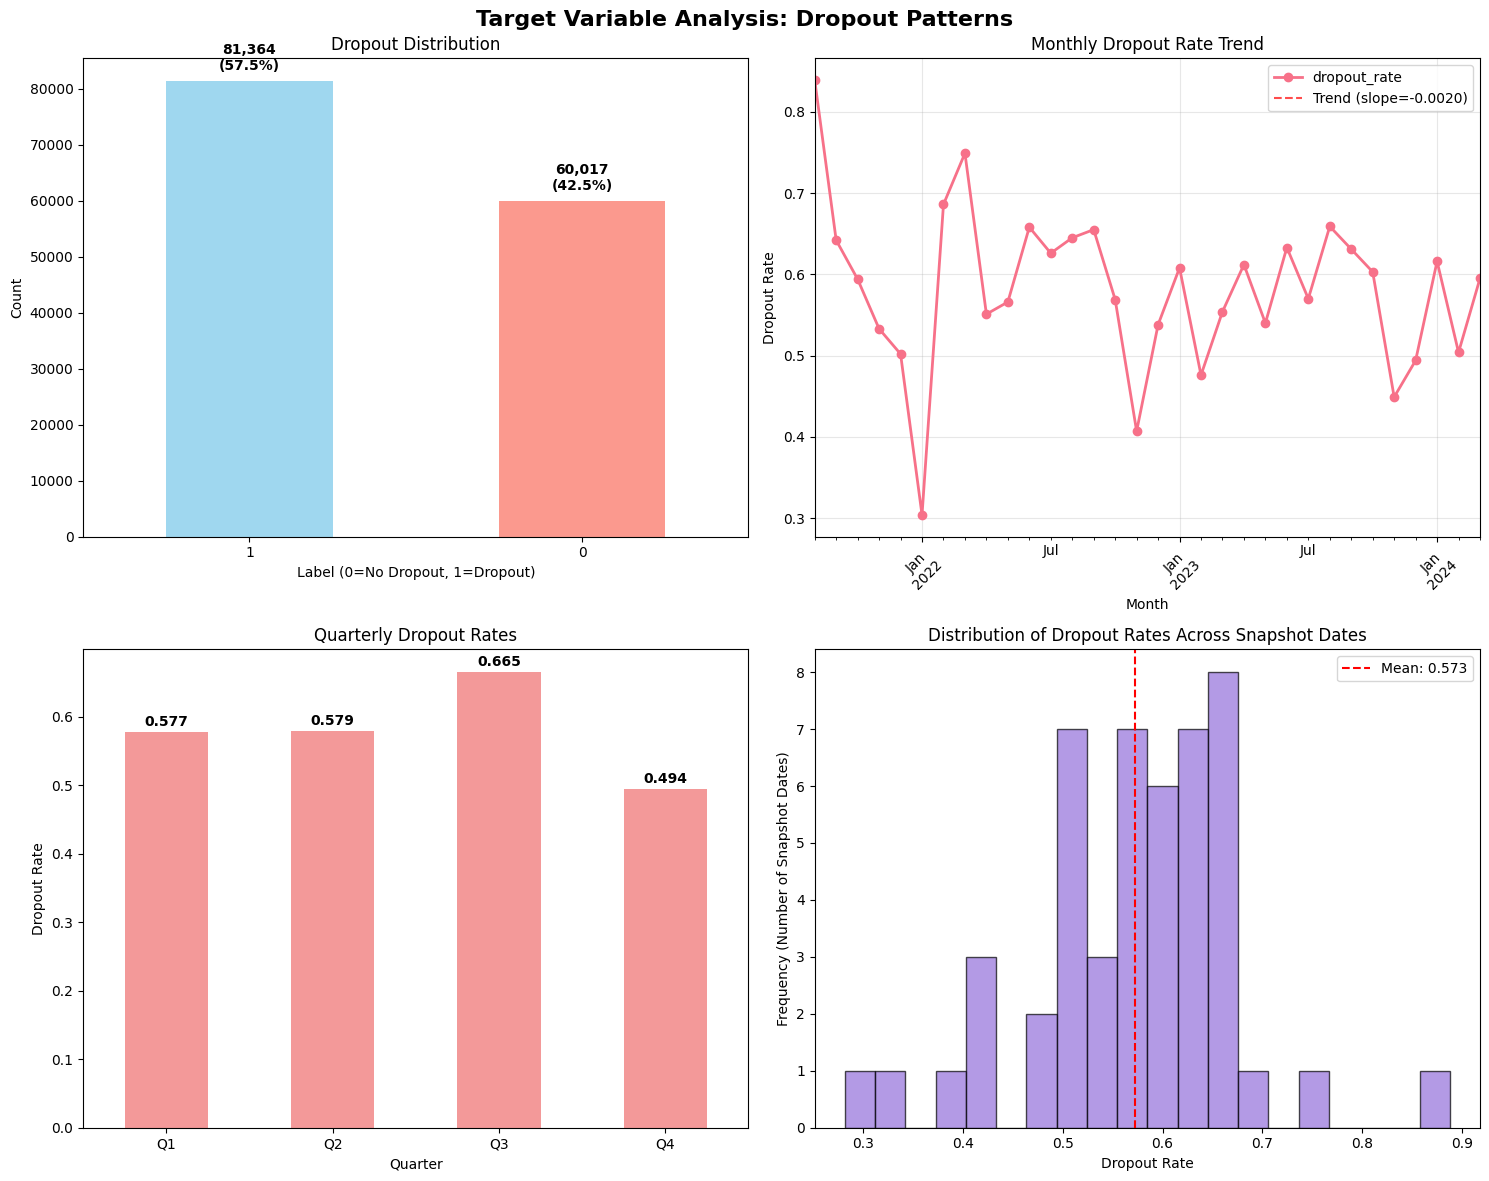



4. STATISTICAL INSIGHTS
Temporal trend analysis:
Correlation between time and dropout: -0.0421
P-value: 0.0000
📉 Statistically significant DECREASING dropout trend over time

Dropout rate variance across snapshots: 0.011013
Standard deviation: 0.1049
⚠️  High variance in dropout rates - investigate temporal factors


5. KEY INSIGHTS & RECOMMENDATIONS
🔍 TARGET VARIABLE INSIGHTS:
• Overall dropout rate: 57.5% - High dropout rate
• Class balance: 0.7:1 ratio - Acceptable balance
• Temporal trend: Dropout rates are decreasing over time
• Seasonal pattern: Best performance in Q4, worst in Q3

📊 MODELING RECOMMENDATIONS:
• Include temporal features in your model
• Consider time-series cross-validation
• Monitor model performance across different time periods
• Consider ensemble methods for robust predictions



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Assuming your dataframe is named snapshots_hist
# snapshots_hist = pd.read_csv('first_2000_snapshots_hist.csv')

print("=== TARGET VARIABLE ANALYSIS: DROPOUT PREDICTION ===\n")

# 1. BASIC DROPOUT STATISTICS
print("1. BASIC DROPOUT STATISTICS")
print("=" * 40)
dropout_counts = snapshots_hist['label'].value_counts()
dropout_rate = snapshots_hist['label'].mean()

print(f"Total observations: {len(snapshots_hist):,}")
print(f"Non-dropouts (label=0): {dropout_counts[0]:,} ({dropout_counts[0]/len(snapshots_hist)*100:.1f}%)")
print(f"Dropouts (label=1): {dropout_counts[1]:,} ({dropout_counts[1]/len(snapshots_hist)*100:.1f}%)")
print(f"Overall dropout rate: {dropout_rate:.3f} ({dropout_rate*100:.1f}%)")

# Check for class imbalance
imbalance_ratio = dropout_counts[0] / dropout_counts[1] if dropout_counts[1] > 0 else float('inf')
print(f"Class imbalance ratio (non-dropout:dropout): {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("⚠️  Significant class imbalance detected - consider sampling techniques")
elif imbalance_ratio > 1.5:
    print("⚠️  Moderate class imbalance - monitor model performance carefully")
else:
    print("✅ Relatively balanced classes")

print("\n" + "="*50 + "\n")

# 2. TEMPORAL PATTERNS IN DROPOUT
print("2. TEMPORAL PATTERNS IN DROPOUT")
print("=" * 40)

# Convert snapshot_date to datetime if it's not already
snapshots_hist['snapshot_date'] = pd.to_datetime(snapshots_hist['snapshot_date'])

# Monthly dropout rates
monthly_dropout = snapshots_hist.groupby(snapshots_hist['snapshot_date'].dt.to_period('M')).agg({
    'label': ['count', 'sum', 'mean']
}).round(3)
monthly_dropout.columns = ['total_snapshots', 'total_dropouts', 'dropout_rate']
monthly_dropout['month'] = monthly_dropout.index.astype(str)

print("Monthly Dropout Patterns:")
print(monthly_dropout.head(10))

# Find months with highest/lowest dropout rates
highest_dropout_month = monthly_dropout.loc[monthly_dropout['dropout_rate'].idxmax()]
lowest_dropout_month = monthly_dropout.loc[monthly_dropout['dropout_rate'].idxmin()]

print(f"\nHighest dropout rate: {highest_dropout_month['dropout_rate']:.3f} in {highest_dropout_month.name}")
print(f"Lowest dropout rate: {lowest_dropout_month['dropout_rate']:.3f} in {lowest_dropout_month.name}")

# Quarterly patterns
quarterly_dropout = snapshots_hist.groupby(snapshots_hist['snapshot_date'].dt.quarter)['label'].agg(['count', 'sum', 'mean']).round(3)
quarterly_dropout.columns = ['total_snapshots', 'total_dropouts', 'dropout_rate']
quarterly_dropout.index = ['Q1', 'Q2', 'Q3', 'Q4']

print(f"\nQuarterly Dropout Patterns:")
print(quarterly_dropout)

print("\n" + "="*50 + "\n")

# 3. VISUALIZATION CODE
print("3. VISUALIZATION CODE")
print("=" * 40)

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Target Variable Analysis: Dropout Patterns', fontsize=16, fontweight='bold')

# Plot 1: Basic dropout distribution
ax1 = axes[0, 0]
dropout_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], alpha=0.8)
ax1.set_title('Dropout Distribution')
ax1.set_xlabel('Label (0=No Dropout, 1=Dropout)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Add percentages on bars
for i, v in enumerate(dropout_counts.values):
    ax1.text(i, v + len(snapshots_hist)*0.01, f'{v:,}\n({v/len(snapshots_hist)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# Plot 2: Monthly dropout rate trend
ax2 = axes[0, 1]
monthly_dropout['dropout_rate'].plot(kind='line', ax=ax2, marker='o', linewidth=2, markersize=6)
ax2.set_title('Monthly Dropout Rate Trend')
ax2.set_xlabel('Month')
ax2.set_ylabel('Dropout Rate')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(range(len(monthly_dropout)), monthly_dropout['dropout_rate'], 1)
p = np.poly1d(z)
ax2.plot(range(len(monthly_dropout)), p(range(len(monthly_dropout))),
         "--", alpha=0.7, color='red', label=f'Trend (slope={z[0]:.4f})')
ax2.legend()

# Plot 3: Quarterly comparison
ax3 = axes[1, 0]
quarterly_dropout['dropout_rate'].plot(kind='bar', ax=ax3, color='lightcoral', alpha=0.8)
ax3.set_title('Quarterly Dropout Rates')
ax3.set_xlabel('Quarter')
ax3.set_ylabel('Dropout Rate')
ax3.tick_params(axis='x', rotation=0)

# Add values on bars
for i, v in enumerate(quarterly_dropout['dropout_rate'].values):
    ax3.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Dropout rate distribution across snapshots
ax4 = axes[1, 1]
snapshot_dropout_rates = snapshots_hist.groupby('snapshot_date')['label'].mean()
ax4.hist(snapshot_dropout_rates, bins=20, alpha=0.7, color='mediumpurple', edgecolor='black')
ax4.set_title('Distribution of Dropout Rates Across Snapshot Dates')
ax4.set_xlabel('Dropout Rate')
ax4.set_ylabel('Frequency (Number of Snapshot Dates)')
ax4.axvline(snapshot_dropout_rates.mean(), color='red', linestyle='--',
           label=f'Mean: {snapshot_dropout_rates.mean():.3f}')
ax4.legend()

plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")

# 4. STATISTICAL TESTS AND INSIGHTS
print("4. STATISTICAL INSIGHTS")
print("=" * 40)

# Time trend analysis
from scipy import stats
time_numeric = pd.to_numeric(snapshots_hist['snapshot_date'])
correlation, p_value = stats.pearsonr(time_numeric, snapshots_hist['label'])

print(f"Temporal trend analysis:")
print(f"Correlation between time and dropout: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    if correlation > 0:
        print("📈 Statistically significant INCREASING dropout trend over time")
    else:
        print("📉 Statistically significant DECREASING dropout trend over time")
else:
    print("📊 No statistically significant temporal trend in dropout rates")

# Variance analysis
dropout_variance = snapshot_dropout_rates.var()
print(f"\nDropout rate variance across snapshots: {dropout_variance:.6f}")
print(f"Standard deviation: {np.sqrt(dropout_variance):.4f}")

if dropout_variance > 0.01:
    print("⚠️  High variance in dropout rates - investigate temporal factors")
elif dropout_variance > 0.005:
    print("⚠️  Moderate variance in dropout rates - some temporal variation")
else:
    print("✅ Low variance in dropout rates - relatively stable over time")

print("\n" + "="*50 + "\n")

# 5. ACTIONABLE INSIGHTS
print("5. KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 40)

print("🔍 TARGET VARIABLE INSIGHTS:")
print(f"• Overall dropout rate: {dropout_rate*100:.1f}% - {'High' if dropout_rate > 0.3 else 'Moderate' if dropout_rate > 0.15 else 'Low'} dropout rate")
print(f"• Class balance: {imbalance_ratio:.1f}:1 ratio - {'Handle imbalance' if imbalance_ratio > 2 else 'Acceptable balance'}")

if len(monthly_dropout) > 3:
    trend_direction = "increasing" if monthly_dropout['dropout_rate'].iloc[-1] > monthly_dropout['dropout_rate'].iloc[0] else "decreasing"
    print(f"• Temporal trend: Dropout rates are {trend_direction} over time")

best_quarter = quarterly_dropout['dropout_rate'].idxmin()
worst_quarter = quarterly_dropout['dropout_rate'].idxmax()
print(f"• Seasonal pattern: Best performance in {best_quarter}, worst in {worst_quarter}")

print(f"\n📊 MODELING RECOMMENDATIONS:")
if imbalance_ratio > 3:
    print("• Use stratified sampling or SMOTE for class imbalance")
if dropout_variance > 0.01:
    print("• Include temporal features in your model")
    print("• Consider time-series cross-validation")
print("• Monitor model performance across different time periods")
print("• Consider ensemble methods for robust predictions")

print("\n" + "="*60)


=== USER ENGAGEMENT PATTERNS ANALYSIS ===

1. OVERALL ENGAGEMENT STATISTICS
Engagement Variables Summary:
       total_events  total_quizzes  sum_component_time  avg_component_time  \
count     141381.00      141381.00           141381.00           141381.00   
mean         398.07         398.07            34379.66               81.49   
std         1268.15        1268.15           123717.60               47.42   
min            1.00           1.00                0.00                0.00   
25%           18.00          18.00             1275.00               48.78   
50%           73.00          73.00             5504.00               76.42   
75%          240.00         240.00            18589.00              106.58   
max        44812.00       44812.00          5882889.00              300.00   

       num_sessions  pct_completed  
count     141381.00      141381.00  
mean           2.16           0.79  
std            2.40           0.28  
min            0.00           0.00  
25%   

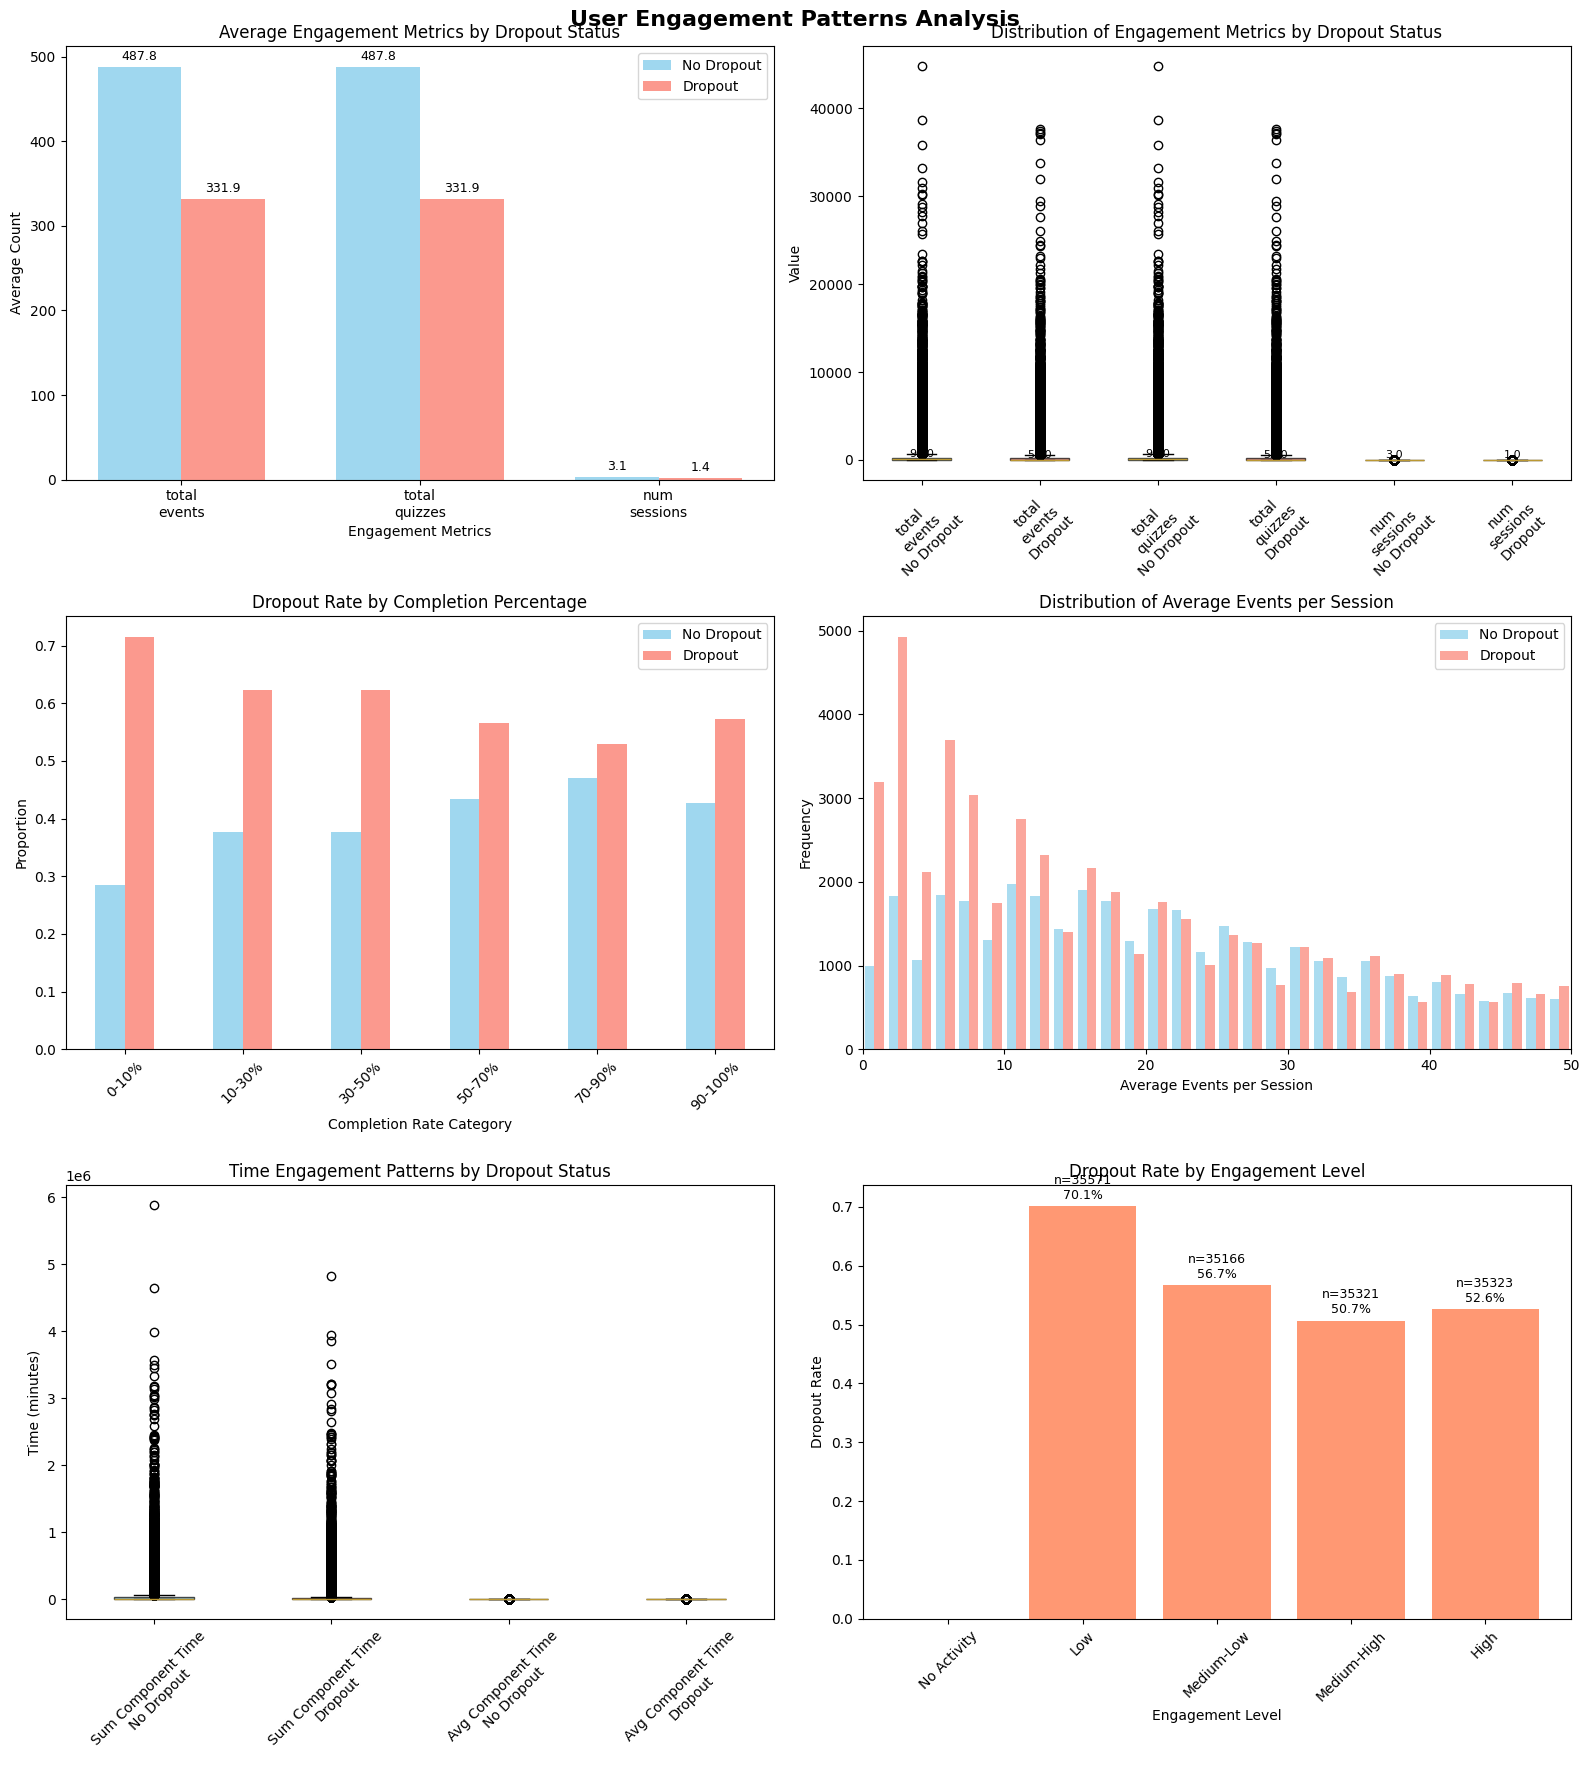



6. ENGAGEMENT VARIABLES CORRELATION ANALYSIS
Correlation with Dropout (negative = lower dropout risk):
num_sessions        :  -0.347 (Strong  ) ↓ Lower dropout risk
avg_component_time  :  -0.076 (Weak    ) → Weak relationship
sum_component_time  :  -0.068 (Weak    ) → Weak relationship
total_quizzes       :  -0.061 (Weak    ) → Weak relationship
total_events        :  -0.061 (Weak    ) → Weak relationship
pct_completed       :  -0.060 (Weak    ) → Weak relationship


7. KEY INSIGHTS & RECOMMENDATIONS
🔍 ENGAGEMENT PATTERN INSIGHTS:
• Most predictive engagement variable: num_sessions (r = -0.347)

📊 MODELING RECOMMENDATIONS:
• 5/6 engagement variables show significant differences
• Include engagement level categories as features
• Consider ratio features (e.g., events per session, completion efficiency)
• Strong engagement predictors detected - prioritize these features
• Monitor for potential multicollinearity between engagement metrics
• Consider non-linear relationships for engageme

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Assuming your dataframe is named snapshots_hist
# snapshots_hist = pd.read_csv('first_2000_snapshots_hist.csv')

print("=== USER ENGAGEMENT PATTERNS ANALYSIS ===\n")

# 1. OVERALL ENGAGEMENT STATISTICS
print("1. OVERALL ENGAGEMENT STATISTICS")
print("=" * 50)

engagement_vars = ['total_events', 'total_quizzes', 'sum_component_time',
                   'avg_component_time', 'num_sessions', 'pct_completed']

# Basic statistics for engagement variables
print("Engagement Variables Summary:")
engagement_stats = snapshots_hist[engagement_vars].describe()
print(engagement_stats.round(2))

# Check for zero engagement users
zero_engagement = snapshots_hist[snapshots_hist['total_events'] == 0]
print(f"\nUsers with zero events: {len(zero_engagement):,} ({len(zero_engagement)/len(snapshots_hist)*100:.1f}%)")

print("\n" + "="*60 + "\n")

# 2. ENGAGEMENT BY DROPOUT STATUS
print("2. ENGAGEMENT PATTERNS BY DROPOUT STATUS")
print("=" * 50)

# Compare engagement metrics between dropouts and non-dropouts
engagement_by_dropout = snapshots_hist.groupby('label')[engagement_vars].agg(['mean', 'median', 'std']).round(3)

print("Engagement Metrics by Dropout Status:")
print("(0 = No Dropout, 1 = Dropout)\n")

for var in engagement_vars:
    print(f"{var.upper()}:")
    print(f"  Non-Dropout (0): Mean={engagement_by_dropout[(var, 'mean')][0]:.2f}, "
          f"Median={engagement_by_dropout[(var, 'median')][0]:.2f}")
    print(f"  Dropout (1):     Mean={engagement_by_dropout[(var, 'mean')][1]:.2f}, "
          f"Median={engagement_by_dropout[(var, 'median')][1]:.2f}")

    # Calculate percentage difference
    pct_diff = ((engagement_by_dropout[(var, 'mean')][0] - engagement_by_dropout[(var, 'mean')][1]) /
                engagement_by_dropout[(var, 'mean')][1] * 100)
    print(f"  Difference: {pct_diff:.1f}% {'higher' if pct_diff > 0 else 'lower'} for non-dropouts")
    print()

print("\n" + "="*60 + "\n")

# 3. STATISTICAL SIGNIFICANCE TESTS
print("3. STATISTICAL SIGNIFICANCE TESTS")
print("=" * 50)

print("Mann-Whitney U Test Results (Non-parametric test for group differences):")
print("H0: No difference in engagement between dropout groups\n")

non_dropouts = snapshots_hist[snapshots_hist['label'] == 0]
dropouts = snapshots_hist[snapshots_hist['label'] == 1]

significant_vars = []
for var in engagement_vars:
    if var in snapshots_hist.columns:
        statistic, p_value = stats.mannwhitneyu(
            non_dropouts[var].dropna(),
            dropouts[var].dropna(),
            alternative='two-sided'
        )

        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        print(f"{var:20s}: p-value = {p_value:.6f} {significance}")

        if p_value < 0.05:
            significant_vars.append(var)

print(f"\nSignificant variables (p < 0.05): {len(significant_vars)}/{len(engagement_vars)}")
print("Legend: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

print("\n" + "="*60 + "\n")

# 4. ENGAGEMENT LEVEL CATEGORIZATION
print("4. ENGAGEMENT LEVEL CATEGORIZATION")
print("=" * 50)

# Create engagement categories based on quartiles
def categorize_engagement(df, var):
    q25, q50, q75 = df[var].quantile([0.25, 0.5, 0.75])
    categories = []
    for val in df[var]:
        if pd.isna(val) or val == 0:
            categories.append('No Activity')
        elif val <= q25:
            categories.append('Low')
        elif val <= q50:
            categories.append('Medium-Low')
        elif val <= q75:
            categories.append('Medium-High')
        else:
            categories.append('High')
    return categories

# Categorize users by total events
snapshots_hist['engagement_level'] = categorize_engagement(snapshots_hist, 'total_events')

engagement_dropout = pd.crosstab(snapshots_hist['engagement_level'], snapshots_hist['label'], normalize='index')
engagement_dropout.columns = ['No Dropout', 'Dropout']

print("Dropout Rate by Engagement Level (based on total_events):")
print((engagement_dropout * 100).round(1))

# Chi-square test for independence
chi2, p_chi2, dof, expected = stats.chi2_contingency(pd.crosstab(snapshots_hist['engagement_level'], snapshots_hist['label']))
print(f"\nChi-square test: χ² = {chi2:.3f}, p-value = {p_chi2:.6f}")
print("Engagement level and dropout are", "significantly related" if p_chi2 < 0.05 else "not significantly related")

print("\n" + "="*60 + "\n")

# 5. COMPREHENSIVE VISUALIZATIONS
print("5. CREATING COMPREHENSIVE VISUALIZATIONS")
print("=" * 50)

# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('User Engagement Patterns Analysis', fontsize=16, fontweight='bold')

# Plot 1: Distribution of key engagement metrics by dropout status
ax1 = axes[0, 0]
key_vars = ['total_events', 'total_quizzes', 'num_sessions']
x_pos = np.arange(len(key_vars))
width = 0.35

means_no_dropout = [non_dropouts[var].mean() for var in key_vars]
means_dropout = [dropouts[var].mean() for var in key_vars]

bars1 = ax1.bar(x_pos - width/2, means_no_dropout, width, label='No Dropout', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x_pos + width/2, means_dropout, width, label='Dropout', alpha=0.8, color='salmon')

ax1.set_xlabel('Engagement Metrics')
ax1.set_ylabel('Average Count')
ax1.set_title('Average Engagement Metrics by Dropout Status')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([var.replace('_', '\n') for var in key_vars])
ax1.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Plot 2: Box plots for engagement variables
ax2 = axes[0, 1]
# Create separate box plots for each variable
box_data = []
box_labels = []
box_colors = []

for var in key_vars:
    box_data.extend([snapshots_hist[snapshots_hist['label'] == 0][var].dropna().values,
                     snapshots_hist[snapshots_hist['label'] == 1][var].dropna().values])
    box_labels.extend([f'{var}\nNo Dropout', f'{var}\nDropout'])
    box_colors.extend(['skyblue', 'salmon'])

bp = ax2.boxplot(box_data, labels=[label.replace('_', '\n') for label in box_labels], patch_artist=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Distribution of Engagement Metrics by Dropout Status')
ax2.set_ylabel('Value')
ax2.tick_params(axis='x', rotation=45)

# Add median lines
for i, patch in enumerate(bp['boxes']):
    median_val = bp['medians'][i].get_ydata()[0]
    ax2.text(i+1, median_val, f'{median_val:.1f}', ha='center', va='bottom', fontsize=8)

# Plot 3: Completion rate analysis
ax3 = axes[1, 0]
completion_bins = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.01]
completion_labels = ['0-10%', '10-30%', '30-50%', '50-70%', '70-90%', '90-100%']
snapshots_hist['completion_category'] = pd.cut(snapshots_hist['pct_completed'],
                                              bins=completion_bins,
                                              labels=completion_labels,
                                              include_lowest=True)

completion_dropout = pd.crosstab(snapshots_hist['completion_category'], snapshots_hist['label'], normalize='index')
completion_dropout.plot(kind='bar', ax=ax3, color=['skyblue', 'salmon'], alpha=0.8)
ax3.set_title('Dropout Rate by Completion Percentage')
ax3.set_xlabel('Completion Rate Category')
ax3.set_ylabel('Proportion')
ax3.legend(['No Dropout', 'Dropout'])
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Session intensity analysis
ax4 = axes[1, 1]
# Calculate avg events per session safely
snapshots_hist['avg_events_per_session'] = snapshots_hist['total_events'] / np.maximum(snapshots_hist['num_sessions'], 1)

# Get data for each group
no_dropout_intensity = snapshots_hist[snapshots_hist['label'] == 0]['avg_events_per_session'].dropna()
dropout_intensity = snapshots_hist[snapshots_hist['label'] == 1]['avg_events_per_session'].dropna()

# Set reasonable xlim based on data
max_val = min(50, snapshots_hist['avg_events_per_session'].quantile(0.95))

ax4.hist([no_dropout_intensity, dropout_intensity], bins=30, alpha=0.7,
         label=['No Dropout', 'Dropout'], color=['skyblue', 'salmon'],
         range=(0, max_val))
ax4.set_title('Distribution of Average Events per Session')
ax4.set_xlabel('Average Events per Session')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.set_xlim(0, max_val)

# Plot 5: Time engagement patterns
ax5 = axes[2, 0]
time_vars = ['sum_component_time', 'avg_component_time']

# Prepare data for box plots
all_data = []
all_labels = []
all_colors = []

for var in time_vars:
    no_dropout_data = snapshots_hist[snapshots_hist['label'] == 0][var].dropna()
    dropout_data = snapshots_hist[snapshots_hist['label'] == 1][var].dropna()

    all_data.extend([no_dropout_data, dropout_data])
    var_clean = var.replace('_', ' ').title()
    all_labels.extend([f'{var_clean}\nNo Dropout', f'{var_clean}\nDropout'])
    all_colors.extend(['skyblue', 'salmon'])

bp = ax5.boxplot(all_data, labels=all_labels, patch_artist=True)
for patch, color in zip(bp['boxes'], all_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax5.set_title('Time Engagement Patterns by Dropout Status')
ax5.set_ylabel('Time (minutes)')
ax5.tick_params(axis='x', rotation=45)

# Plot 6: Engagement level vs dropout rate
ax6 = axes[2, 1]
engagement_order = ['No Activity', 'Low', 'Medium-Low', 'Medium-High', 'High']
dropout_rates = []
counts = []

for level in engagement_order:
    subset = snapshots_hist[snapshots_hist['engagement_level'] == level]
    if len(subset) > 0:
        dropout_rate = subset['label'].mean()
        count = len(subset)
    else:
        dropout_rate = 0
        count = 0
    dropout_rates.append(dropout_rate)
    counts.append(count)

bars = ax6.bar(range(len(engagement_order)), dropout_rates, alpha=0.8, color='coral')
ax6.set_title('Dropout Rate by Engagement Level')
ax6.set_xlabel('Engagement Level')
ax6.set_ylabel('Dropout Rate')
ax6.set_xticks(range(len(engagement_order)))
ax6.set_xticklabels(engagement_order, rotation=45)

# Add count labels on bars
for i, (bar, count, rate) in enumerate(zip(bars, counts, dropout_rates)):
    if count > 0:
        ax6.annotate(f'n={count}\n{rate:.1%}',
                    xy=(bar.get_x() + bar.get_width() / 2, rate),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")

# 6. CORRELATION ANALYSIS
print("6. ENGAGEMENT VARIABLES CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlations between engagement variables and dropout
correlations = snapshots_hist[engagement_vars + ['label']].corr()['label'].drop('label').sort_values()

print("Correlation with Dropout (negative = lower dropout risk):")
for var, corr in correlations.items():
    direction = "↓ Lower dropout risk" if corr < -0.1 else "↑ Higher dropout risk" if corr > 0.1 else "→ Weak relationship"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    print(f"{var:20s}: {corr:7.3f} ({strength:8s}) {direction}")

print("\n" + "="*60 + "\n")

# 7. KEY INSIGHTS AND RECOMMENDATIONS
print("7. KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 50)

print("🔍 ENGAGEMENT PATTERN INSIGHTS:")

# Find the most predictive engagement variable
best_predictor = correlations.abs().idxmax()
best_correlation = correlations[best_predictor]
print(f"• Most predictive engagement variable: {best_predictor} (r = {best_correlation:.3f})")

# Activity level insights
high_engagement = snapshots_hist[snapshots_hist['engagement_level'] == 'High']
no_activity = snapshots_hist[snapshots_hist['engagement_level'] == 'No Activity']

if len(high_engagement) > 0 and len(no_activity) > 0:
    high_dropout_rate = high_engagement['label'].mean()
    no_activity_dropout_rate = no_activity['label'].mean()
    print(f"• High engagement users: {high_dropout_rate:.1%} dropout rate")
    print(f"• No activity users: {no_activity_dropout_rate:.1%} dropout rate")

# Time-based insights
avg_time_corr = correlations.get('avg_component_time', 0)
if abs(avg_time_corr) > 0.1:
    print(f"• Average component time is {'negatively' if avg_time_corr < 0 else 'positively'} related to dropout")

print(f"\n📊 MODELING RECOMMENDATIONS:")
significant_count = len([var for var in engagement_vars if var in significant_vars])
print(f"• {significant_count}/{len(engagement_vars)} engagement variables show significant differences")
print(f"• Include engagement level categories as features")
print(f"• Consider ratio features (e.g., events per session, completion efficiency)")

if any(abs(correlations[var]) > 0.2 for var in engagement_vars):
    print(f"• Strong engagement predictors detected - prioritize these features")

print(f"• Monitor for potential multicollinearity between engagement metrics")
print(f"• Consider non-linear relationships for engagement variables")

print("\n" + "="*70)

=== TEMPORAL BEHAVIOR ANALYSIS ===

1. RECENCY PATTERNS ANALYSIS
Recency Variables Summary:
       days_since_last_event  days_since_last_quiz  days_since_join
count              141381.00             141381.00        141381.00
mean                   11.19                 18.07           106.93
std                     9.34                 33.43           106.49
min                     0.00                  0.00            30.00
25%                     3.00                  4.00            51.00
50%                     9.00                 11.00            75.00
75%                    19.00                 22.00           113.00
max                    29.00                608.00          1354.00

Recency Patterns by Dropout Status:
(0 = No Dropout, 1 = Dropout)

DAYS_SINCE_LAST_EVENT:
  Non-Dropout: Mean=6.5 days, Median=4.0 days
  Dropout:     Mean=14.7 days, Median=15.0 days
  Statistical significance: p = 0.0000 ***

DAYS_SINCE_LAST_QUIZ:
  Non-Dropout: Mean=9.7 days, Median=5.0 days

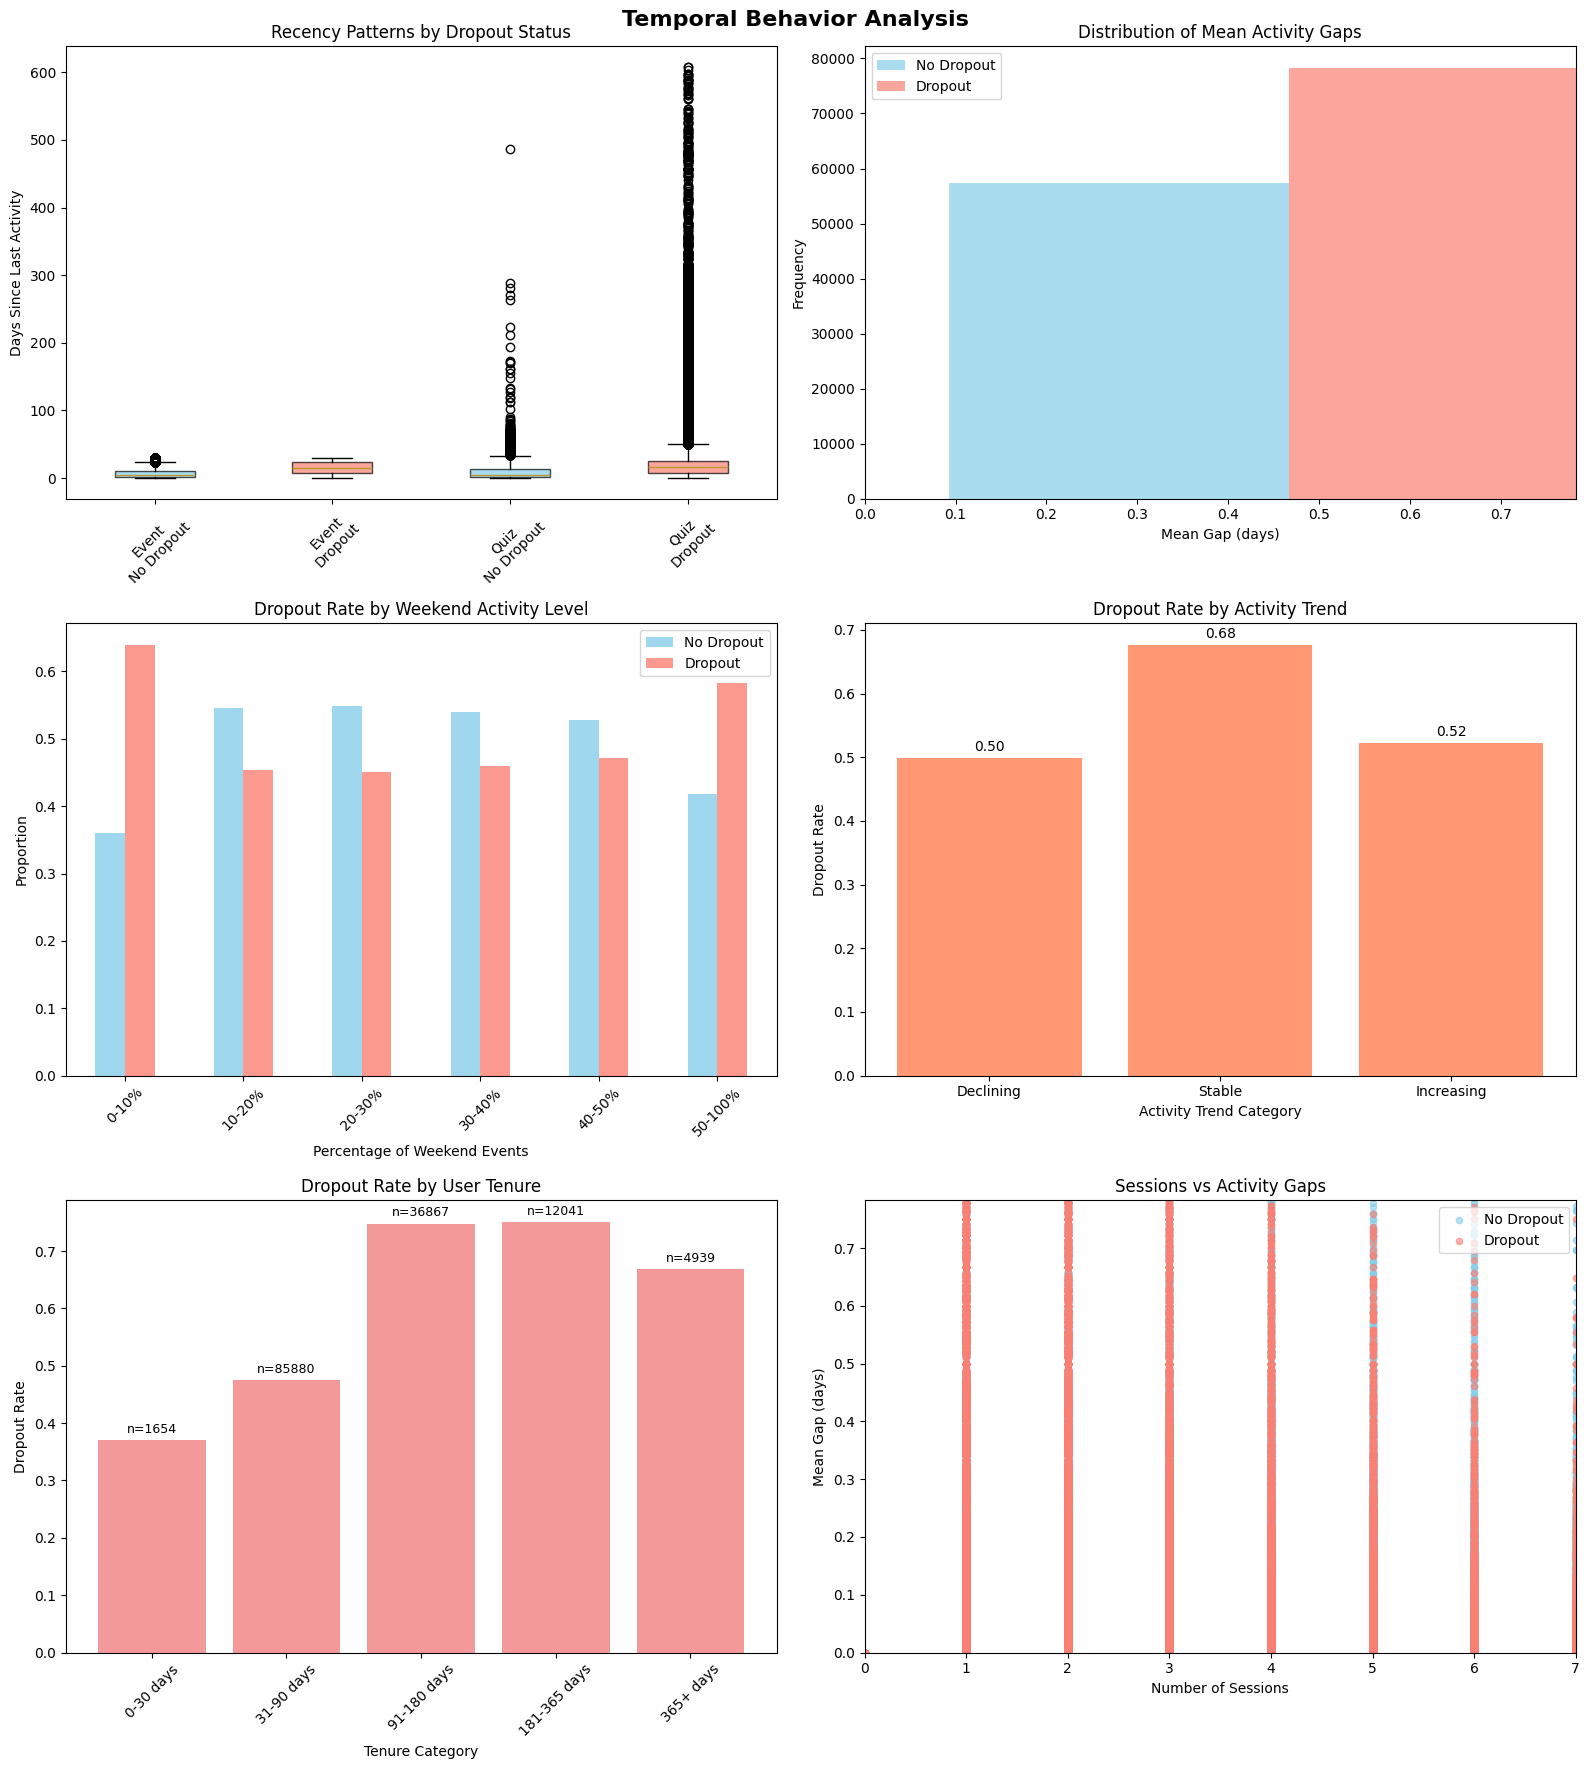



6. TEMPORAL CORRELATION ANALYSIS
Correlation with Dropout (negative = lower dropout risk):
num_sessions             :  -0.347 (Strong  ) ↓ Lower dropout risk
max_gap                  :  -0.254 (Moderate) ↓ Lower dropout risk
mean_gap                 :  -0.044 (Weak    ) → Weak relationship
pct_weekend_events       :  -0.027 (Weak    ) → Weak relationship
activity_trend           :   0.015 (Weak    ) → Weak relationship
days_since_join          :   0.158 (Moderate) ↑ Higher dropout risk
days_since_last_quiz     :   0.214 (Moderate) ↑ Higher dropout risk
days_since_last_event    :   0.434 (Strong  ) ↑ Higher dropout risk

Temporal Variables Correlation Matrix:
                       days_since_last_event  days_since_last_quiz  \
days_since_last_event                  1.000                 0.462   
days_since_last_quiz                   0.462                 1.000   
days_since_join                        0.139                 0.253   
mean_gap                              -0.123       

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Assuming your dataframe is named snapshots_hist
# snapshots_hist = pd.read_csv('first_2000_snapshots_hist.csv')

print("=== TEMPORAL BEHAVIOR ANALYSIS ===\n")

# 1. RECENCY PATTERNS ANALYSIS
print("1. RECENCY PATTERNS ANALYSIS")
print("=" * 50)

recency_vars = ['days_since_last_event', 'days_since_last_quiz', 'days_since_join']

# Basic statistics for recency variables
print("Recency Variables Summary:")
recency_stats = snapshots_hist[recency_vars].describe()
print(recency_stats.round(2))

# Analyze recency by dropout status
print("\nRecency Patterns by Dropout Status:")
print("(0 = No Dropout, 1 = Dropout)\n")

non_dropouts = snapshots_hist[snapshots_hist['label'] == 0]
dropouts = snapshots_hist[snapshots_hist['label'] == 1]

for var in recency_vars:
    if var in snapshots_hist.columns:
        mean_no_dropout = non_dropouts[var].mean()
        mean_dropout = dropouts[var].mean()
        median_no_dropout = non_dropouts[var].median()
        median_dropout = dropouts[var].median()

        print(f"{var.upper()}:")
        print(f"  Non-Dropout: Mean={mean_no_dropout:.1f} days, Median={median_no_dropout:.1f} days")
        print(f"  Dropout:     Mean={mean_dropout:.1f} days, Median={median_dropout:.1f} days")

        # Statistical test
        if len(non_dropouts[var].dropna()) > 0 and len(dropouts[var].dropna()) > 0:
            statistic, p_value = stats.mannwhitneyu(
                non_dropouts[var].dropna(),
                dropouts[var].dropna(),
                alternative='two-sided'
            )
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
            print(f"  Statistical significance: p = {p_value:.4f} {significance}")
        print()

print("\n" + "="*60 + "\n")

# 2. ACTIVITY GAP ANALYSIS
print("2. ACTIVITY GAP ANALYSIS")
print("=" * 50)

gap_vars = ['mean_gap', 'max_gap']

if all(var in snapshots_hist.columns for var in gap_vars):
    print("Activity Gap Summary:")
    gap_stats = snapshots_hist[gap_vars].describe()
    print(gap_stats.round(2))

    # Gap patterns by dropout
    print("\nActivity Gap Patterns by Dropout Status:")
    for var in gap_vars:
        mean_no_dropout = non_dropouts[var].mean()
        mean_dropout = dropouts[var].mean()

        print(f"{var.upper()}:")
        print(f"  Non-Dropout: {mean_no_dropout:.2f} days")
        print(f"  Dropout:     {mean_dropout:.2f} days")

        # Correlation with dropout
        correlation = snapshots_hist[var].corr(snapshots_hist['label'])
        print(f"  Correlation with dropout: {correlation:.3f}")
        print()

    # Categorize users by gap patterns
    print("Gap-based Risk Categories:")

    # Create gap categories
    def categorize_gaps(df, var):
        q33, q67 = df[var].quantile([0.33, 0.67])
        categories = []
        for val in df[var]:
            if pd.isna(val):
                categories.append('Unknown')
            elif val <= q33:
                categories.append('Consistent')
            elif val <= q67:
                categories.append('Moderate Gaps')
            else:
                categories.append('Large Gaps')
        return categories

    snapshots_hist['gap_category'] = categorize_gaps(snapshots_hist, 'mean_gap')
    gap_dropout = pd.crosstab(snapshots_hist['gap_category'], snapshots_hist['label'], normalize='index')
    print((gap_dropout * 100).round(1))

print("\n" + "="*60 + "\n")

# 3. LEARNING RHYTHM ANALYSIS
print("3. LEARNING RHYTHM ANALYSIS")
print("=" * 50)

rhythm_vars = ['num_sessions', 'pct_weekend_events', 'activity_trend']

print("Learning Rhythm Summary:")
if all(var in snapshots_hist.columns for var in rhythm_vars):
    rhythm_stats = snapshots_hist[rhythm_vars].describe()
    print(rhythm_stats.round(3))

    print("\nRhythm Patterns by Dropout Status:")
    for var in rhythm_vars:
        mean_no_dropout = non_dropouts[var].mean()
        mean_dropout = dropouts[var].mean()

        print(f"{var.upper()}:")
        print(f"  Non-Dropout: {mean_no_dropout:.3f}")
        print(f"  Dropout:     {mean_dropout:.3f}")

        # Interpretation
        if var == 'pct_weekend_events':
            if mean_no_dropout > mean_dropout:
                print("  → Non-dropouts show more weekend activity")
            else:
                print("  → Dropouts show more weekend activity")
        elif var == 'activity_trend':
            if mean_no_dropout > mean_dropout:
                print("  → Non-dropouts show increasing activity trend")
            else:
                print("  → Dropouts show declining activity trend")
        print()

print("\n" + "="*60 + "\n")

# 4. TENURE AND LIFECYCLE ANALYSIS
print("4. TENURE AND LIFECYCLE ANALYSIS")
print("=" * 50)

# Analyze patterns by user tenure
tenure_bins = [0, 30, 90, 180, 365, float('inf')]
tenure_labels = ['0-30 days', '31-90 days', '91-180 days', '181-365 days', '365+ days']
snapshots_hist['tenure_category'] = pd.cut(snapshots_hist['days_since_join'],
                                          bins=tenure_bins,
                                          labels=tenure_labels,
                                          include_lowest=True)

print("Dropout Rate by User Tenure:")
tenure_dropout = snapshots_hist.groupby('tenure_category').agg({
    'label': ['count', 'sum', 'mean']
}).round(3)
tenure_dropout.columns = ['total_users', 'dropouts', 'dropout_rate']
print(tenure_dropout)

# Find optimal tenure periods
print(f"\nTenure Insights:")
best_tenure = tenure_dropout['dropout_rate'].idxmin()
worst_tenure = tenure_dropout['dropout_rate'].idxmax()
print(f"• Lowest dropout rate: {best_tenure} ({tenure_dropout.loc[best_tenure, 'dropout_rate']:.1%})")
print(f"• Highest dropout rate: {worst_tenure} ({tenure_dropout.loc[worst_tenure, 'dropout_rate']:.1%})")

print("\n" + "="*60 + "\n")

# 5. COMPREHENSIVE TEMPORAL VISUALIZATIONS
print("5. CREATING COMPREHENSIVE TEMPORAL VISUALIZATIONS")
print("=" * 50)

# Create comprehensive visualization dashboard
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Temporal Behavior Analysis', fontsize=16, fontweight='bold')

# Plot 1: Recency patterns
ax1 = axes[0, 0]
recency_data = []
recency_labels = []
recency_colors = []

for var in ['days_since_last_event', 'days_since_last_quiz']:
    if var in snapshots_hist.columns:
        no_dropout_data = snapshots_hist[snapshots_hist['label'] == 0][var].dropna()
        dropout_data = snapshots_hist[snapshots_hist['label'] == 1][var].dropna()

        recency_data.extend([no_dropout_data, dropout_data])
        var_clean = var.replace('days_since_last_', '').replace('_', ' ').title()
        recency_labels.extend([f'{var_clean}\nNo Dropout', f'{var_clean}\nDropout'])
        recency_colors.extend(['skyblue', 'salmon'])

if recency_data:
    bp = ax1.boxplot(recency_data, labels=recency_labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], recency_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

ax1.set_title('Recency Patterns by Dropout Status')
ax1.set_ylabel('Days Since Last Activity')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Activity gaps distribution
ax2 = axes[0, 1]
if 'mean_gap' in snapshots_hist.columns:
    gap_data = [snapshots_hist[snapshots_hist['label'] == 0]['mean_gap'].dropna(),
                snapshots_hist[snapshots_hist['label'] == 1]['mean_gap'].dropna()]

    ax2.hist(gap_data, bins=30, alpha=0.7, label=['No Dropout', 'Dropout'],
             color=['skyblue', 'salmon'])
    ax2.set_title('Distribution of Mean Activity Gaps')
    ax2.set_xlabel('Mean Gap (days)')
    ax2.set_ylabel('Frequency')
    ax2.legend()
    ax2.set_xlim(0, snapshots_hist['mean_gap'].quantile(0.95))

# Plot 3: Weekend activity patterns
ax3 = axes[1, 0]
if 'pct_weekend_events' in snapshots_hist.columns:
    weekend_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.01]
    weekend_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%']
    snapshots_hist['weekend_category'] = pd.cut(snapshots_hist['pct_weekend_events'],
                                               bins=weekend_bins,
                                               labels=weekend_labels,
                                               include_lowest=True)

    weekend_dropout = pd.crosstab(snapshots_hist['weekend_category'], snapshots_hist['label'], normalize='index')
    weekend_dropout.plot(kind='bar', ax=ax3, color=['skyblue', 'salmon'], alpha=0.8)
    ax3.set_title('Dropout Rate by Weekend Activity Level')
    ax3.set_xlabel('Percentage of Weekend Events')
    ax3.set_ylabel('Proportion')
    ax3.legend(['No Dropout', 'Dropout'])
    ax3.tick_params(axis='x', rotation=45)

# Plot 4: Activity trend analysis
ax4 = axes[1, 1]
if 'activity_trend' in snapshots_hist.columns:
    # Create trend categories
    trend_conditions = [
        (snapshots_hist['activity_trend'] < -0.1, 'Declining'),
        (snapshots_hist['activity_trend'].between(-0.1, 0.1), 'Stable'),
        (snapshots_hist['activity_trend'] > 0.1, 'Increasing')
    ]

    snapshots_hist['trend_category'] = 'Stable'  # default
    for condition, label in trend_conditions:
        snapshots_hist.loc[condition, 'trend_category'] = label

    trend_dropout = pd.crosstab(snapshots_hist['trend_category'], snapshots_hist['label'], normalize='index')
    trend_dropout = trend_dropout.reindex(['Declining', 'Stable', 'Increasing'])

    bars = ax4.bar(trend_dropout.index, trend_dropout[1], alpha=0.8, color='coral')
    ax4.set_title('Dropout Rate by Activity Trend')
    ax4.set_xlabel('Activity Trend Category')
    ax4.set_ylabel('Dropout Rate')

    # Add values on bars
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Plot 5: Tenure analysis
ax5 = axes[2, 0]
tenure_dropout_rates = tenure_dropout['dropout_rate'].values
tenure_counts = tenure_dropout['total_users'].values

bars = ax5.bar(range(len(tenure_labels)), tenure_dropout_rates, alpha=0.8, color='lightcoral')
ax5.set_title('Dropout Rate by User Tenure')
ax5.set_xlabel('Tenure Category')
ax5.set_ylabel('Dropout Rate')
ax5.set_xticks(range(len(tenure_labels)))
ax5.set_xticklabels(tenure_labels, rotation=45)

# Add count labels
for i, (bar, count) in enumerate(zip(bars, tenure_counts)):
    height = bar.get_height()
    ax5.annotate(f'n={count}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Plot 6: Sessions vs gaps relationship
ax6 = axes[2, 1]
if 'num_sessions' in snapshots_hist.columns and 'mean_gap' in snapshots_hist.columns:
    # Create scatter plot
    no_dropout_x = snapshots_hist[snapshots_hist['label'] == 0]['num_sessions']
    no_dropout_y = snapshots_hist[snapshots_hist['label'] == 0]['mean_gap']
    dropout_x = snapshots_hist[snapshots_hist['label'] == 1]['num_sessions']
    dropout_y = snapshots_hist[snapshots_hist['label'] == 1]['mean_gap']

    ax6.scatter(no_dropout_x, no_dropout_y, alpha=0.6, color='skyblue',
                label='No Dropout', s=20)
    ax6.scatter(dropout_x, dropout_y, alpha=0.6, color='salmon',
                label='Dropout', s=20)

    ax6.set_title('Sessions vs Activity Gaps')
    ax6.set_xlabel('Number of Sessions')
    ax6.set_ylabel('Mean Gap (days)')
    ax6.legend()
    ax6.set_xlim(0, snapshots_hist['num_sessions'].quantile(0.95))
    ax6.set_ylim(0, snapshots_hist['mean_gap'].quantile(0.95))

plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")

# 6. TEMPORAL CORRELATION ANALYSIS
print("6. TEMPORAL CORRELATION ANALYSIS")
print("=" * 50)

temporal_vars = ['days_since_last_event', 'days_since_last_quiz', 'days_since_join',
                 'mean_gap', 'max_gap', 'num_sessions', 'pct_weekend_events', 'activity_trend']

# Filter only existing variables
existing_temporal_vars = [var for var in temporal_vars if var in snapshots_hist.columns]

# Calculate correlations with dropout
temporal_correlations = snapshots_hist[existing_temporal_vars + ['label']].corr()['label'].drop('label').sort_values()

print("Correlation with Dropout (negative = lower dropout risk):")
for var, corr in temporal_correlations.items():
    direction = "↓ Lower dropout risk" if corr < -0.1 else "↑ Higher dropout risk" if corr > 0.1 else "→ Weak relationship"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    print(f"{var:25s}: {corr:7.3f} ({strength:8s}) {direction}")

# Correlation matrix for temporal variables
print(f"\nTemporal Variables Correlation Matrix:")
temporal_corr_matrix = snapshots_hist[existing_temporal_vars].corr()
print(temporal_corr_matrix.round(3))

print("\n" + "="*60 + "\n")

# 7. TEMPORAL RISK SCORING
print("7. TEMPORAL RISK SCORING")
print("=" * 50)

# Create composite temporal risk score
risk_factors = []

# Recency risk (higher = more risk)
if 'days_since_last_event' in snapshots_hist.columns:
    snapshots_hist['recency_risk'] = (snapshots_hist['days_since_last_event'] >
                                     snapshots_hist['days_since_last_event'].median()).astype(int)
    risk_factors.append('recency_risk')

# Gap risk (higher gaps = more risk)
if 'mean_gap' in snapshots_hist.columns:
    snapshots_hist['gap_risk'] = (snapshots_hist['mean_gap'] >
                                 snapshots_hist['mean_gap'].quantile(0.75)).astype(int)
    risk_factors.append('gap_risk')

# Session frequency risk (fewer sessions = more risk)
if 'num_sessions' in snapshots_hist.columns:
    snapshots_hist['session_risk'] = (snapshots_hist['num_sessions'] <
                                     snapshots_hist['num_sessions'].quantile(0.25)).astype(int)
    risk_factors.append('session_risk')

# Activity trend risk (declining = more risk)
if 'activity_trend' in snapshots_hist.columns:
    snapshots_hist['trend_risk'] = (snapshots_hist['activity_trend'] < 0).astype(int)
    risk_factors.append('trend_risk')

if risk_factors:
    # Calculate composite risk score
    snapshots_hist['temporal_risk_score'] = snapshots_hist[risk_factors].sum(axis=1)

    print("Temporal Risk Score Distribution:")
    risk_distribution = snapshots_hist['temporal_risk_score'].value_counts().sort_index()
    print(risk_distribution)

    print(f"\nDropout Rate by Temporal Risk Score:")
    risk_dropout = snapshots_hist.groupby('temporal_risk_score')['label'].agg(['count', 'mean']).round(3)
    risk_dropout.columns = ['count', 'dropout_rate']
    print(risk_dropout)

    # Risk score effectiveness
    risk_correlation = snapshots_hist['temporal_risk_score'].corr(snapshots_hist['label'])
    print(f"\nTemporal Risk Score correlation with dropout: {risk_correlation:.3f}")

print("\n" + "="*60 + "\n")

# 8. KEY INSIGHTS AND RECOMMENDATIONS
print("8. KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 50)

print("🔍 TEMPORAL BEHAVIOR INSIGHTS:")

# Most predictive temporal variable
if existing_temporal_vars:
    best_temporal_predictor = temporal_correlations.abs().idxmax()
    best_correlation = temporal_correlations[best_temporal_predictor]
    print(f"• Most predictive temporal variable: {best_temporal_predictor} (r = {best_correlation:.3f})")

# Recency insights
if 'days_since_last_event' in snapshots_hist.columns:
    median_recency_no_dropout = non_dropouts['days_since_last_event'].median()
    median_recency_dropout = dropouts['days_since_last_event'].median()
    print(f"• Median days since last event - Non-dropouts: {median_recency_no_dropout:.1f}, Dropouts: {median_recency_dropout:.1f}")

# Tenure insights
if len(tenure_dropout) > 0:
    critical_period = tenure_dropout['dropout_rate'].idxmax()
    print(f"• Highest risk period: {critical_period}")

print(f"\n📊 MODELING RECOMMENDATIONS:")
significant_temporal = len([var for var in existing_temporal_vars if abs(temporal_correlations[var]) > 0.1])
print(f"• {significant_temporal}/{len(existing_temporal_vars)} temporal variables show meaningful correlation")

if 'temporal_risk_score' in snapshots_hist.columns:
    print(f"• Temporal risk score shows {risk_correlation:.3f} correlation with dropout")
    print(f"• Consider using composite temporal risk features")

print(f"• Include recency and gap-based features as key predictors")
print(f"• Monitor for temporal concept drift in model performance")
print(f"• Consider time-based feature engineering (e.g., recent activity patterns)")

if any(abs(temporal_correlations[var]) > 0.2 for var in existing_temporal_vars):
    print(f"• Strong temporal predictors detected - prioritize these features")

print("\n" + "="*70)

CONTENT ENGAGEMENT DIVERSITY ANALYSIS

4.1 CONTENT BREADTH METRICS
----------------------------------------
Content Breadth Statistics:
       n_unique_components  n_unique_topics  n_unique_chapters
count            141381.00        141381.00          141381.00
mean                 19.22             6.99              12.64
std                  15.85             5.71              12.30
min                   1.00             1.00               1.00
25%                   7.00             2.00               3.00
50%                  15.00             5.00               8.00
75%                  27.00            10.00              18.00
max                  81.00            35.00              85.00

Content Breadth Correlations:
                     n_unique_components  n_unique_topics  n_unique_chapters
n_unique_components                1.000            0.805              0.763
n_unique_topics                    0.805            1.000              0.897
n_unique_chapters                  

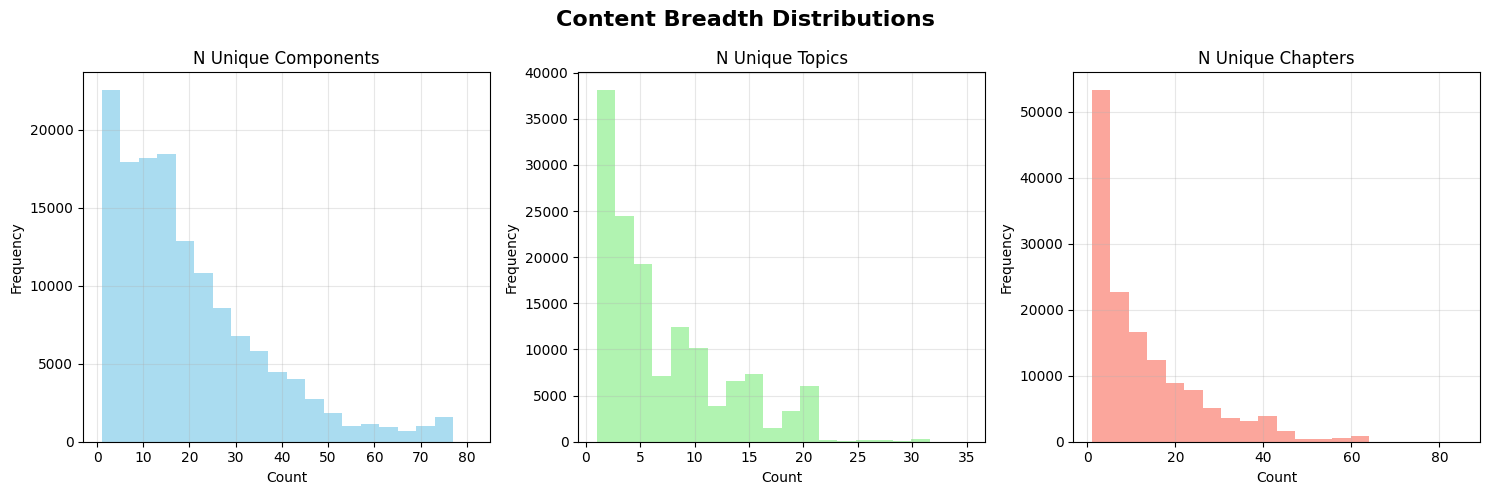

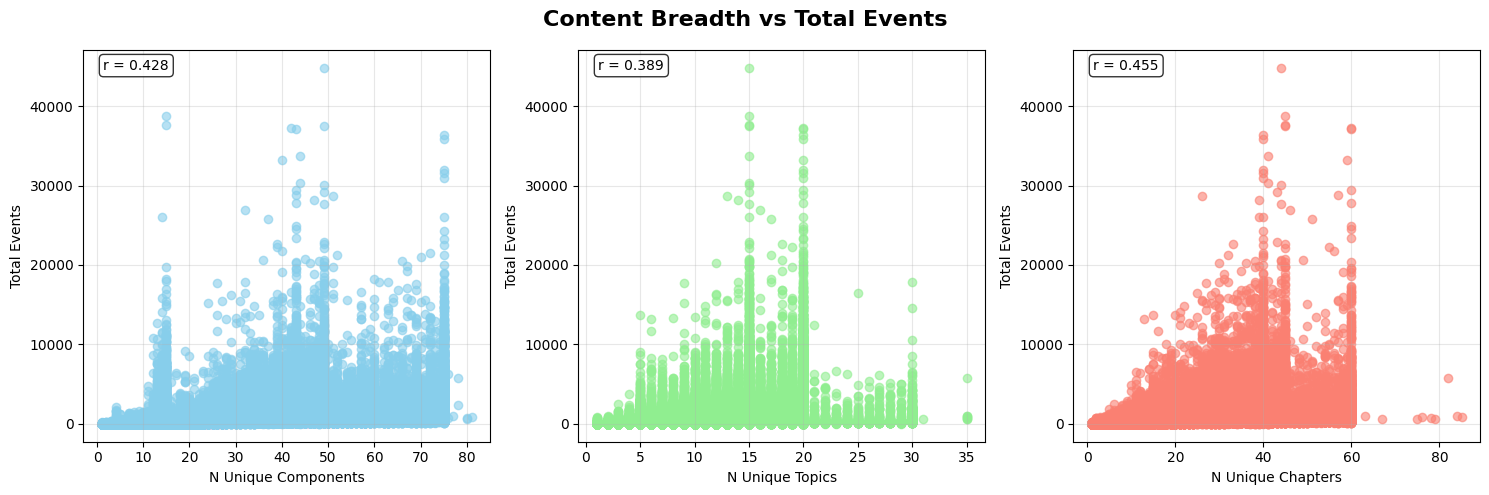


4.2 ENTROPY MEASURES - LEARNING PATTERN DIVERSITY
--------------------------------------------------
Entropy Statistics:
       topic_entropy  chapter_entropy  component_entropy
count     141381.000       141381.000         141381.000
mean           1.401            1.836              2.216
std            0.899            1.071              0.828
min            0.000            0.000              0.000
25%            0.679            1.011              1.791
50%            1.457            1.907              2.443
75%            2.125            2.681              2.819
max            3.536            4.239              4.202

Entropy Correlations:
                   topic_entropy  chapter_entropy  component_entropy
topic_entropy              1.000            0.958              0.691
chapter_entropy            0.958            1.000              0.754
component_entropy          0.691            0.754              1.000


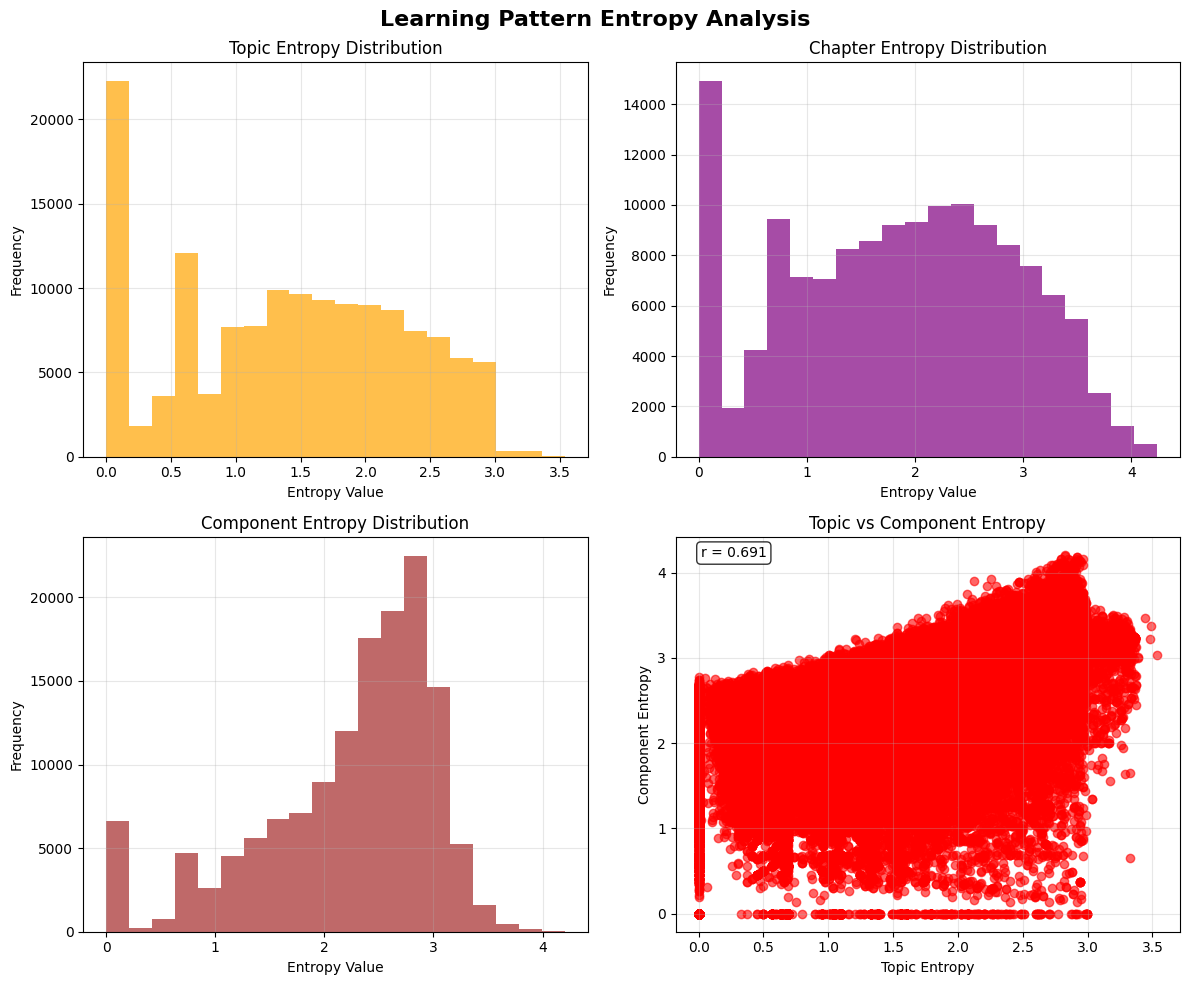


4.3 LEARNING PATTERN INTERPRETATION
----------------------------------------
Learning Pattern Distribution:
Diverse Explorer: 68616 (48.5%)
Content Sampler: 29438 (20.8%)
Focused Learner: 26582 (18.8%)
Moderate Learner: 16745 (11.8%)


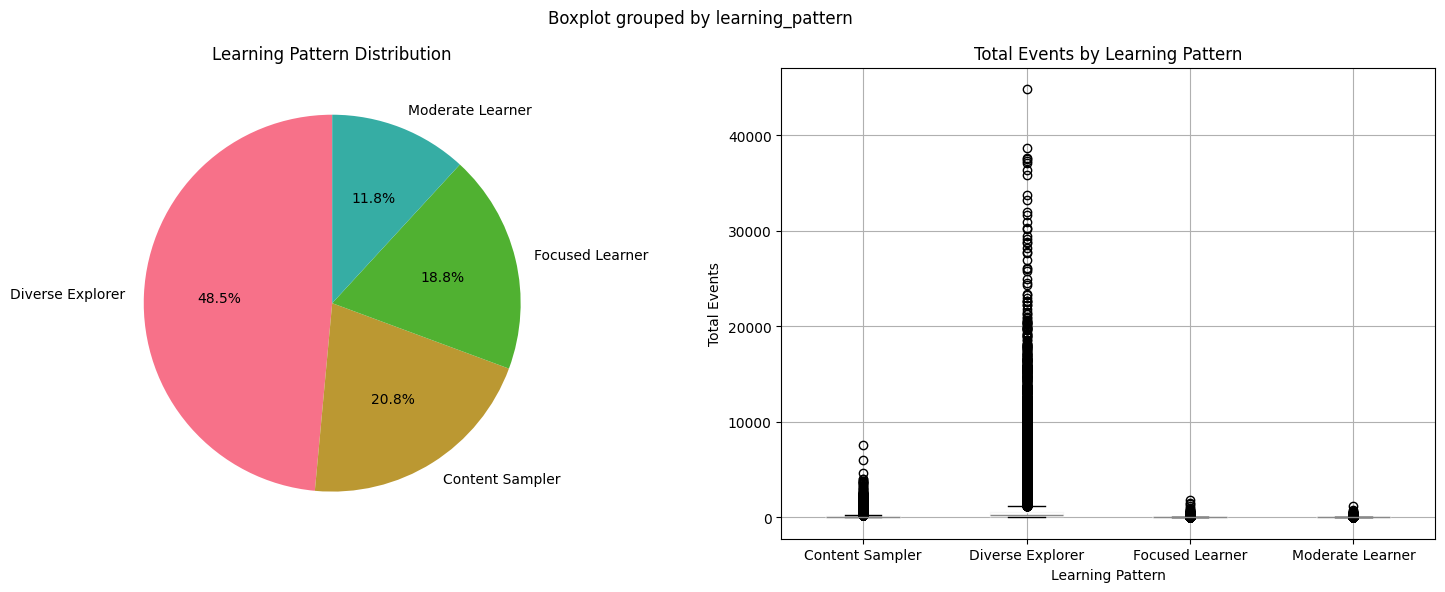


4.4 COMPREHENSIVE CONTENT DIVERSITY ANALYSIS
--------------------------------------------------
Content Diversity Score Statistics:
count    141381.000
mean          0.315
std           0.151
min           0.012
25%           0.211
50%           0.312
75%           0.417
max           0.921
Name: content_diversity_score, dtype: float64

High vs Low Diversity Learners Comparison:
                total_events                 days_since_join         \
                        mean median      std            mean median   
diversity_level                                                       
High Diversity        756.67  226.0  1718.46           95.82   75.0   
Low Diversity          39.49   18.0    78.45          118.05   76.0   

                n_unique_components component_entropy  
                               mean              mean  
diversity_level                                        
High Diversity                30.54              2.80  
Low Diversity                  7.90  

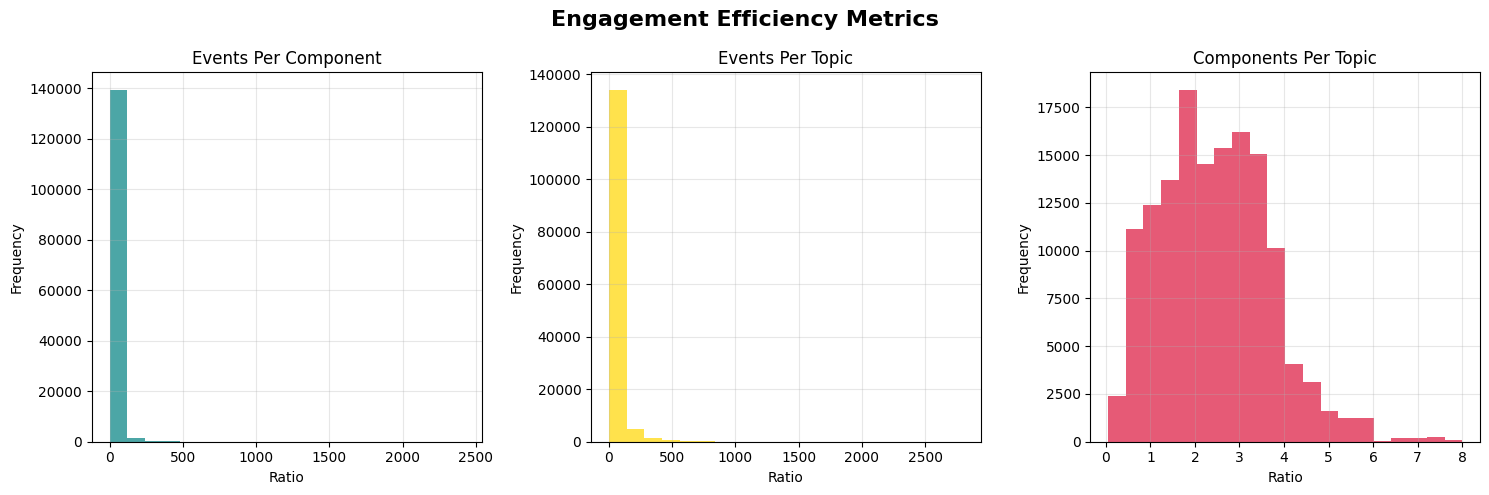


4.6 ADVANCED CONTENT ENGAGEMENT PATTERNS
---------------------------------------------
Engagement Style Distribution:
Shallow & Narrow: 57078 (40.4%)
Deep & Broad: 56030 (39.6%)
Deep & Narrow: 14660 (10.4%)
Shallow & Broad: 13613 (9.6%)


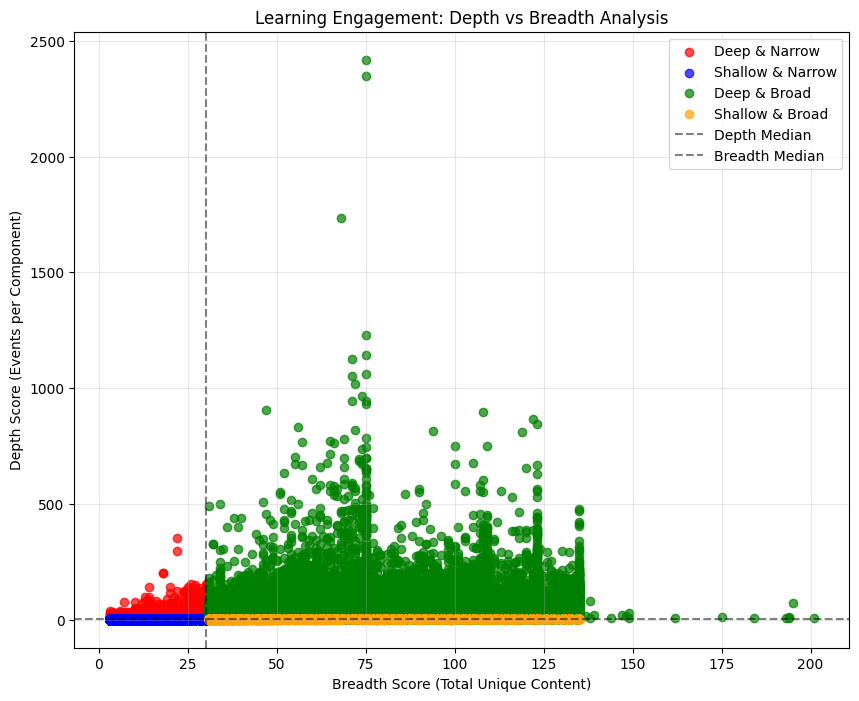


4.7 KEY INSIGHTS - CONTENT ENGAGEMENT DIVERSITY

CONTENT BREADTH INSIGHTS:
- Average unique components accessed: 19.2
- Average unique topics explored: 7.0
- Average unique chapters covered: 12.6
- Components-Topics correlation: 0.805

ENTROPY INSIGHTS (Learning Pattern Diversity):
- Topic Entropy (focus vs. diversity): 1.401 ± 0.899
- Chapter Entropy: 1.836 ± 1.071
- Component Entropy: 2.216 ± 0.828
- Higher entropy = more diverse/scattered learning patterns

ENGAGEMENT EFFICIENCY:
- Events per component: 12.7
- Events per topic: 32.5
- Components per topic: 2.4

LEARNING PATTERNS:
• Diverse Explorer: 68616 learners (48.5%)
• Content Sampler: 29438 learners (20.8%)
• Focused Learner: 26582 learners (18.8%)
• Moderate Learner: 16745 learners (11.8%)

ENGAGEMENT STYLES:
• Shallow & Narrow: 57078 learners (40.4%)
• Deep & Broad: 56030 learners (39.6%)
• Deep & Narrow: 14660 learners (10.4%)
• Shallow & Broad: 13613 learners (9.6%)

CORRELATION WITH TOTAL EVENTS:
• n_unique_components: 0

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats





# ============================================================================
# 4. CONTENT ENGAGEMENT DIVERSITY ANALYSIS
# ============================================================================

print("="*60)
print("CONTENT ENGAGEMENT DIVERSITY ANALYSIS")
print("="*60)

# ============================================================================
# 4.1 CONTENT BREADTH ANALYSIS
# ============================================================================

print("\n4.1 CONTENT BREADTH METRICS")
print("-" * 40)

# Basic statistics for content breadth
breadth_metrics = ['n_unique_components', 'n_unique_topics', 'n_unique_chapters']
breadth_stats = snapshots_hist[breadth_metrics].describe()
print("Content Breadth Statistics:")
print(breadth_stats.round(2))

# Content breadth correlations
print("\nContent Breadth Correlations:")
breadth_corr = snapshots_hist[breadth_metrics].corr()
print(breadth_corr.round(3))

# Visualize content breadth distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Content Breadth Distributions', fontsize=16, fontweight='bold')

for i, metric in enumerate(breadth_metrics):
    axes[i].hist(snapshots_hist[metric], bins=20, alpha=0.7, color=['skyblue', 'lightgreen', 'salmon'][i])
    axes[i].set_title(f'{metric.replace("_", " ").title()}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Content breadth vs engagement intensity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Content Breadth vs Total Events', fontsize=16, fontweight='bold')

for i, metric in enumerate(breadth_metrics):
    axes[i].scatter(snapshots_hist[metric], snapshots_hist['total_events'], alpha=0.6, color=['skyblue', 'lightgreen', 'salmon'][i])
    axes[i].set_xlabel(metric.replace('_', ' ').title())
    axes[i].set_ylabel('Total Events')
    axes[i].grid(True, alpha=0.3)

    # Add correlation coefficient
    corr = snapshots_hist[metric].corr(snapshots_hist['total_events'])
    axes[i].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[i].transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================================================
# 4.2 ENTROPY MEASURES ANALYSIS
# ============================================================================

print("\n4.2 ENTROPY MEASURES - LEARNING PATTERN DIVERSITY")
print("-" * 50)

# Entropy statistics
entropy_metrics = ['topic_entropy', 'chapter_entropy', 'component_entropy']
entropy_stats = snapshots_hist[entropy_metrics].describe()
print("Entropy Statistics:")
print(entropy_stats.round(3))

# Entropy correlations
print("\nEntropy Correlations:")
entropy_corr = snapshots_hist[entropy_metrics].corr()
print(entropy_corr.round(3))

# Visualize entropy distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Learning Pattern Entropy Analysis', fontsize=16, fontweight='bold')

# Entropy distributions
for i, metric in enumerate(entropy_metrics):
    row, col = i // 2, i % 2
    axes[row, col].hist(snapshots_hist[metric], bins=20, alpha=0.7, color=['orange', 'purple', 'brown'][i])
    axes[row, col].set_title(f'{metric.replace("_", " ").title()} Distribution')
    axes[row, col].set_xlabel('Entropy Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

# Entropy comparison scatter plot
axes[1, 1].scatter(snapshots_hist['topic_entropy'], snapshots_hist['component_entropy'], alpha=0.6, color='red')
axes[1, 1].set_xlabel('Topic Entropy')
axes[1, 1].set_ylabel('Component Entropy')
axes[1, 1].set_title('Topic vs Component Entropy')
axes[1, 1].grid(True, alpha=0.3)

# Add correlation
corr = snapshots_hist['topic_entropy'].corr(snapshots_hist['component_entropy'])
axes[1, 1].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 1].transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================================================
# 4.3 LEARNING PATTERN INTERPRETATION
# ============================================================================

print("\n4.3 LEARNING PATTERN INTERPRETATION")
print("-" * 40)

# Create learning pattern categories based on entropy
def categorize_learning_pattern(row):
    """Categorize learning patterns based on entropy values"""
    topic_ent = row['topic_entropy']
    chapter_ent = row['chapter_entropy']
    component_ent = row['component_entropy']

    # Define thresholds (you may need to adjust these based on your data)
    low_threshold = 0.5
    high_threshold = 1.5

    if topic_ent < low_threshold and chapter_ent < high_threshold:
        return "Focused Learner"
    elif topic_ent > high_threshold and chapter_ent > high_threshold:
        return "Diverse Explorer"
    elif component_ent > 2.0:
        return "Content Sampler"
    else:
        return "Moderate Learner"

snapshots_hist['learning_pattern'] = snapshots_hist.apply(categorize_learning_pattern, axis=1)

# Learning pattern distribution
pattern_counts = snapshots_hist['learning_pattern'].value_counts()
print("Learning Pattern Distribution:")
for pattern, count in pattern_counts.items():
    print(f"{pattern}: {count} ({count/len(snapshots_hist)*100:.1f}%)")

# Visualize learning patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pattern distribution pie chart
ax1.pie(pattern_counts.values, labels=pattern_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Learning Pattern Distribution')

# Pattern vs total events boxplot
snapshots_hist.boxplot(column='total_events', by='learning_pattern', ax=ax2)
ax2.set_title('Total Events by Learning Pattern')
ax2.set_xlabel('Learning Pattern')
ax2.set_ylabel('Total Events')

plt.tight_layout()
plt.show()

# ============================================================================
# 4.4 CONTENT DIVERSITY METRICS
# ============================================================================

print("\n4.4 COMPREHENSIVE CONTENT DIVERSITY ANALYSIS")
print("-" * 50)

# Create a content diversity score
snapshots_hist['content_diversity_score'] = (
    (snapshots_hist['n_unique_topics'] / snapshots_hist['n_unique_topics'].max()) * 0.3 +
    (snapshots_hist['n_unique_chapters'] / snapshots_hist['n_unique_chapters'].max()) * 0.3 +
    (snapshots_hist['component_entropy'] / snapshots_hist['component_entropy'].max()) * 0.4
)

print("Content Diversity Score Statistics:")
print(snapshots_hist['content_diversity_score'].describe().round(3))

# High vs Low diversity learners
diversity_threshold = snapshots_hist['content_diversity_score'].median()
snapshots_hist['diversity_level'] = snapshots_hist['content_diversity_score'].apply(
    lambda x: 'High Diversity' if x > diversity_threshold else 'Low Diversity'
)

diversity_comparison = snapshots_hist.groupby('diversity_level').agg({
    'total_events': ['mean', 'median', 'std'],
    'days_since_join': ['mean', 'median'],
    'n_unique_components': 'mean',
    'component_entropy': 'mean'
}).round(2)

print("\nHigh vs Low Diversity Learners Comparison:")
print(diversity_comparison)

# ============================================================================
# 4.5 ENGAGEMENT EFFICIENCY ANALYSIS
# ============================================================================

print("\n4.5 ENGAGEMENT EFFICIENCY ANALYSIS")
print("-" * 40)

# Calculate efficiency metrics
snapshots_hist['events_per_component'] = snapshots_hist['total_events'] / (snapshots_hist['n_unique_components'] + 1)  # +1 to avoid division by zero
snapshots_hist['events_per_topic'] = snapshots_hist['total_events'] / (snapshots_hist['n_unique_topics'] + 1)
snapshots_hist['components_per_topic'] = snapshots_hist['n_unique_components'] / (snapshots_hist['n_unique_topics'] + 1)

efficiency_metrics = ['events_per_component', 'events_per_topic', 'components_per_topic']
efficiency_stats = snapshots_hist[efficiency_metrics].describe()
print("Engagement Efficiency Statistics:")
print(efficiency_stats.round(2))

# Visualize efficiency metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Engagement Efficiency Metrics', fontsize=16, fontweight='bold')

for i, metric in enumerate(efficiency_metrics):
    axes[i].hist(snapshots_hist[metric], bins=20, alpha=0.7, color=['teal', 'gold', 'crimson'][i])
    axes[i].set_title(f'{metric.replace("_", " ").title()}')
    axes[i].set_xlabel('Ratio')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 4.6 ADVANCED CONTENT ENGAGEMENT PATTERNS
# ============================================================================

print("\n4.6 ADVANCED CONTENT ENGAGEMENT PATTERNS")
print("-" * 45)

# Depth vs Breadth analysis
snapshots_hist['depth_score'] = snapshots_hist['total_events'] / (snapshots_hist['n_unique_components'] + 1)  # Depth: events per unique component
snapshots_hist['breadth_score'] = snapshots_hist['n_unique_components'] + snapshots_hist['n_unique_topics'] + snapshots_hist['n_unique_chapters']  # Breadth: total unique content

# Categorize learners by depth vs breadth
depth_median = snapshots_hist['depth_score'].median()
breadth_median = snapshots_hist['breadth_score'].median()

def categorize_engagement_style(row):
    if row['depth_score'] > depth_median and row['breadth_score'] > breadth_median:
        return "Deep & Broad"
    elif row['depth_score'] > depth_median and row['breadth_score'] <= breadth_median:
        return "Deep & Narrow"
    elif row['depth_score'] <= depth_median and row['breadth_score'] > breadth_median:
        return "Shallow & Broad"
    else:
        return "Shallow & Narrow"

snapshots_hist['engagement_style'] = snapshots_hist.apply(categorize_engagement_style, axis=1)

engagement_counts = snapshots_hist['engagement_style'].value_counts()
print("Engagement Style Distribution:")
for style, count in engagement_counts.items():
    print(f"{style}: {count} ({count/len(snapshots_hist)*100:.1f}%)")

# Visualize depth vs breadth
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange']
styles = snapshots_hist['engagement_style'].unique()

for i, style in enumerate(styles):
    style_data = snapshots_hist[snapshots_hist['engagement_style'] == style]
    plt.scatter(style_data['breadth_score'], style_data['depth_score'],
               label=style, alpha=0.7, color=colors[i % len(colors)])

plt.axhline(y=depth_median, color='black', linestyle='--', alpha=0.5, label='Depth Median')
plt.axvline(x=breadth_median, color='black', linestyle='--', alpha=0.5, label='Breadth Median')
plt.xlabel('Breadth Score (Total Unique Content)')
plt.ylabel('Depth Score (Events per Component)')
plt.title('Learning Engagement: Depth vs Breadth Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ============================================================================
# 4.7 SUMMARY INSIGHTS
# ============================================================================

print("\n4.7 KEY INSIGHTS - CONTENT ENGAGEMENT DIVERSITY")
print("=" * 55)

print(f"""
CONTENT BREADTH INSIGHTS:
- Average unique components accessed: {snapshots_hist['n_unique_components'].mean():.1f}
- Average unique topics explored: {snapshots_hist['n_unique_topics'].mean():.1f}
- Average unique chapters covered: {snapshots_hist['n_unique_chapters'].mean():.1f}
- Components-Topics correlation: {snapshots_hist['n_unique_components'].corr(snapshots_hist['n_unique_topics']):.3f}

ENTROPY INSIGHTS (Learning Pattern Diversity):
- Topic Entropy (focus vs. diversity): {snapshots_hist['topic_entropy'].mean():.3f} ± {snapshots_hist['topic_entropy'].std():.3f}
- Chapter Entropy: {snapshots_hist['chapter_entropy'].mean():.3f} ± {snapshots_hist['chapter_entropy'].std():.3f}
- Component Entropy: {snapshots_hist['component_entropy'].mean():.3f} ± {snapshots_hist['component_entropy'].std():.3f}
- Higher entropy = more diverse/scattered learning patterns

ENGAGEMENT EFFICIENCY:
- Events per component: {snapshots_hist['events_per_component'].mean():.1f}
- Events per topic: {snapshots_hist['events_per_topic'].mean():.1f}
- Components per topic: {snapshots_hist['components_per_topic'].mean():.1f}

LEARNING PATTERNS:
{chr(10).join([f"• {pattern}: {count} learners ({count/len(snapshots_hist)*100:.1f}%)" for pattern, count in pattern_counts.items()])}

ENGAGEMENT STYLES:
{chr(10).join([f"• {style}: {count} learners ({count/len(snapshots_hist)*100:.1f}%)" for style, count in engagement_counts.items()])}
""")

# Correlation with total events
content_metrics = ['n_unique_components', 'n_unique_topics', 'n_unique_chapters',
                  'topic_entropy', 'chapter_entropy', 'component_entropy']
correlations_with_events = snapshots_hist[content_metrics + ['total_events']].corr()['total_events'].drop('total_events')

print("CORRELATION WITH TOTAL EVENTS:")
for metric, corr in correlations_with_events.items():
    direction = "↑" if corr > 0 else "↓"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"• {metric}: {corr:.3f} {direction} ({strength})")

5. COHORT AND CENTER EFFECTS ANALYSIS

Available columns related to cohort/center:
Found columns: ['center_id', 'batch_id_te', 'batch_dropout_rate_hist', 'batch_avg_events_hist']

CENTER-LEVEL ANALYSIS

Center Distribution:
  Center 1260.0: 3,223 observations (2.3%)
  Center 1261.0: 2,752 observations (1.9%)
  Center 1262.0: 20,179 observations (14.3%)
  Center 1263.0: 2,807 observations (2.0%)
  Center 1264.0: 7,923 observations (5.6%)
  Center 1265.0: 18,564 observations (13.1%)
  Center 1266.0: 9 observations (0.0%)
  Center 1267.0: 2,313 observations (1.6%)
  Center 1268.0: 69 observations (0.0%)
  Center 1269.0: 8,160 observations (5.8%)
  Center 1316.0: 3,098 observations (2.2%)
  Center 1317.0: 71 observations (0.1%)
  Center 1318.0: 765 observations (0.5%)
  Center 1320.0: 1,018 observations (0.7%)
  Center 1321.0: 32 observations (0.0%)
  Center 1322.0: 546 observations (0.4%)
  Center 1324.0: 1,118 observations (0.8%)
  Center 1325.0: 3,678 observations (2.6%)
  Center 1326.0

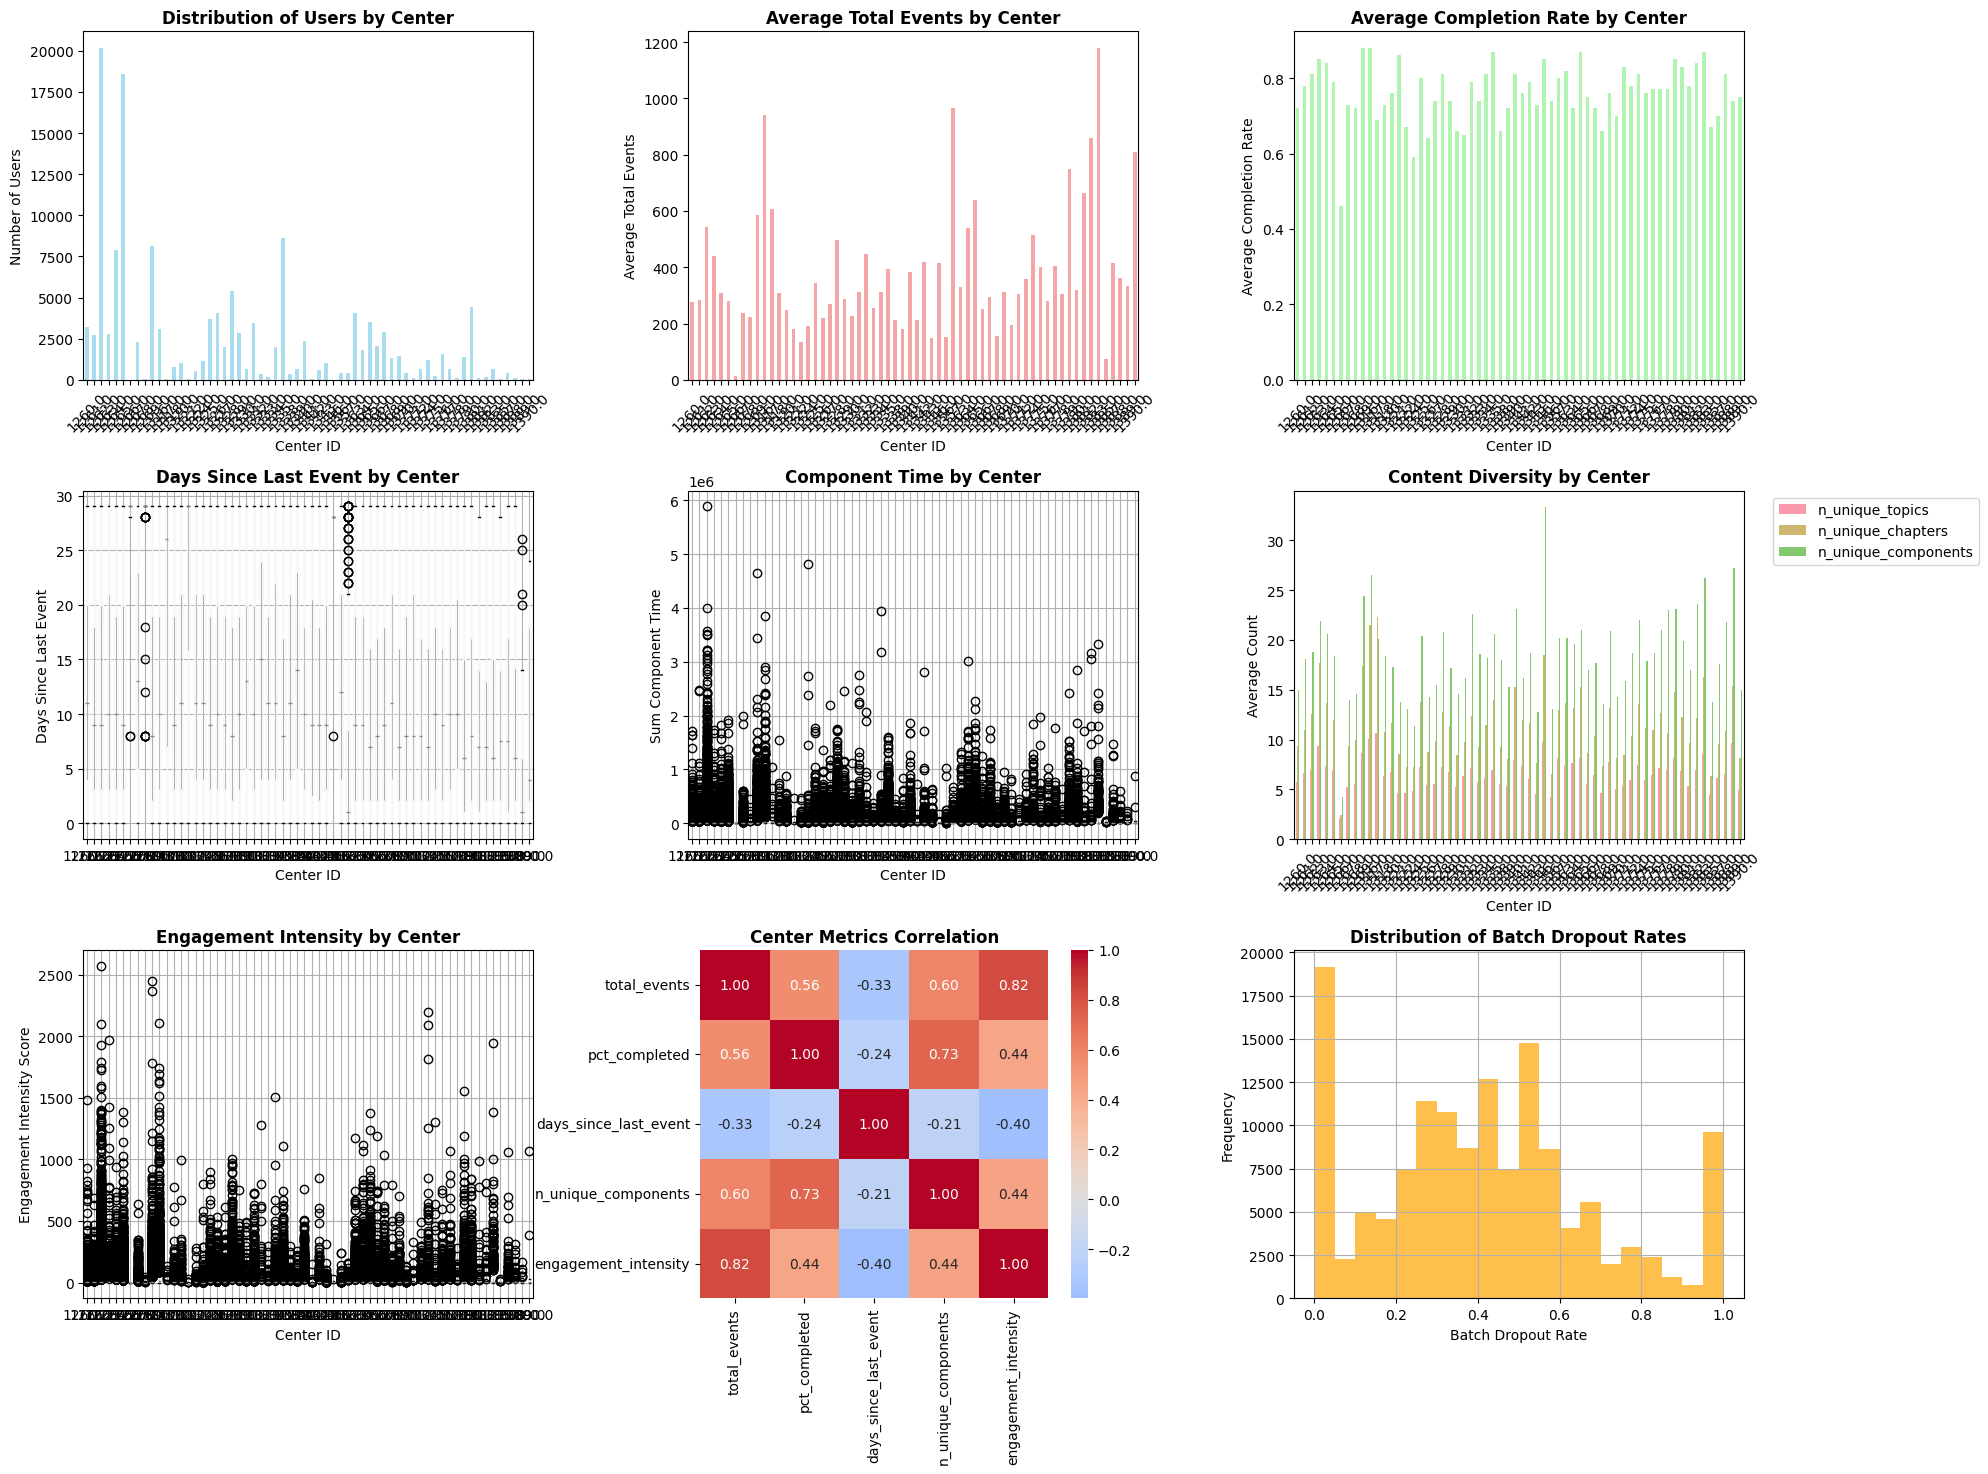


SUMMARY OF COHORT/CENTER EFFECTS

Center Effect Sizes:
  Eta-squared for total_events: 0.032
  Medium effect size

RECOMMENDATIONS
✓ Include center_id as a feature in dropout prediction models
✓ Consider center-specific interventions
• Collect batch-level features for peer influence analysis:
  - Historical batch dropout rates
  - Batch average engagement metrics
  - Batch composition features

DETAILED BATCH-LEVEL ANALYSIS


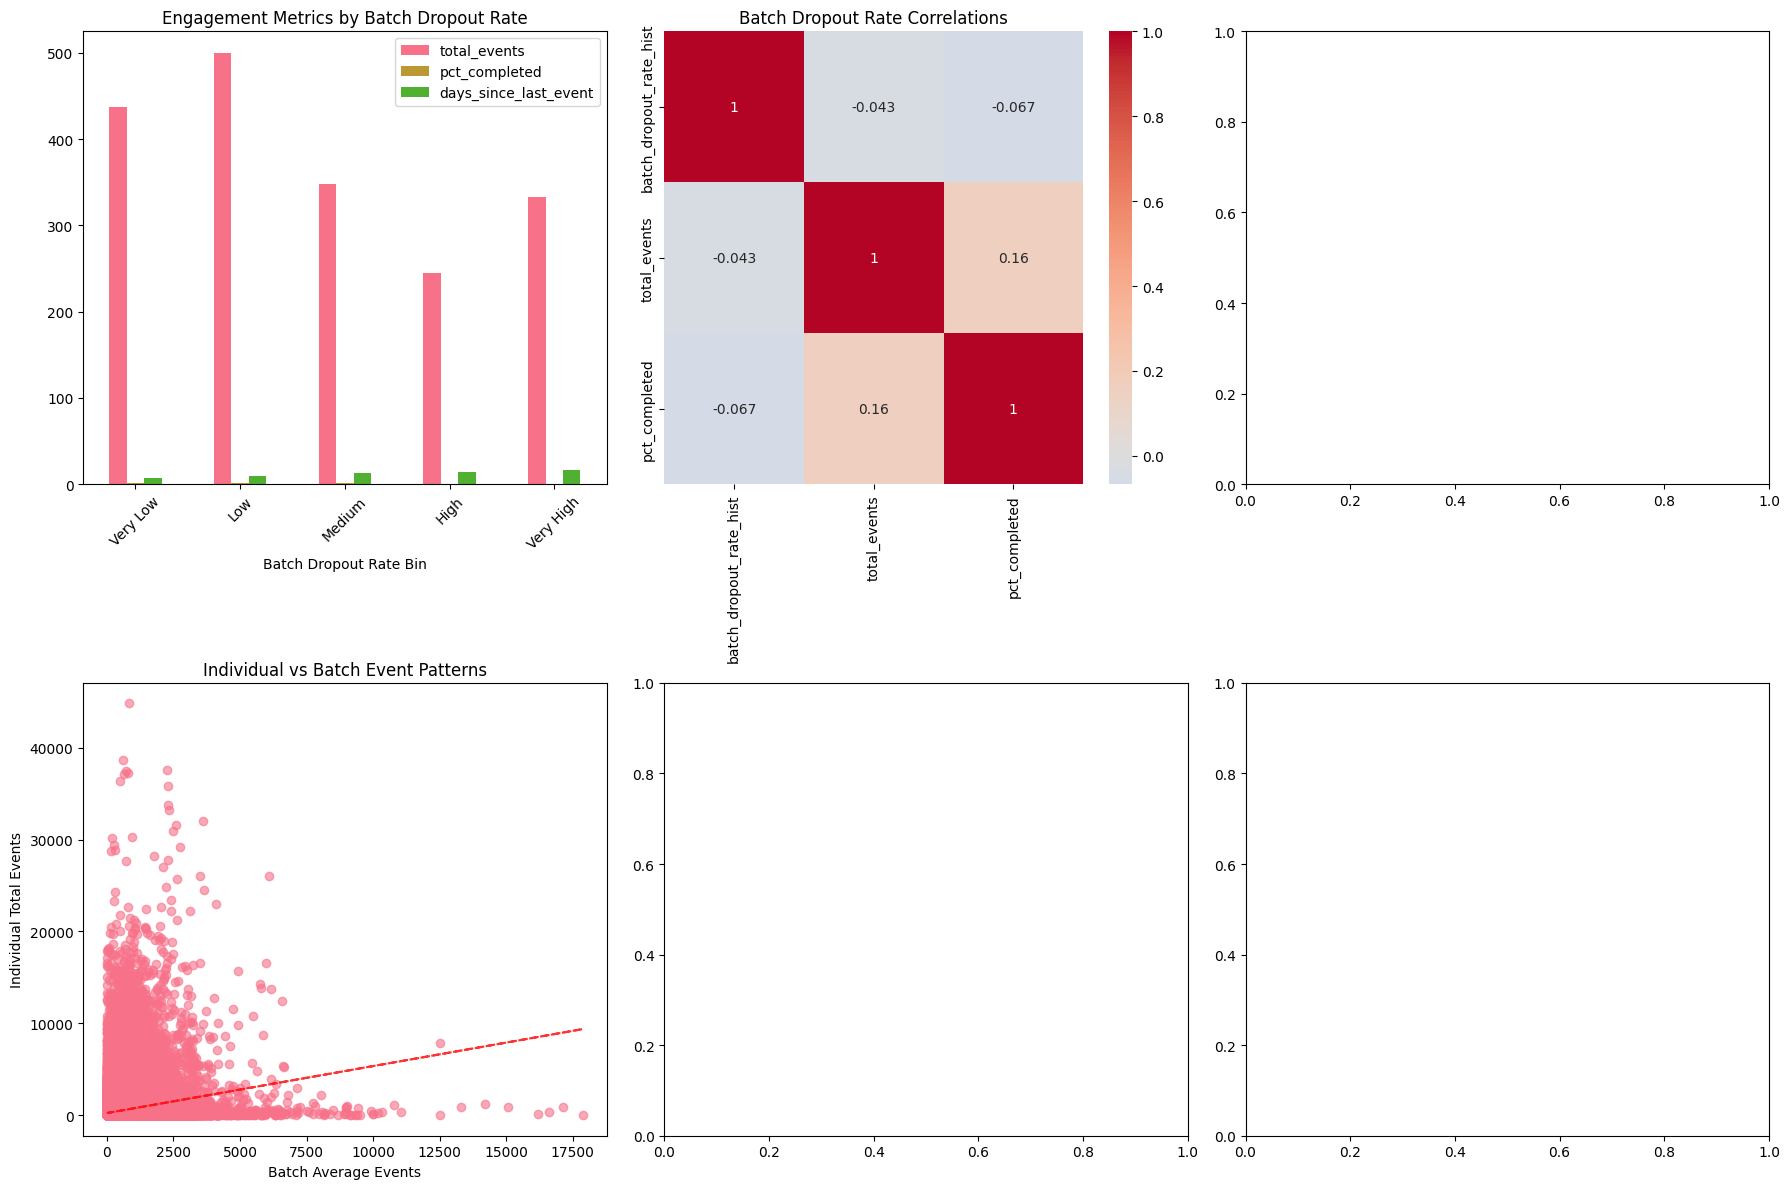

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

def analyze_cohort_center_effects(df):
    """
    Analyze cohort and center effects on dropout behavior
    """

    print("="*60)
    print("5. COHORT AND CENTER EFFECTS ANALYSIS")
    print("="*60)

    # Check available columns
    print("\nAvailable columns related to cohort/center:")
    cohort_cols = [col for col in df.columns if any(x in col.lower() for x in ['center', 'batch', 'cohort'])]
    print(f"Found columns: {cohort_cols}")

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 15))

    # ===============================
    # CENTER ANALYSIS
    # ===============================

    print("\n" + "="*40)
    print("CENTER-LEVEL ANALYSIS")
    print("="*40)

    # Center distribution
    ax1 = plt.subplot(3, 3, 1)
    center_counts = df['center_id'].value_counts().sort_index()
    center_counts.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
    ax1.set_title('Distribution of Users by Center', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Center ID')
    ax1.set_ylabel('Number of Users')
    ax1.tick_params(axis='x', rotation=45)

    print(f"\nCenter Distribution:")
    for center, count in center_counts.items():
        print(f"  Center {center}: {count:,} observations ({count/len(df)*100:.1f}%)")

    # Center-level engagement metrics
    ax2 = plt.subplot(3, 3, 2)
    center_engagement = df.groupby('center_id').agg({
        'total_events': 'mean',
        'total_quizzes': 'mean',
        'pct_completed': 'mean'
    }).round(2)

    center_engagement['total_events'].plot(kind='bar', ax=ax2, color='lightcoral', alpha=0.7)
    ax2.set_title('Average Total Events by Center', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Center ID')
    ax2.set_ylabel('Average Total Events')
    ax2.tick_params(axis='x', rotation=45)

    print(f"\nCenter-Level Engagement Metrics:")
    print(center_engagement)

    # Center completion rates
    ax3 = plt.subplot(3, 3, 3)
    center_engagement['pct_completed'].plot(kind='bar', ax=ax3, color='lightgreen', alpha=0.7)
    ax3.set_title('Average Completion Rate by Center', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Center ID')
    ax3.set_ylabel('Average Completion Rate')
    ax3.tick_params(axis='x', rotation=45)

    # Statistical test for center differences
    centers = df['center_id'].unique()
    if len(centers) > 1:
        print(f"\nStatistical Tests for Center Differences:")

        # ANOVA for total events across centers
        center_groups = [df[df['center_id'] == center]['total_events'].values for center in centers]
        f_stat, p_val = stats.f_oneway(*center_groups)
        print(f"  ANOVA for total_events across centers: F={f_stat:.3f}, p={p_val:.3f}")

        # ANOVA for completion rates across centers
        center_groups_comp = [df[df['center_id'] == center]['pct_completed'].values for center in centers]
        f_stat_comp, p_val_comp = stats.f_oneway(*center_groups_comp)
        print(f"  ANOVA for pct_completed across centers: F={f_stat_comp:.3f}, p={p_val_comp:.3f}")

    # ===============================
    # CENTER BEHAVIORAL PATTERNS
    # ===============================

    print(f"\nCenter-Specific Behavioral Patterns:")

    # Activity patterns by center
    ax4 = plt.subplot(3, 3, 4)
    df.boxplot(column='days_since_last_event', by='center_id', ax=ax4)
    ax4.set_title('Days Since Last Event by Center', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Center ID')
    ax4.set_ylabel('Days Since Last Event')
    plt.suptitle('')  # Remove default title

    # Time investment by center
    ax5 = plt.subplot(3, 3, 5)
    # Convert sum_component_time to numeric if it's string
    if df['sum_component_time'].dtype == 'object':
        df['sum_component_time'] = pd.to_numeric(df['sum_component_time'], errors='coerce')

    df.boxplot(column='sum_component_time', by='center_id', ax=ax5)
    ax5.set_title('Component Time by Center', fontsize=12, fontweight='bold')
    ax5.set_xlabel('Center ID')
    ax5.set_ylabel('Sum Component Time')
    plt.suptitle('')

    # Diversity metrics by center
    ax6 = plt.subplot(3, 3, 6)
    center_diversity = df.groupby('center_id').agg({
        'n_unique_topics': 'mean',
        'n_unique_chapters': 'mean',
        'n_unique_components': 'mean'
    }).round(2)

    center_diversity.plot(kind='bar', ax=ax6, alpha=0.7)
    ax6.set_title('Content Diversity by Center', fontsize=12, fontweight='bold')
    ax6.set_xlabel('Center ID')
    ax6.set_ylabel('Average Count')
    ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax6.tick_params(axis='x', rotation=45)

    print(f"\nContent Diversity by Center:")
    print(center_diversity)

    # ===============================
    # ENGAGEMENT INTENSITY BY CENTER
    # ===============================

    # Create engagement intensity score
    df['engagement_intensity'] = (
        (df['total_events'] / df['days_since_join']) *
        df['pct_completed'] *
        np.log1p(df['n_unique_components'])
    )

    ax7 = plt.subplot(3, 3, 7)
    df.boxplot(column='engagement_intensity', by='center_id', ax=ax7)
    ax7.set_title('Engagement Intensity by Center', fontsize=12, fontweight='bold')
    ax7.set_xlabel('Center ID')
    ax7.set_ylabel('Engagement Intensity Score')
    plt.suptitle('')

    # Center correlation matrix
    ax8 = plt.subplot(3, 3, 8)
    center_metrics = df.groupby('center_id').agg({
        'total_events': 'mean',
        'pct_completed': 'mean',
        'days_since_last_event': 'mean',
        'n_unique_components': 'mean',
        'engagement_intensity': 'mean'
    })

    corr_matrix = center_metrics.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax8,
                square=True, fmt='.2f')
    ax8.set_title('Center Metrics Correlation', fontsize=12, fontweight='bold')

    # ===============================
    # BATCH-LEVEL ANALYSIS (Template)
    # ===============================

    ax9 = plt.subplot(3, 3, 9)

    # Check if batch-level features exist
    batch_features = ['batch_dropout_rate_hist', 'batch_avg_events_hist']
    available_batch_features = [col for col in batch_features if col in df.columns]

    if available_batch_features:
        print(f"\n" + "="*40)
        print("BATCH-LEVEL ANALYSIS")
        print("="*40)

        # Example analysis with batch features
        if 'batch_dropout_rate_hist' in df.columns:
            # Batch dropout rate distribution
            df['batch_dropout_rate_hist'].hist(bins=20, ax=ax9, alpha=0.7, color='orange')
            ax9.set_title('Distribution of Batch Dropout Rates', fontsize=12, fontweight='bold')
            ax9.set_xlabel('Batch Dropout Rate')
            ax9.set_ylabel('Frequency')

            print(f"Batch Dropout Rate Statistics:")
            print(f"  Mean: {df['batch_dropout_rate_hist'].mean():.3f}")
            print(f"  Std: {df['batch_dropout_rate_hist'].std():.3f}")
            print(f"  Min: {df['batch_dropout_rate_hist'].min():.3f}")
            print(f"  Max: {df['batch_dropout_rate_hist'].max():.3f}")

        if 'batch_avg_events_hist' in df.columns:
            print(f"\nBatch Average Events Statistics:")
            print(f"  Mean: {df['batch_avg_events_hist'].mean():.3f}")
            print(f"  Std: {df['batch_avg_events_hist'].std():.3f}")

            # Correlation with individual metrics
            correlation_with_batch = df[['batch_avg_events_hist', 'total_events', 'pct_completed']].corr()
            print(f"\nCorrelation with Batch Average Events:")
            print(correlation_with_batch['batch_avg_events_hist'].round(3))

    else:
        # Placeholder for when batch features are not available
        ax9.text(0.5, 0.5, 'Batch-level features\nnot available in dataset\n\n(batch_dropout_rate_hist,\nbatch_avg_events_hist)',
                ha='center', va='center', transform=ax9.transAxes, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.7))
        ax9.set_title('Batch-Level Analysis', fontsize=12, fontweight='bold')
        ax9.set_xticks([])
        ax9.set_yticks([])

        print(f"\n" + "="*40)
        print("BATCH-LEVEL ANALYSIS")
        print("="*40)
        print("Batch-level features not found in current dataset.")
        print("When available, analyze:")
        print("  - batch_dropout_rate_hist: Historical dropout rates by batch")
        print("  - batch_avg_events_hist: Average events per batch")
        print("  - Peer influence effects")

    plt.tight_layout()
    plt.show()

    # ===============================
    # SUMMARY STATISTICS
    # ===============================

    print(f"\n" + "="*40)
    print("SUMMARY OF COHORT/CENTER EFFECTS")
    print("="*40)

    # Center effect size calculation
    total_variance = df['total_events'].var()
    between_center_variance = df.groupby('center_id')['total_events'].mean().var()
    eta_squared = between_center_variance / total_variance

    print(f"\nCenter Effect Sizes:")
    print(f"  Eta-squared for total_events: {eta_squared:.3f}")
    print(f"  {'Small' if eta_squared < 0.01 else 'Medium' if eta_squared < 0.06 else 'Large'} effect size")

    # Recommendations
    print(f"\n" + "="*40)
    print("RECOMMENDATIONS")
    print("="*40)

    if eta_squared > 0.01:
        print("✓ Include center_id as a feature in dropout prediction models")
        print("✓ Consider center-specific interventions")
    else:
        print("• Center effects are minimal - may not need center-specific modeling")

    print("• Collect batch-level features for peer influence analysis:")
    print("  - Historical batch dropout rates")
    print("  - Batch average engagement metrics")
    print("  - Batch composition features")

    return {
        'center_engagement': center_engagement,
        'center_diversity': center_diversity,
        'center_effect_size': eta_squared,
        'available_batch_features': available_batch_features
    }

# Function to analyze batch effects when features are available
def analyze_batch_effects(df):
    """
    Detailed batch-level analysis when batch features are available
    """
    print("\n" + "="*50)
    print("DETAILED BATCH-LEVEL ANALYSIS")
    print("="*50)

    # Check for batch features
    batch_cols = [col for col in df.columns if 'batch' in col.lower()]

    if not batch_cols:
        print("No batch-level features found. This analysis requires:")
        print("- batch_dropout_rate_hist")
        print("- batch_avg_events_hist")
        print("- batch_id or similar grouping variable")
        return None

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Batch dropout rate effects
    if 'batch_dropout_rate_hist' in df.columns:
        # Binned analysis
        df['batch_dropout_bin'] = pd.cut(df['batch_dropout_rate_hist'],
                                        bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

        # Individual dropout probability by batch dropout rate
        dropout_by_batch = df.groupby('batch_dropout_bin').agg({
            'total_events': 'mean',
            'pct_completed': 'mean',
            'days_since_last_event': 'mean'
        })

        dropout_by_batch.plot(kind='bar', ax=axes[0,0])
        axes[0,0].set_title('Engagement Metrics by Batch Dropout Rate')
        axes[0,0].set_xlabel('Batch Dropout Rate Bin')
        axes[0,0].tick_params(axis='x', rotation=45)

        # Correlation analysis
        batch_corr = df[['batch_dropout_rate_hist', 'total_events', 'pct_completed']].corr()
        sns.heatmap(batch_corr, annot=True, ax=axes[0,1], cmap='coolwarm', center=0)
        axes[0,1].set_title('Batch Dropout Rate Correlations')

    # Peer influence analysis
    if 'batch_avg_events_hist' in df.columns:
        # Individual vs batch average
        axes[1,0].scatter(df['batch_avg_events_hist'], df['total_events'], alpha=0.6)
        axes[1,0].set_xlabel('Batch Average Events')
        axes[1,0].set_ylabel('Individual Total Events')
        axes[1,0].set_title('Individual vs Batch Event Patterns')

        # Add correlation line
        z = np.polyfit(df['batch_avg_events_hist'], df['total_events'], 1)
        p = np.poly1d(z)
        axes[1,0].plot(df['batch_avg_events_hist'], p(df['batch_avg_events_hist']), "r--", alpha=0.8)

    plt.tight_layout()
    plt.show()


results = analyze_cohort_center_effects(snapshots_hist)

batch_results = analyze_batch_effects(snapshots_hist)

=== TIME-BASED SEGMENTATION ANALYSIS ===

6.1 EARLY VS LATE LEARNERS ANALYSIS
Days since join distribution:
  Min: 30
  Q25: 51.0
  Median: 75.0
  Q75: 113.0
  Max: 1354

Learner stage distribution:
learner_stage
Mid-Stage Learners    69426
Early Learners        36618
Late Learners         35337
Name: count, dtype: int64

Early vs Late learners:
is_early_learner
True     70746
False    70635
Name: count, dtype: int64

6.2 BEHAVIORAL PATTERNS BY LEARNER STAGE
Behavioral patterns by learner stage:
                  metric  early_mean  mid_mean  late_mean  p_value  \
0           total_events     318.051   485.517    309.197      0.0   
1          total_quizzes     318.051   485.517    309.197      0.0   
2  days_since_last_event       8.919    10.830     14.232      0.0   
3     avg_component_time      84.804    81.641     77.776      0.0   
4          pct_completed       0.768     0.806      0.794      0.0   
5    n_unique_components      17.912    20.856     17.356      0.0   
6        

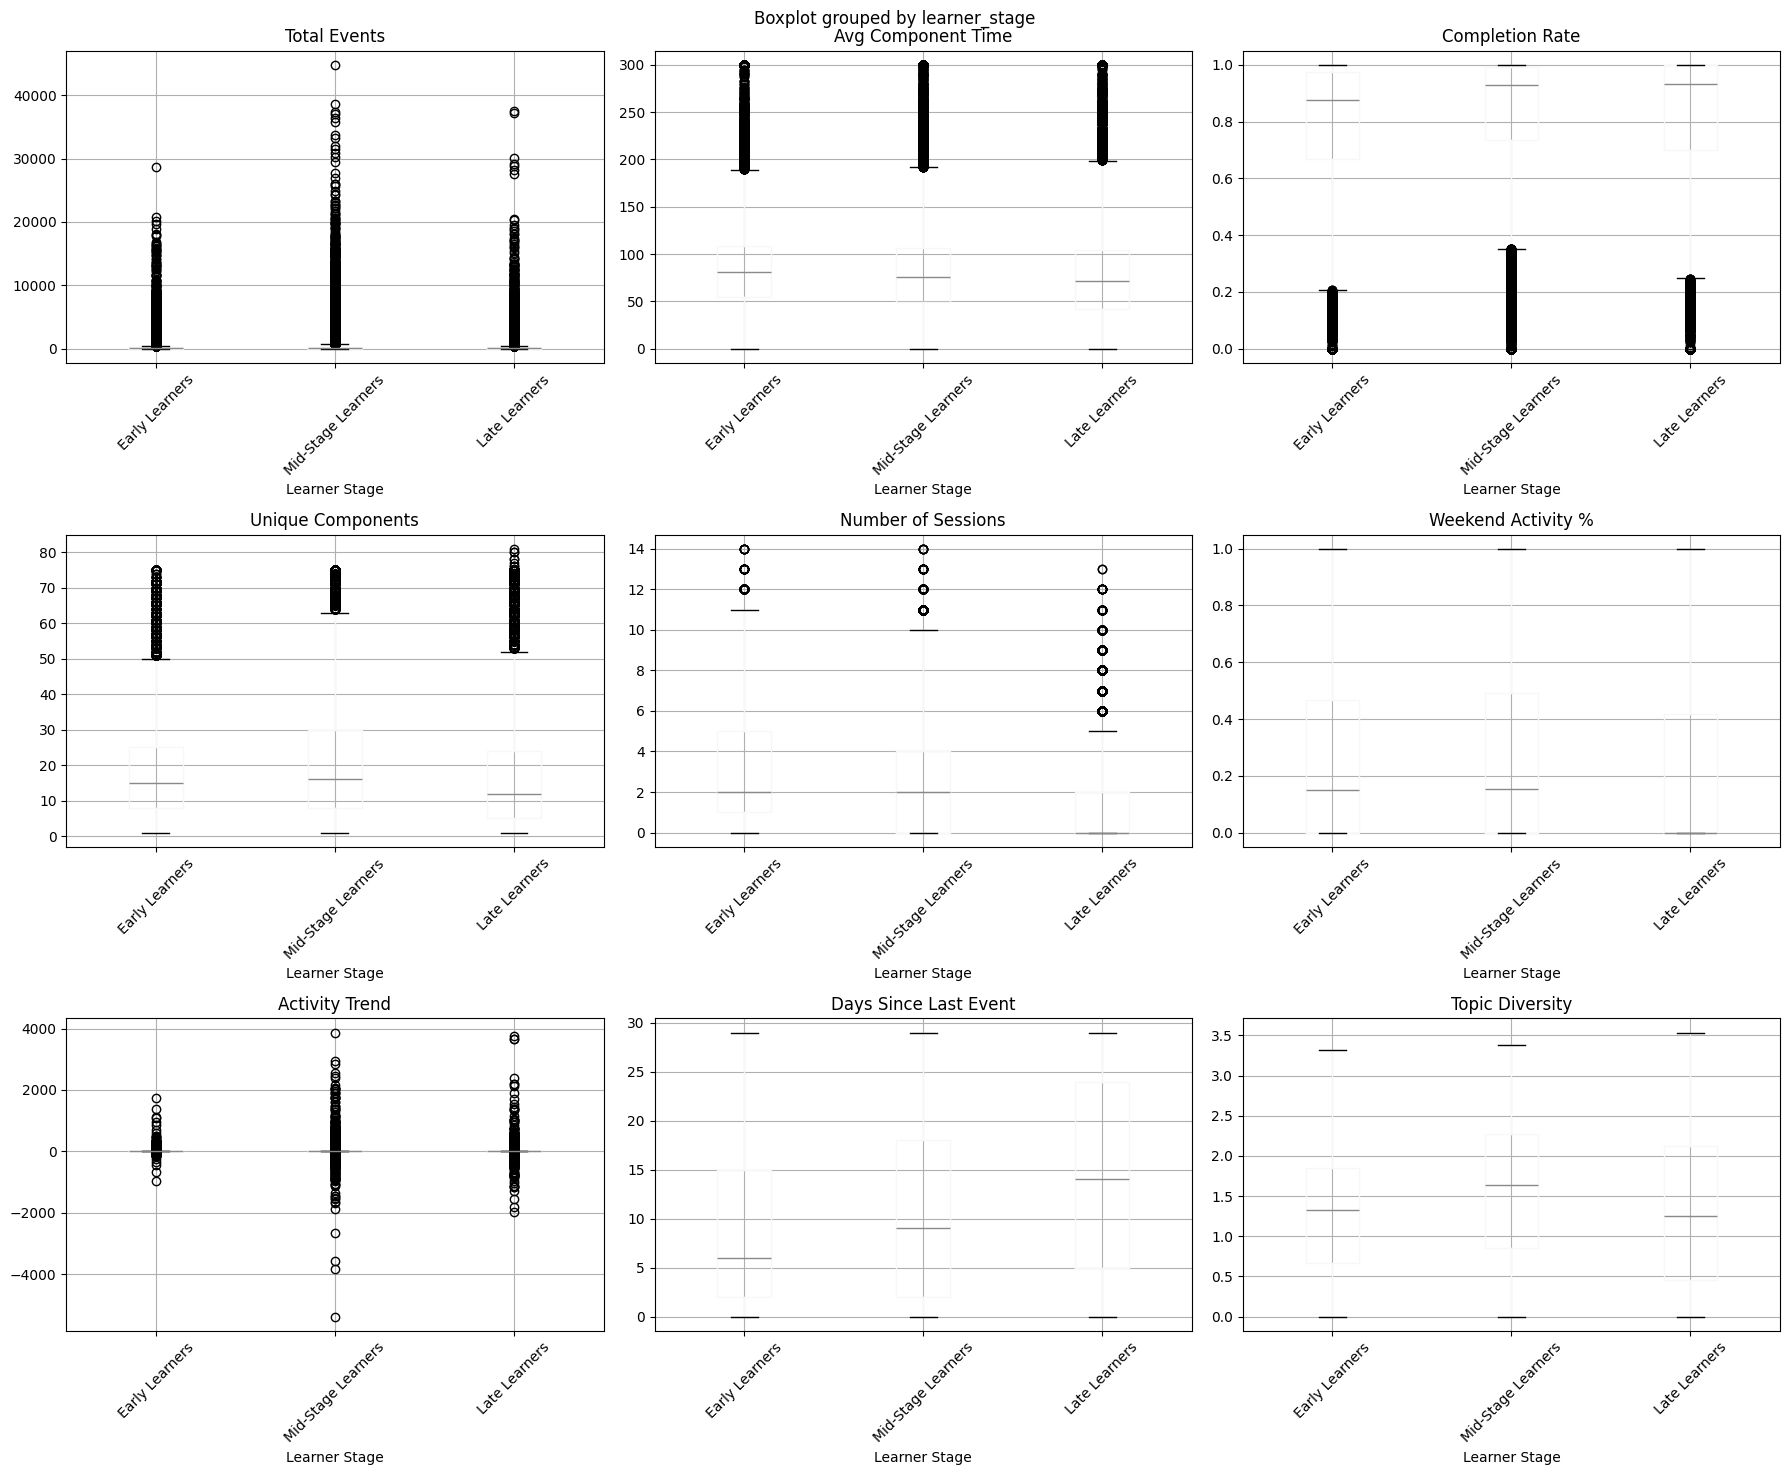


6.4 ENGAGEMENT PATTERNS ANALYSIS
Engagement scores by learner stage:
                     mean    std  median
learner_stage                           
Early Learners      0.412  0.135   0.436
Mid-Stage Learners  0.403  0.130   0.419
Late Learners       0.359  0.126   0.364


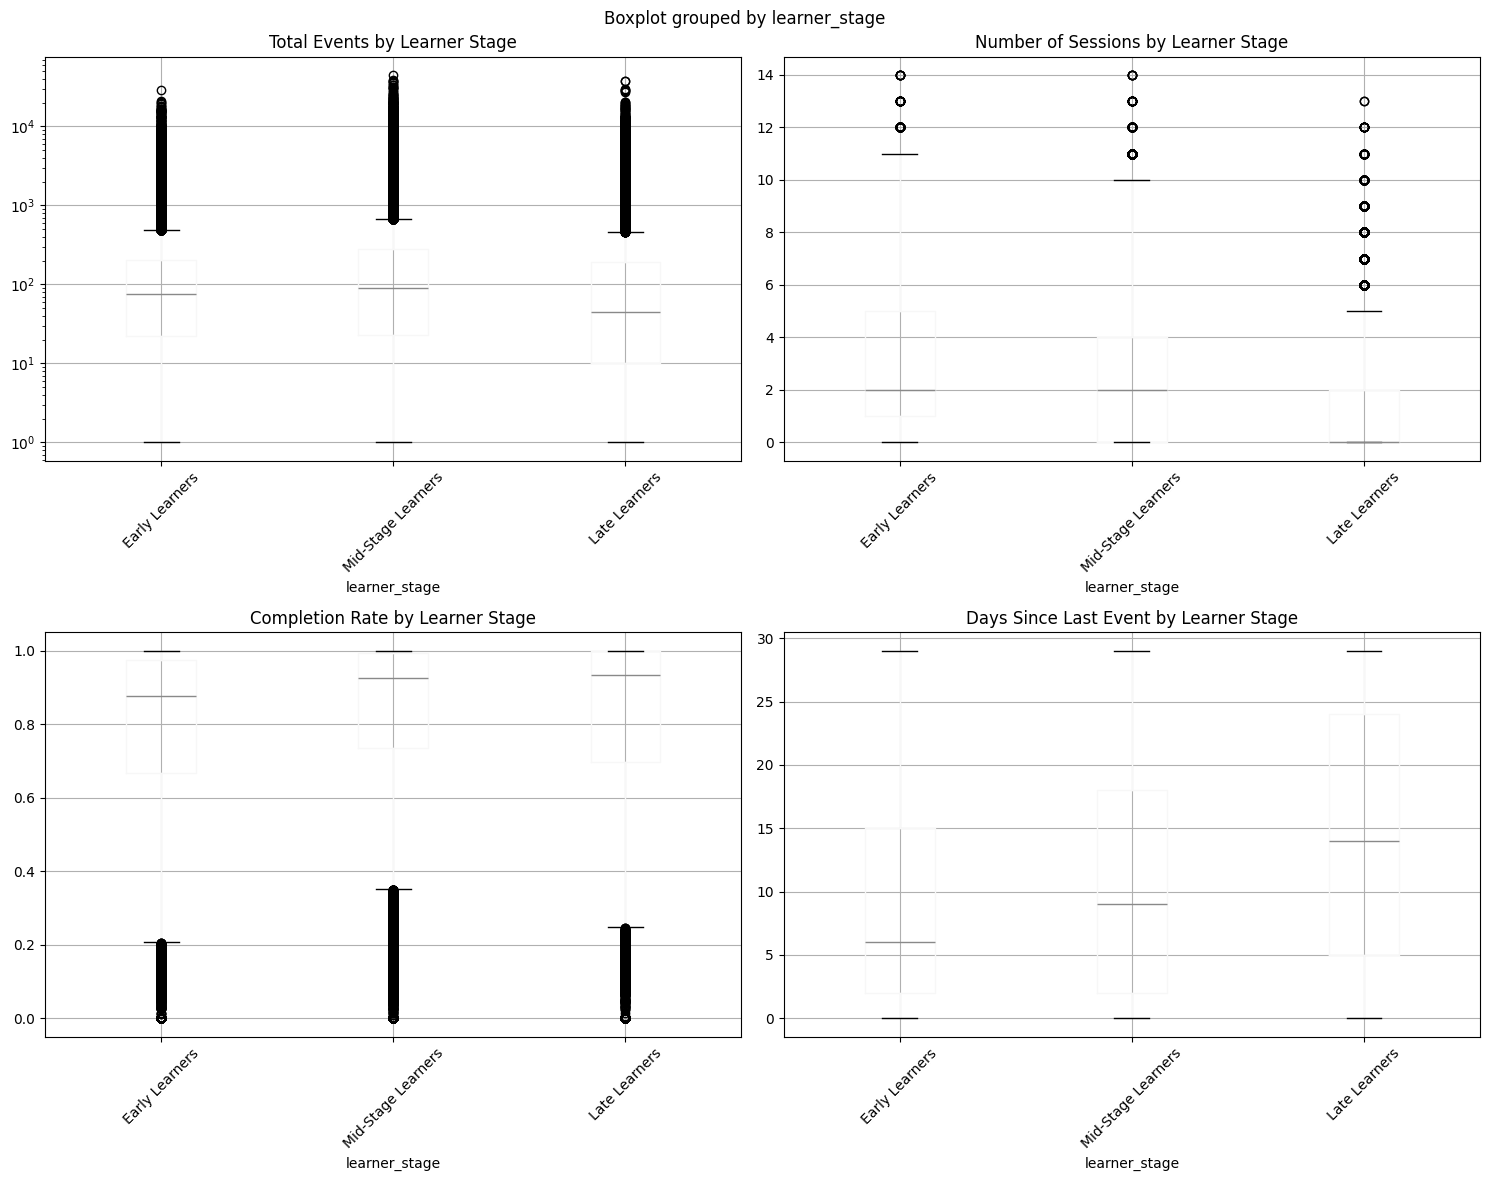


6.6 TIME-BASED TRENDS ANALYSIS
Trends across time bins:
                    total_events        pct_completed        num_sessions  \
                            mean median          mean median         mean   
days_since_join_bin                                                         
Bin_1                    420.085   81.0         0.795  0.915        2.334   
Bin_2                    298.615   42.0         0.785  0.926        1.081   
Bin_3                    233.002   35.0         0.800  0.938        1.046   
Bin_4                    197.611   21.0         0.765  0.913        1.243   
Bin_5                    172.498   16.0         0.727  0.893        1.361   
Bin_6                    152.612   16.5         0.761  0.906        1.160   
Bin_7                    152.663   16.0         0.750  0.844        1.400   
Bin_8                     67.800   11.0         0.824  1.000        1.318   
Bin_9                     85.261    9.0         0.728  0.833        1.630   
Bin_10             

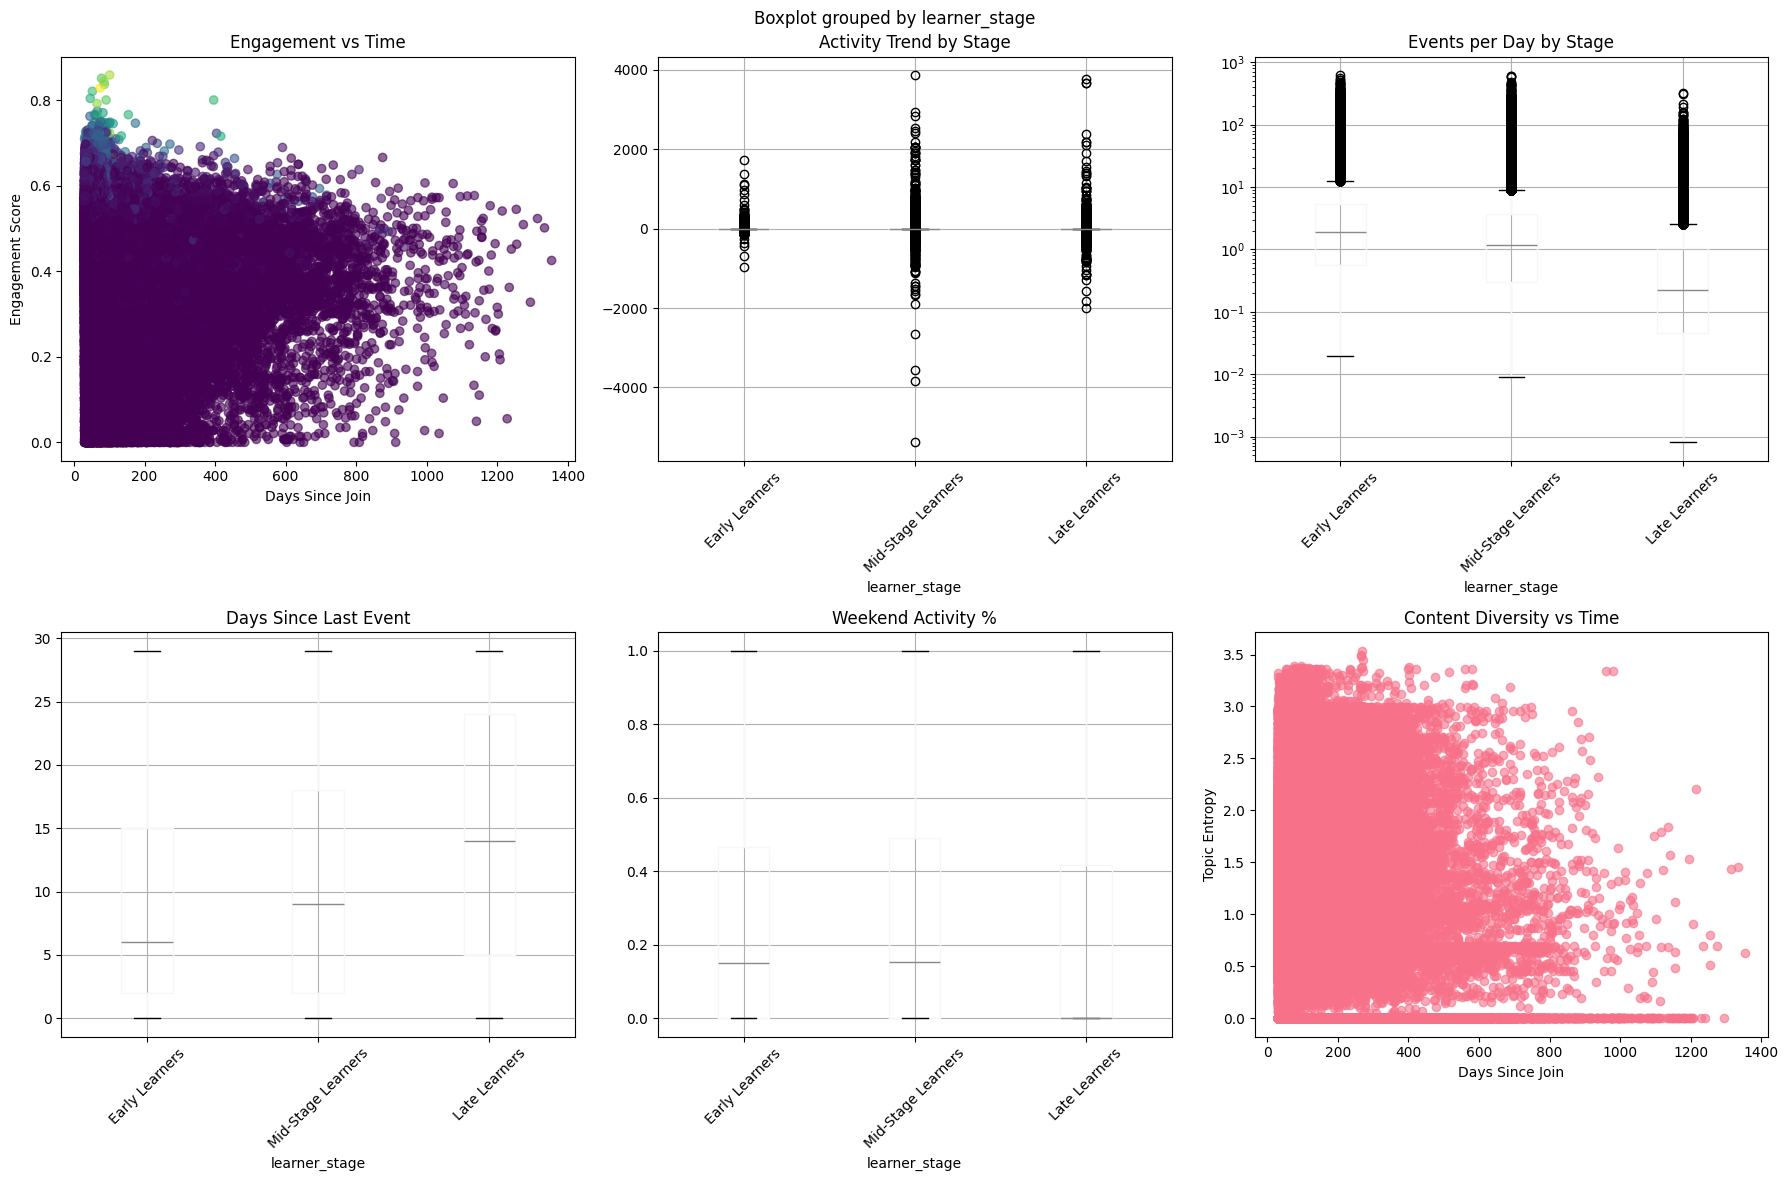


6.10 SUMMARY INSIGHTS
Key Findings from Time-Based Segmentation:

1. Learner Stage Characteristics:
   Late Learners:
     - Average total events: 309.2
     - Average completion rate: 0.794
     - Average engagement score: 0.359
   Early Learners:
     - Average total events: 318.1
     - Average completion rate: 0.768
     - Average engagement score: 0.412
   Mid-Stage Learners:
     - Average total events: 485.5
     - Average completion rate: 0.806
     - Average engagement score: 0.403

2. Time Correlations:
   No strong correlations found with time

3. Learning Efficiency:
   - Early learners avg events/day: 8.024
   - Late learners avg events/day: 1.829

4. Significant Behavioral Differences:
   - 9 out of 9 metrics show significant differences
   - Metrics with significant differences:
     - total_events
     - total_quizzes
     - days_since_last_event
     - avg_component_time
     - pct_completed
     - n_unique_components
     - num_sessions
     - pct_weekend_events
    

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== TIME-BASED SEGMENTATION ANALYSIS ===\n")

# ================================================================
# 6.1 EARLY VS LATE LEARNERS ANALYSIS
# ================================================================

print("6.1 EARLY VS LATE LEARNERS ANALYSIS")
print("=" * 50)

# Define early vs late learners based on days_since_join
days_since_join_median = snapshots_hist['days_since_join'].median()
days_since_join_q25 = snapshots_hist['days_since_join'].quantile(0.25)
days_since_join_q75 = snapshots_hist['days_since_join'].quantile(0.75)

print(f"Days since join distribution:")
print(f"  Min: {snapshots_hist['days_since_join'].min()}")
print(f"  Q25: {days_since_join_q25:.1f}")
print(f"  Median: {days_since_join_median:.1f}")
print(f"  Q75: {days_since_join_q75:.1f}")
print(f"  Max: {snapshots_hist['days_since_join'].max()}")

# Create segments
snapshots_hist['learner_stage'] = pd.cut(snapshots_hist['days_since_join'],
                            bins=[0, days_since_join_q25, days_since_join_q75, float('inf')],
                            labels=['Early Learners', 'Mid-Stage Learners', 'Late Learners'],
                            include_lowest=True)

# Alternative binary segmentation
snapshots_hist['is_early_learner'] = snapshots_hist['days_since_join'] <= days_since_join_median

print(f"\nLearner stage distribution:")
print(snapshots_hist['learner_stage'].value_counts())
print(f"\nEarly vs Late learners:")
print(snapshots_hist['is_early_learner'].value_counts())

# ================================================================
# 6.2 BEHAVIORAL PATTERNS BY LEARNER STAGE
# ================================================================

print("\n6.2 BEHAVIORAL PATTERNS BY LEARNER STAGE")
print("=" * 50)

# Key behavioral metrics to analyze
behavioral_metrics = [
    'total_events', 'total_quizzes', 'days_since_last_event',
    'avg_component_time', 'pct_completed', 'n_unique_components',
    'num_sessions', 'pct_weekend_events', 'activity_trend'
]

# Statistical comparison between stages
comparison_results = []

for metric in behavioral_metrics:
    early = snapshots_hist[snapshots_hist['learner_stage'] == 'Early Learners'][metric]
    mid = snapshots_hist[snapshots_hist['learner_stage'] == 'Mid-Stage Learners'][metric]
    late = snapshots_hist[snapshots_hist['learner_stage'] == 'Late Learners'][metric]

    # ANOVA test
    f_stat, p_value = stats.f_oneway(early.dropna(), mid.dropna(), late.dropna())

    comparison_results.append({
        'metric': metric,
        'early_mean': early.mean(),
        'mid_mean': mid.mean(),
        'late_mean': late.mean(),
        'early_std': early.std(),
        'mid_std': mid.std(),
        'late_std': late.std(),
        'f_statistic': f_stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

comparison_snapshots_hist = pd.DataFrame(comparison_results)
print("Behavioral patterns by learner stage:")
print(comparison_snapshots_hist[['metric', 'early_mean', 'mid_mean', 'late_mean', 'p_value', 'significant']].round(3))

# ================================================================
# 6.3 VISUALIZATIONS FOR EARLY VS LATE LEARNERS
# ================================================================

print("\n6.3 CREATING VISUALIZATIONS...")

# Create a comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Behavioral Patterns: Early vs Mid vs Late Learners', fontsize=16, fontweight='bold')

# Metrics to visualize
viz_metrics = [
    ('total_events', 'Total Events'),
    ('avg_component_time', 'Avg Component Time'),
    ('pct_completed', 'Completion Rate'),
    ('n_unique_components', 'Unique Components'),
    ('num_sessions', 'Number of Sessions'),
    ('pct_weekend_events', 'Weekend Activity %'),
    ('activity_trend', 'Activity Trend'),
    ('days_since_last_event', 'Days Since Last Event'),
    ('topic_entropy', 'Topic Diversity')
]

for idx, (metric, title) in enumerate(viz_metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Box plot for each stage
    snapshots_hist.boxplot(column=metric, by='learner_stage', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Learner Stage')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ================================================================
# 6.4 ENGAGEMENT PATTERNS OVER TIME
# ================================================================

print("\n6.4 ENGAGEMENT PATTERNS ANALYSIS")
print("=" * 50)

# Create engagement score
snapshots_hist['engagement_score'] = (
    (snapshots_hist['total_events'] / snapshots_hist['total_events'].max()) * 0.3 +
    (snapshots_hist['pct_completed']) * 0.3 +
    (snapshots_hist['num_sessions'] / snapshots_hist['num_sessions'].max()) * 0.2 +
    (1 - snapshots_hist['days_since_last_event'] / snapshots_hist['days_since_last_event'].max()) * 0.2
)

# Analyze engagement by stage
engagement_by_stage = snapshots_hist.groupby('learner_stage')['engagement_score'].agg(['mean', 'std', 'median']).round(3)
print("Engagement scores by learner stage:")
print(engagement_by_stage)

# ================================================================
# 6.5 ACTIVITY PATTERNS VISUALIZATION
# ================================================================

# Create activity pattern visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Activity Patterns by Learner Stage', fontsize=16, fontweight='bold')

# 1. Total Events Distribution
snapshots_hist.boxplot(column='total_events', by='learner_stage', ax=ax1)
ax1.set_title('Total Events by Learner Stage')
ax1.set_yscale('log')
ax1.tick_params(axis='x', rotation=45)

# 2. Session Patterns
snapshots_hist.boxplot(column='num_sessions', by='learner_stage', ax=ax2)
ax2.set_title('Number of Sessions by Learner Stage')
ax2.tick_params(axis='x', rotation=45)

# 3. Completion Rates
snapshots_hist.boxplot(column='pct_completed', by='learner_stage', ax=ax3)
ax3.set_title('Completion Rate by Learner Stage')
ax3.tick_params(axis='x', rotation=45)

# 4. Days Since Last Event
snapshots_hist.boxplot(column='days_since_last_event', by='learner_stage', ax=ax4)
ax4.set_title('Days Since Last Event by Learner Stage')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ================================================================
# 6.6 TIME-BASED TRENDS ANALYSIS
# ================================================================

print("\n6.6 TIME-BASED TRENDS ANALYSIS")
print("=" * 50)

# Create time bins for more granular analysis
snapshots_hist['days_since_join_bin'] = pd.cut(snapshots_hist['days_since_join'],
                                  bins=10,
                                  labels=[f'Bin_{i+1}' for i in range(10)])

# Analyze trends across time bins
time_trends = snapshots_hist.groupby('days_since_join_bin').agg({
    'total_events': ['mean', 'median'],
    'pct_completed': ['mean', 'median'],
    'num_sessions': ['mean', 'median'],
    'days_since_last_event': ['mean', 'median'],
    'engagement_score': ['mean', 'median']
}).round(3)

print("Trends across time bins:")
print(time_trends)

# ================================================================
# 6.7 CORRELATION WITH TIME
# ================================================================

print("\n6.7 CORRELATION WITH DAYS SINCE JOIN")
print("=" * 50)

# Calculate correlations with days_since_join
time_correlations = []
for metric in behavioral_metrics + ['engagement_score']:
    if metric in snapshots_hist.columns:
        correlation = snapshots_hist['days_since_join'].corr(snapshots_hist[metric])
        time_correlations.append({
            'metric': metric,
            'correlation_with_time': correlation,
            'strength': 'Strong' if abs(correlation) > 0.5 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'
        })

correlation_snapshots_hist = pd.DataFrame(time_correlations)
correlation_snapshots_hist = correlation_snapshots_hist.sort_values('correlation_with_time', key=abs, ascending=False)

print("Correlations with days since join:")
print(correlation_snapshots_hist.round(3))

# ================================================================
# 6.8 LEARNING TRAJECTORY ANALYSIS
# ================================================================

print("\n6.8 LEARNING TRAJECTORY ANALYSIS")
print("=" * 50)

# Create learning efficiency metrics
snapshots_hist['events_per_day'] = snapshots_hist['total_events'] / np.maximum(snapshots_hist['days_since_join'], 1)
snapshots_hist['completion_efficiency'] = snapshots_hist['pct_completed'] / np.maximum(snapshots_hist['days_since_join'], 1) * 1000  # per 1000 days

trajectory_analysis = snapshots_hist.groupby('learner_stage').agg({
    'events_per_day': ['mean', 'std'],
    'completion_efficiency': ['mean', 'std'],
    'avg_component_time': ['mean', 'std']
}).round(4)

print("Learning trajectory metrics by stage:")
print(trajectory_analysis)

# ================================================================
# 6.9 FINAL VISUALIZATION: COMPREHENSIVE TIME ANALYSIS
# ================================================================

# Create comprehensive time-based visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comprehensive Time-Based Learning Analysis', fontsize=16, fontweight='bold')

# 1. Engagement over time
axes[0,0].scatter(snapshots_hist['days_since_join'], snapshots_hist['engagement_score'], alpha=0.6, c=snapshots_hist['total_events'], cmap='viridis')
axes[0,0].set_xlabel('Days Since Join')
axes[0,0].set_ylabel('Engagement Score')
axes[0,0].set_title('Engagement vs Time')

# 2. Activity trend by stage
snapshots_hist.boxplot(column='activity_trend', by='learner_stage', ax=axes[0,1])
axes[0,1].set_title('Activity Trend by Stage')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Events per day by stage
snapshots_hist.boxplot(column='events_per_day', by='learner_stage', ax=axes[0,2])
axes[0,2].set_title('Events per Day by Stage')
axes[0,2].set_yscale('log')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Time since last activity
snapshots_hist.boxplot(column='days_since_last_event', by='learner_stage', ax=axes[1,0])
axes[1,0].set_title('Days Since Last Event')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Weekend activity patterns
snapshots_hist.boxplot(column='pct_weekend_events', by='learner_stage', ax=axes[1,1])
axes[1,1].set_title('Weekend Activity %')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Content diversity over time
axes[1,2].scatter(snapshots_hist['days_since_join'], snapshots_hist['topic_entropy'], alpha=0.6)
axes[1,2].set_xlabel('Days Since Join')
axes[1,2].set_ylabel('Topic Entropy')
axes[1,2].set_title('Content Diversity vs Time')

plt.tight_layout()
plt.show()

# ================================================================
# 6.10 SUMMARY INSIGHTS
# ================================================================

print("\n6.10 SUMMARY INSIGHTS")
print("=" * 50)

print("Key Findings from Time-Based Segmentation:")
print("\n1. Learner Stage Characteristics:")
for stage in snapshots_hist['learner_stage'].unique():
    if pd.notna(stage):
        stage_data = snapshots_hist[snapshots_hist['learner_stage'] == stage]
        print(f"   {stage}:")
        print(f"     - Average total events: {stage_data['total_events'].mean():.1f}")
        print(f"     - Average completion rate: {stage_data['pct_completed'].mean():.3f}")
        print(f"     - Average engagement score: {stage_data['engagement_score'].mean():.3f}")

print(f"\n2. Time Correlations:")
strong_correlations = correlation_snapshots_hist[correlation_snapshots_hist['strength'] == 'Strong']
if not strong_correlations.empty:
    print("   Strong correlations with time:")
    for _, row in strong_correlations.iterrows():
        print(f"     - {row['metric']}: {row['correlation_with_time']:.3f}")
else:
    print("   No strong correlations found with time")

print(f"\n3. Learning Efficiency:")
print(f"   - Early learners avg events/day: {snapshots_hist[snapshots_hist['learner_stage']=='Early Learners']['events_per_day'].mean():.3f}")
print(f"   - Late learners avg events/day: {snapshots_hist[snapshots_hist['learner_stage']=='Late Learners']['events_per_day'].mean():.3f}")

# Statistical significance summary
significant_differences = comparison_snapshots_hist[comparison_snapshots_hist['significant'] == True]
print(f"\n4. Significant Behavioral Differences:")
print(f"   - {len(significant_differences)} out of {len(comparison_snapshots_hist)} metrics show significant differences")
print("   - Metrics with significant differences:")
for metric in significant_differences['metric']:
    print(f"     - {metric}")

=== 7. FEATURE CORRELATIONS AND MULTICOLLINEARITY ===

Analyzing 40 numeric features for correlations and multicollinearity
Features: ['center_id', 'days_since_join', 'total_events', 'total_quizzes', 'days_since_last_event', 'days_since_last_quiz', 'sum_component_time', 'avg_component_time', 'pct_completed', 'n_unique_components']...

1. CORRELATION HEATMAP
--------------------------------------------------


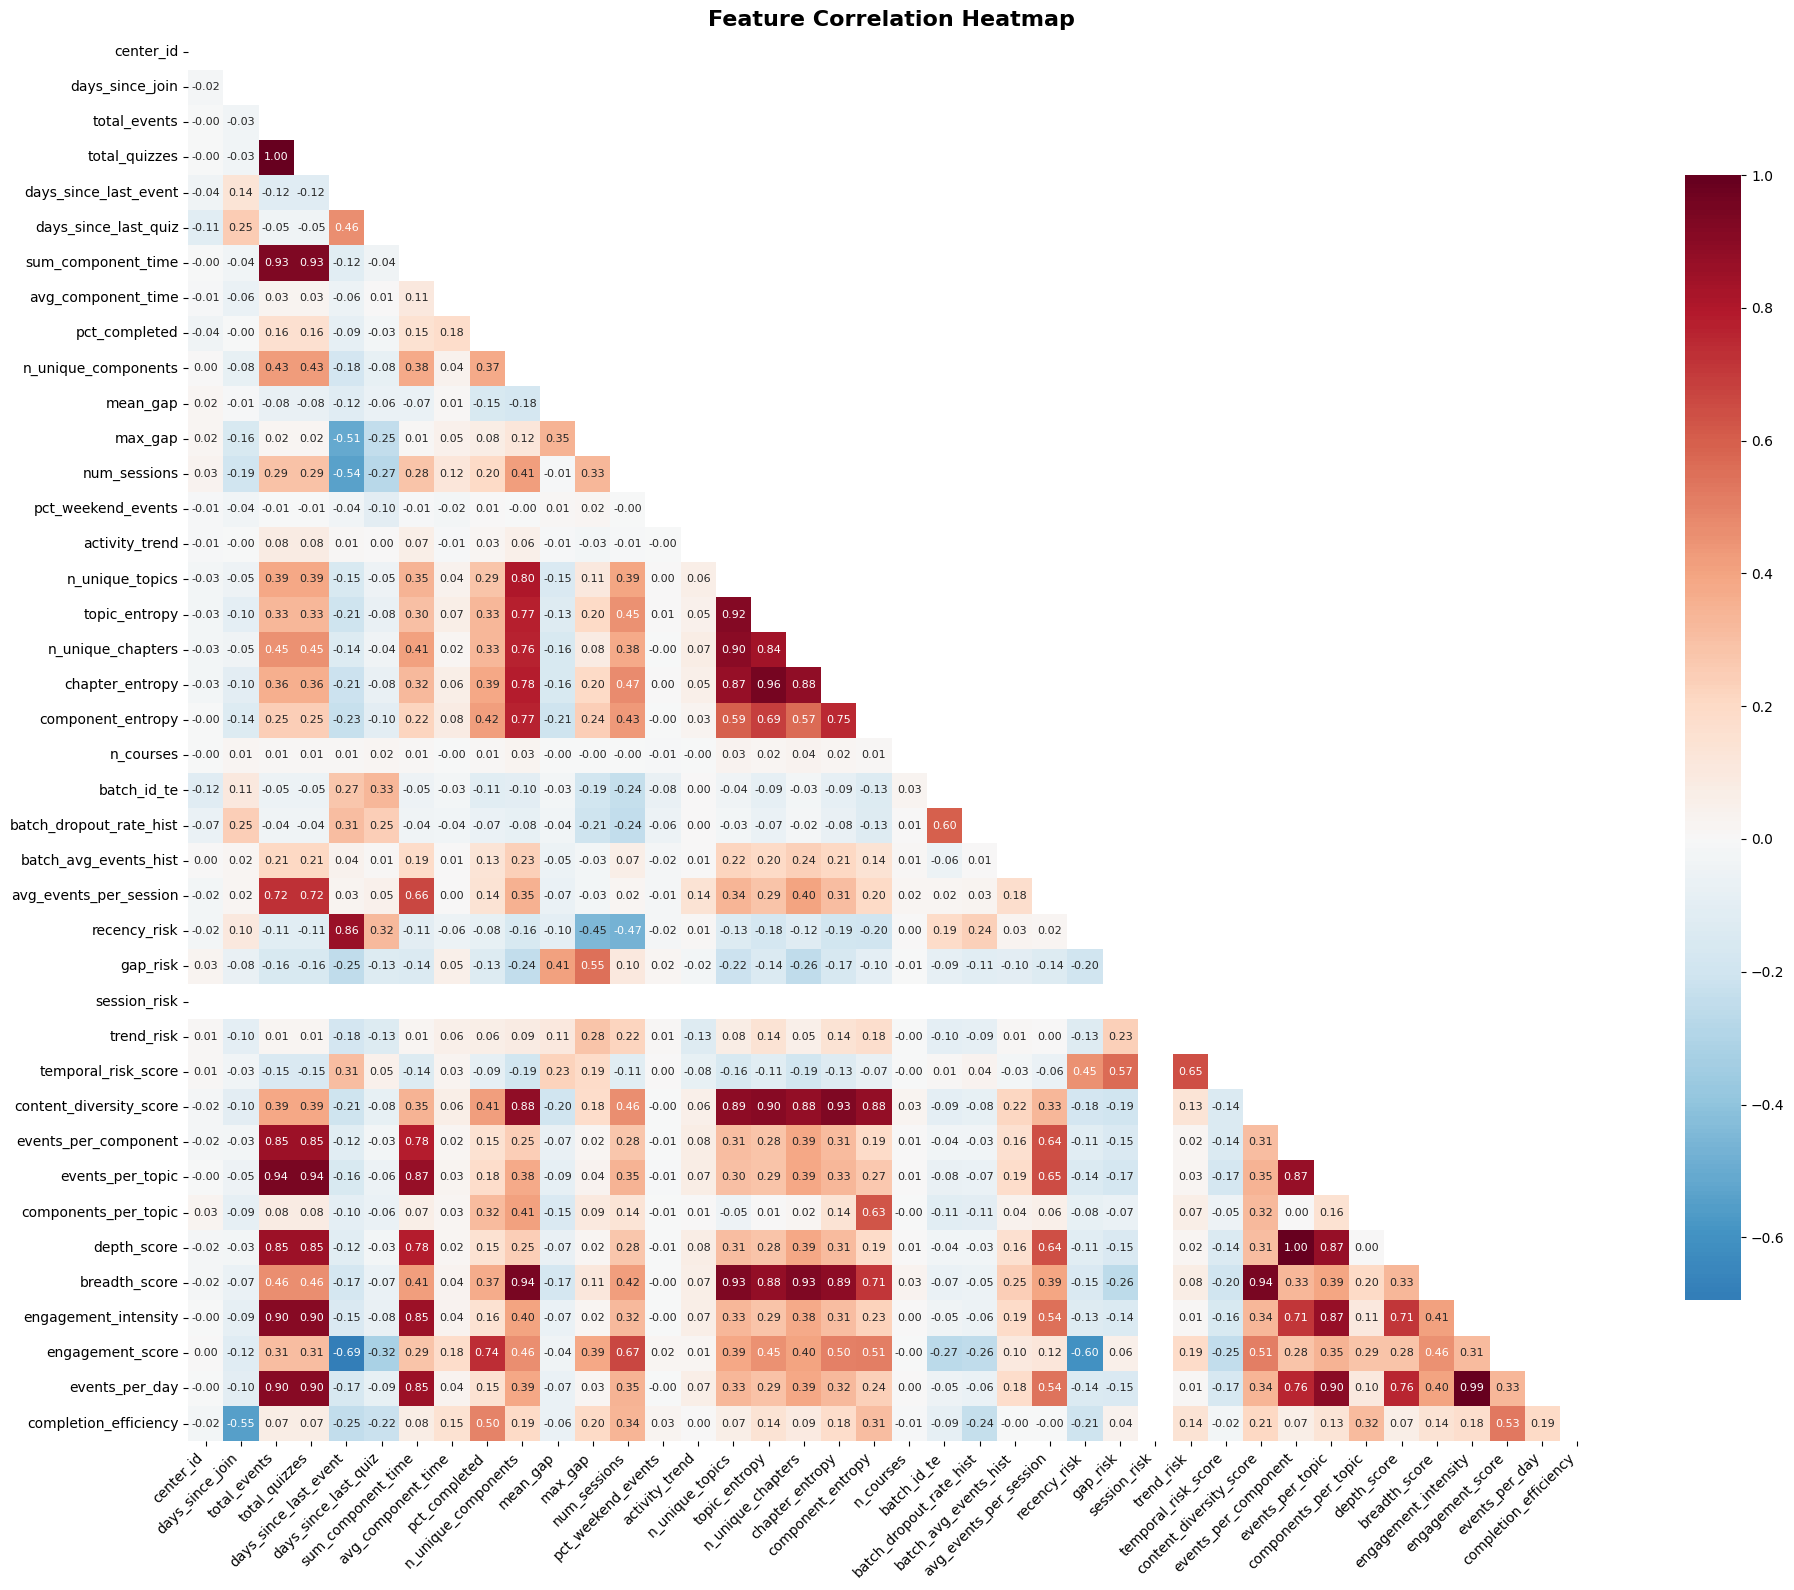


2. HIGHLY CORRELATED FEATURE PAIRS
--------------------------------------------------
Found 57 highly correlated pairs (|r| > 0.7):
              Feature_1               Feature_2  Correlation
           total_events           total_quizzes     1.000000
   events_per_component             depth_score     1.000000
   engagement_intensity          events_per_day     0.990539
          topic_entropy         chapter_entropy     0.957751
content_diversity_score           breadth_score     0.941512
    n_unique_components           breadth_score     0.941367
           total_events        events_per_topic     0.940764
          total_quizzes        events_per_topic     0.940764
          total_quizzes      sum_component_time     0.932665
           total_events      sum_component_time     0.932665
        chapter_entropy content_diversity_score     0.931403
      n_unique_chapters           breadth_score     0.931386
        n_unique_topics           breadth_score     0.930899
        n_uni

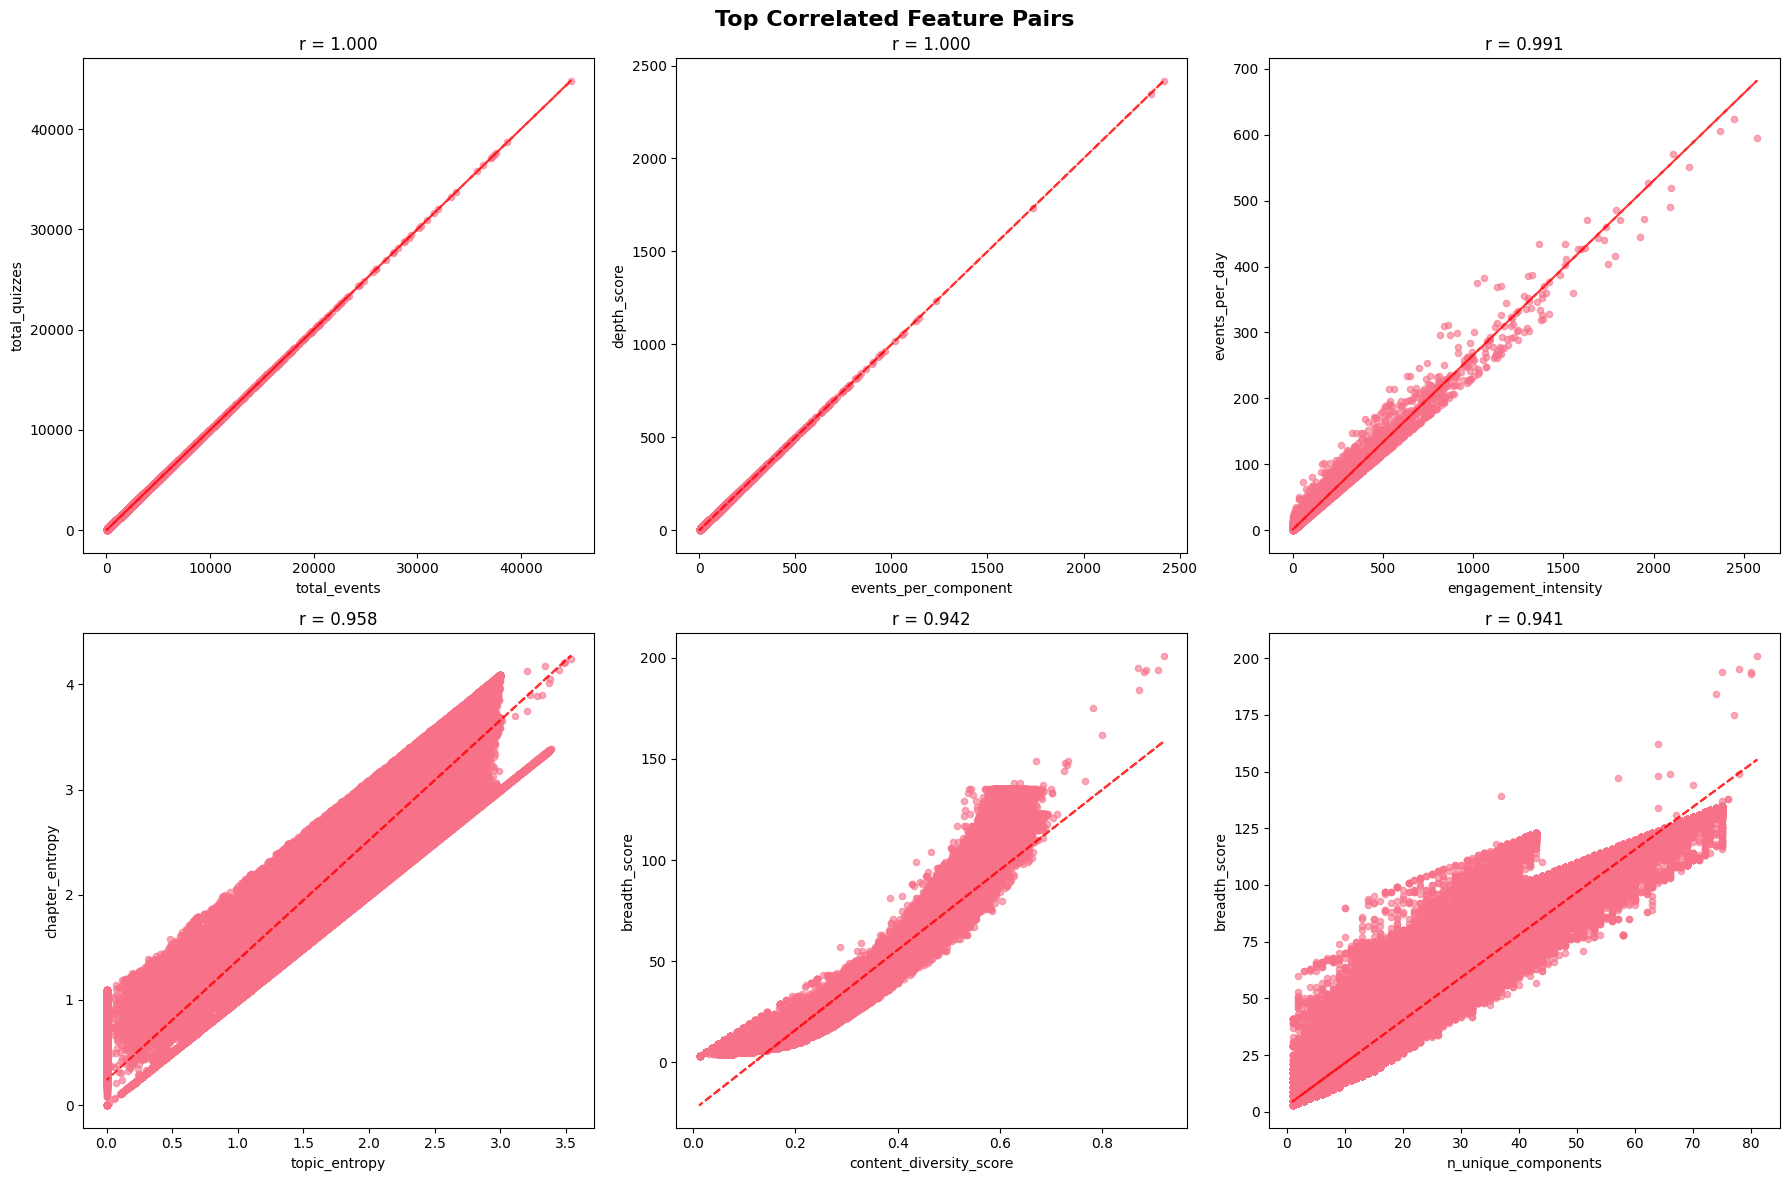


3. FEATURE IMPORTANCE - UNIVARIATE RELATIONSHIPS
--------------------------------------------------
TOP 15 MOST IMPORTANT FEATURES:
                Feature    F_Score  MI_Score  Pearson_Corr  P_Value  Composite_Score
  days_since_last_event 32849.5009    0.1123        0.4342   0.0000           1.0000
           recency_risk 24730.3085    0.0918        0.3858   0.0000           0.8195
       engagement_score 19074.6961    0.0842        0.3448   0.0000           0.7081
           num_sessions 19408.3960    0.0657        0.3474   0.0000           0.6587
            batch_id_te 16368.1211    0.0596        0.3221   0.0000           0.5902
   days_since_last_quiz  6798.9696    0.1046        0.2142   0.0000           0.5438
batch_dropout_rate_hist 11773.0737    0.0528        0.2773   0.0000           0.4890
  completion_efficiency 11718.4094    0.0526        0.2767   0.0000           0.4874
                max_gap  9735.8870    0.0519        0.2538   0.0000           0.4476
        days_sinc

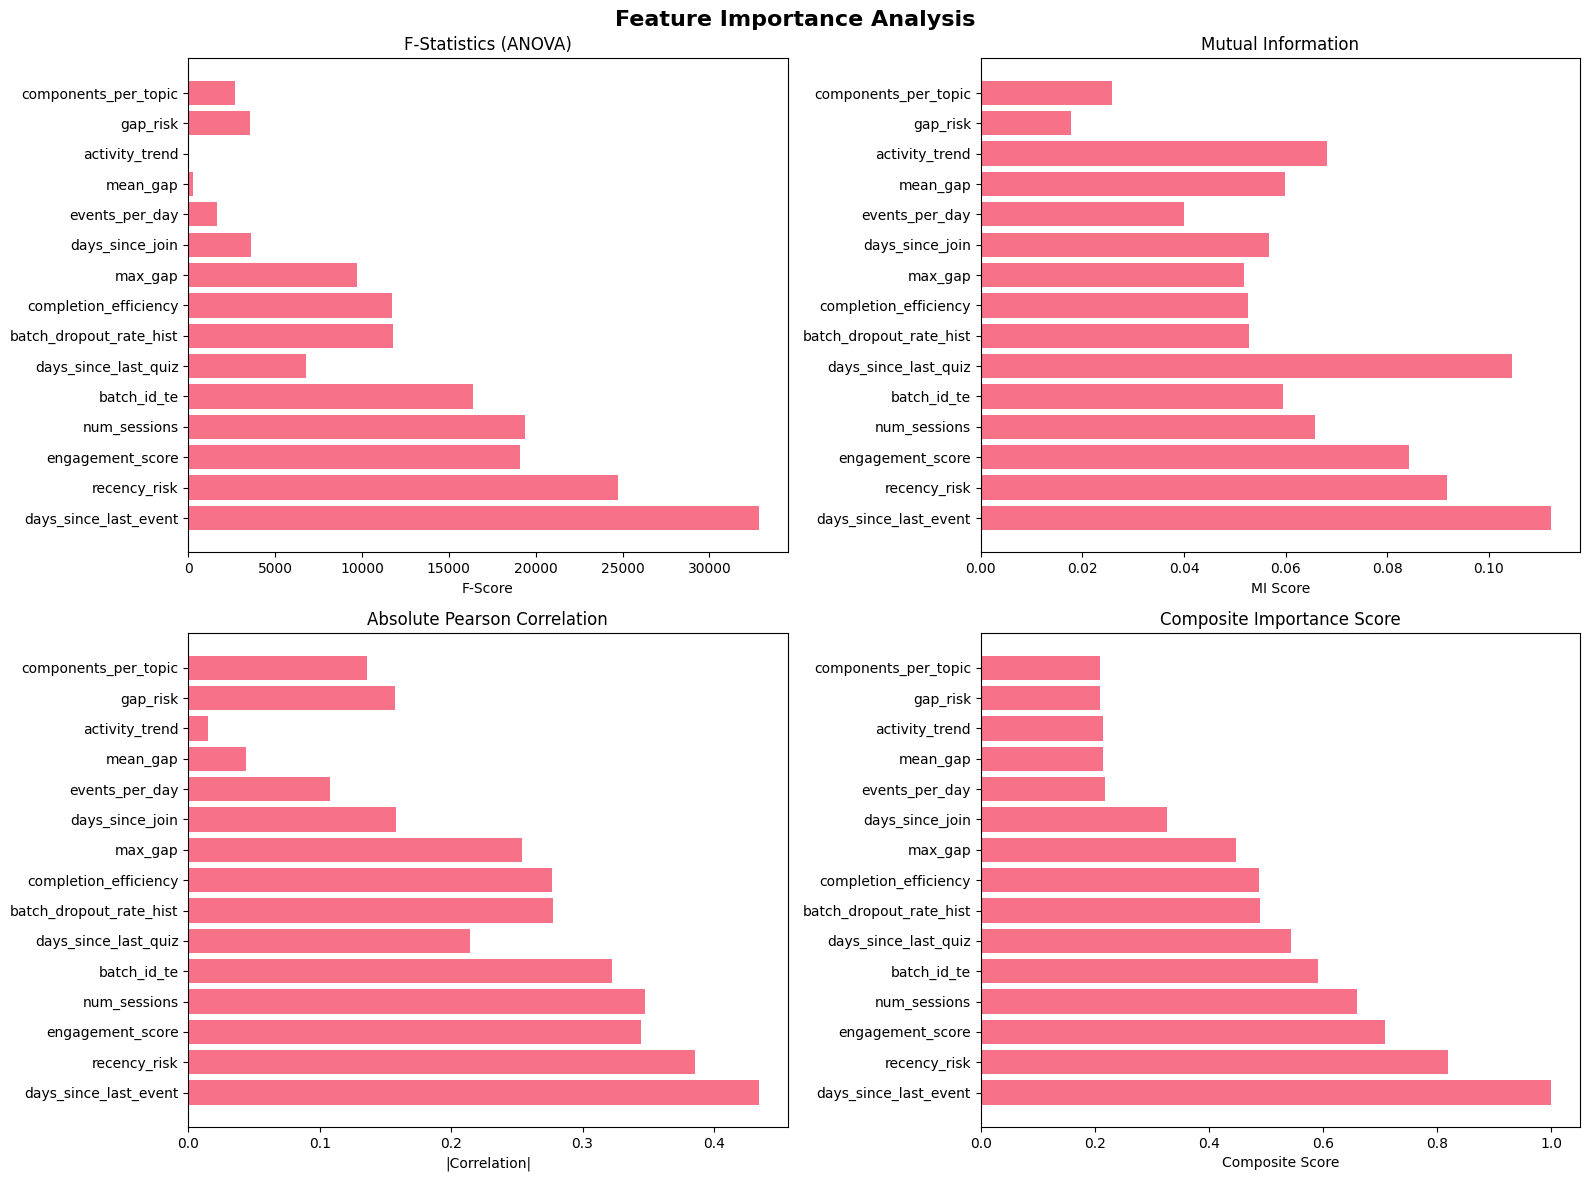


4. MULTICOLLINEARITY ANALYSIS (VIF)
--------------------------------------------------
Calculating VIF for top 20 features (out of 39)...
VARIANCE INFLATION FACTORS:
(VIF > 5: Moderate multicollinearity, VIF > 10: High multicollinearity)
               Feature    VIF
         total_quizzes    inf
          total_events    inf
  events_per_component    inf
           depth_score    inf
         breadth_score 538.82
   n_unique_components 176.67
        events_per_day 127.17
  engagement_intensity 124.39
     n_unique_chapters 117.95
      events_per_topic  16.61
             center_id  15.13
    sum_component_time   8.86
 completion_efficiency   5.63
    avg_component_time   4.30
 days_since_last_event   3.42
       days_since_join   2.96
avg_events_per_session   2.78
  days_since_last_quiz   1.74
 batch_avg_events_hist   1.56
        activity_trend   1.03

⚠️  FEATURES WITH HIGH MULTICOLLINEARITY (VIF > 5):
              Feature    VIF
        total_quizzes    inf
         total_event

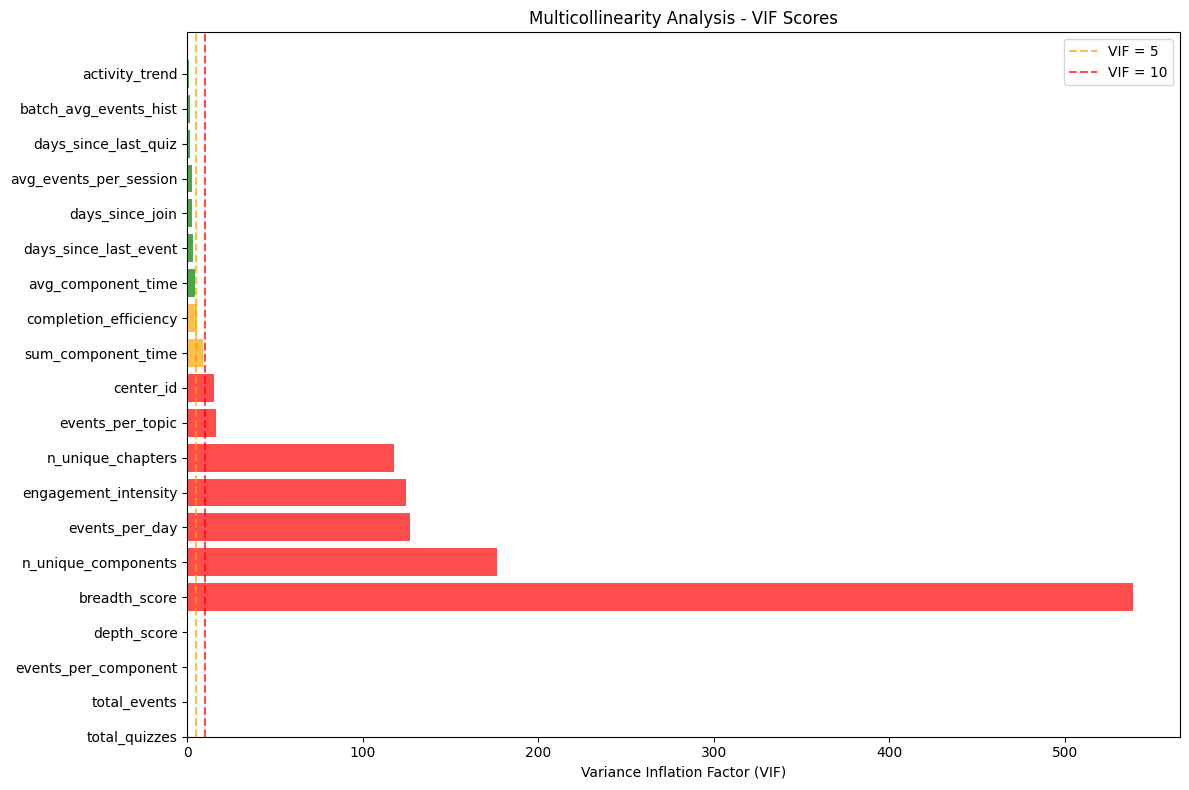


5. SUMMARY AND RECOMMENDATIONS
--------------------------------------------------
KEY FINDINGS:
• Found 57 highly correlated feature pairs - consider removing redundant features
• 11 features show high multicollinearity (VIF > 10)
• 2 features show moderate multicollinearity (VIF 5-10)
• Top 5 most predictive features: days_since_last_event, recency_risk, engagement_score, num_sessions, batch_id_te

📊 Analysis complete! Consider these insights for feature selection and model building.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


print("=== 7. FEATURE CORRELATIONS AND MULTICOLLINEARITY ===\n")

# Select numeric features for correlation analysis
numeric_features = snapshots_hist.select_dtypes(include=[np.number]).columns.tolist()

# Remove target variable and index from features if they exist
features_to_exclude = ['label', 'index', 'user_id'] if 'label' in snapshots_hist.columns else ['index', 'user_id']
numeric_features = [col for col in numeric_features if col not in features_to_exclude]

print(f"Analyzing {len(numeric_features)} numeric features for correlations and multicollinearity")
print(f"Features: {numeric_features[:10]}{'...' if len(numeric_features) > 10 else ''}\n")

# === CORRELATION HEATMAP ===
print("1. CORRELATION HEATMAP")
print("-" * 50)

# Calculate correlation matrix
correlation_matrix = snapshots_hist[numeric_features].corr()

# Create correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            annot_kws={'size': 8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === HIGHLY CORRELATED FEATURES ===
print("\n2. HIGHLY CORRELATED FEATURE PAIRS")
print("-" * 50)

# Find highly correlated pairs (threshold > 0.7 or < -0.7)
high_corr_threshold = 0.7
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > high_corr_threshold:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if high_corr_pairs:
    high_corr_snapshots_hist = pd.DataFrame(high_corr_pairs)
    high_corr_snapshots_hist = high_corr_snapshots_hist.sort_values('Correlation', key=abs, ascending=False)
    print(f"Found {len(high_corr_pairs)} highly correlated pairs (|r| > {high_corr_threshold}):")
    print(high_corr_snapshots_hist.to_string(index=False))

    # Visualize top correlated pairs
    if len(high_corr_pairs) > 0:
        top_pairs = high_corr_snapshots_hist.head(6)  # Show top 6 pairs
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()

        for idx, (_, row) in enumerate(top_pairs.iterrows()):
            if idx < 6:
                snapshots_hist_clean = snapshots_hist[[row['Feature_1'], row['Feature_2']]].dropna()
                axes[idx].scatter(snapshots_hist_clean[row['Feature_1']], snapshots_hist_clean[row['Feature_2']],
                                alpha=0.6, s=20)
                axes[idx].set_xlabel(row['Feature_1'])
                axes[idx].set_ylabel(row['Feature_2'])
                axes[idx].set_title(f"r = {row['Correlation']:.3f}")

                # Add trend line
                z = np.polyfit(snapshots_hist_clean[row['Feature_1']], snapshots_hist_clean[row['Feature_2']], 1)
                p = np.poly1d(z)
                axes[idx].plot(snapshots_hist_clean[row['Feature_1']], p(snapshots_hist_clean[row['Feature_1']]),
                             "r--", alpha=0.8)

        plt.suptitle('Top Correlated Feature Pairs', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
else:
    print(f"No highly correlated pairs found with |r| > {high_corr_threshold}")

# === FEATURE IMPORTANCE (UNIVARIATE RELATIONSHIPS) ===
print(f"\n3. FEATURE IMPORTANCE - UNIVARIATE RELATIONSHIPS")
print("-" * 50)

# For this analysis, we need a target variable
# Since label isn't in the sample data, let's create a proxy based on behavioral patterns
# You should replace this with your actual label target variable



# Calculate different types of feature importance
feature_importance_results = []

# 1. F-statistic (ANOVA F-test)
try:
    f_selector = SelectKBest(score_func=f_classif, k='all')
    f_scores = f_selector.fit(snapshots_hist[numeric_features].fillna(0), snapshots_hist['label']).scores_

    for feature, score in zip(numeric_features, f_scores):
        feature_importance_results.append({
            'Feature': feature,
            'F_Score': score,
            'Method': 'F-statistic'
        })
except Exception as e:
    print(f"Error calculating F-scores: {e}")

# 2. Mutual Information
try:
    mi_scores = mutual_info_classif(snapshots_hist[numeric_features].fillna(0), snapshots_hist['label'], random_state=42)

    for feature, score in zip(numeric_features, mi_scores):
        existing_row = next((item for item in feature_importance_results if item['Feature'] == feature), None)
        if existing_row:
            existing_row['MI_Score'] = score
        else:
            feature_importance_results.append({
                'Feature': feature,
                'MI_Score': score,
                'Method': 'Mutual Information'
            })
except Exception as e:
    print(f"Error calculating Mutual Information scores: {e}")

# 3. Pearson Correlation with target
for feature in numeric_features:
    try:
        corr, p_value = pearsonr(snapshots_hist[feature].fillna(0), snapshots_hist['label'])
        existing_row = next((item for item in feature_importance_results if item['Feature'] == feature), None)
        if existing_row:
            existing_row['Pearson_Corr'] = abs(corr)
            existing_row['P_Value'] = p_value
        else:
            feature_importance_results.append({
                'Feature': feature,
                'Pearson_Corr': abs(corr),
                'P_Value': p_value
            })
    except Exception as e:
        continue

# Create comprehensive feature importance DataFrame
importance_snapshots_hist = pd.DataFrame(feature_importance_results)
if not importance_snapshots_hist.empty:
    # Group by feature and aggregate scores
    importance_summary = importance_snapshots_hist.groupby('Feature').agg({
        'F_Score': 'first',
        'MI_Score': 'first',
        'Pearson_Corr': 'first',
        'P_Value': 'first'
    }).reset_index()

    # Calculate composite importance score (normalized)
    for col in ['F_Score', 'MI_Score', 'Pearson_Corr']:
        if col in importance_summary.columns:
            importance_summary[f'{col}_norm'] = (
                importance_summary[col] / importance_summary[col].max()
            ).fillna(0)

    # Composite score
    score_cols = [col for col in importance_summary.columns if col.endswith('_norm')]
    if score_cols:
        importance_summary['Composite_Score'] = importance_summary[score_cols].mean(axis=1)
        importance_summary = importance_summary.sort_values('Composite_Score', ascending=False)

    print("TOP 15 MOST IMPORTANT FEATURES:")
    display_cols = ['Feature', 'F_Score', 'MI_Score', 'Pearson_Corr', 'P_Value', 'Composite_Score']
    display_cols = [col for col in display_cols if col in importance_summary.columns]
    print(importance_summary[display_cols].head(15).to_string(index=False, float_format='%.4f'))

    # Visualize feature importance
    top_features = importance_summary.head(15)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # F-Score
    if 'F_Score' in top_features.columns:
        axes[0,0].barh(range(len(top_features)), top_features['F_Score'])
        axes[0,0].set_yticks(range(len(top_features)))
        axes[0,0].set_yticklabels(top_features['Feature'])
        axes[0,0].set_title('F-Statistics (ANOVA)')
        axes[0,0].set_xlabel('F-Score')

    # Mutual Information
    if 'MI_Score' in top_features.columns:
        axes[0,1].barh(range(len(top_features)), top_features['MI_Score'])
        axes[0,1].set_yticks(range(len(top_features)))
        axes[0,1].set_yticklabels(top_features['Feature'])
        axes[0,1].set_title('Mutual Information')
        axes[0,1].set_xlabel('MI Score')

    # Pearson Correlation
    if 'Pearson_Corr' in top_features.columns:
        axes[1,0].barh(range(len(top_features)), top_features['Pearson_Corr'])
        axes[1,0].set_yticks(range(len(top_features)))
        axes[1,0].set_yticklabels(top_features['Feature'])
        axes[1,0].set_title('Absolute Pearson Correlation')
        axes[1,0].set_xlabel('|Correlation|')

    # Composite Score
    if 'Composite_Score' in top_features.columns:
        axes[1,1].barh(range(len(top_features)), top_features['Composite_Score'])
        axes[1,1].set_yticks(range(len(top_features)))
        axes[1,1].set_yticklabels(top_features['Feature'])
        axes[1,1].set_title('Composite Importance Score')
        axes[1,1].set_xlabel('Composite Score')

    plt.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# === MULTICOLLINEARITY ANALYSIS (VIF) ===
print(f"\n4. MULTICOLLINEARITY ANALYSIS (VIF)")
print("-" * 50)

# Calculate Variance Inflation Factor
def calculate_vif(snapshots_hist_features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = snapshots_hist_features.columns
    vif_data["VIF"] = [variance_inflation_factor(snapshots_hist_features.values, i)
                       for i in range(len(snapshots_hist_features.columns))]
    return vif_data.sort_values('VIF', ascending=False)

try:
    # Prepare data for VIF calculation (remove any infinite or very large values)
    vif_features = snapshots_hist[numeric_features].fillna(0)

    # Remove features with zero variance
    vif_features = vif_features.loc[:, vif_features.var() != 0]

    # Calculate VIF for a subset of features (VIF calculation can be slow)
    if len(vif_features.columns) > 20:
        print(f"Calculating VIF for top 20 features (out of {len(vif_features.columns)})...")
        # Select top features based on variance or previous importance analysis
        feature_vars = vif_features.var().sort_values(ascending=False)
        vif_features = vif_features[feature_vars.head(20).index]

    vif_results = calculate_vif(vif_features)

    print("VARIANCE INFLATION FACTORS:")
    print("(VIF > 5: Moderate multicollinearity, VIF > 10: High multicollinearity)")
    print(vif_results.to_string(index=False, float_format='%.2f'))

    # Highlight problematic features
    high_vif = vif_results[vif_results['VIF'] > 5]
    if not high_vif.empty:
        print(f"\n⚠️  FEATURES WITH HIGH MULTICOLLINEARITY (VIF > 5):")
        print(high_vif.to_string(index=False, float_format='%.2f'))

    # Visualize VIF
    plt.figure(figsize=(12, 8))
    colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_results['VIF']]
    bars = plt.barh(range(len(vif_results)), vif_results['VIF'], color=colors, alpha=0.7)
    plt.yticks(range(len(vif_results)), vif_results['Feature'])
    plt.xlabel('Variance Inflation Factor (VIF)')
    plt.title('Multicollinearity Analysis - VIF Scores')
    plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
    plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error calculating VIF: {e}")
    print("This might be due to perfect multicollinearity or insufficient data variation.")

# === SUMMARY RECOMMENDATIONS ===
print(f"\n5. SUMMARY AND RECOMMENDATIONS")
print("-" * 50)

recommendations = []

# High correlation recommendations
if high_corr_pairs:
    recommendations.append(f"• Found {len(high_corr_pairs)} highly correlated feature pairs - consider removing redundant features")

# VIF recommendations
try:
    if 'vif_results' in locals():
        high_multicollinearity = len(vif_results[vif_results['VIF'] > 10])
        moderate_multicollinearity = len(vif_results[(vif_results['VIF'] > 5) & (vif_results['VIF'] <= 10)])

        if high_multicollinearity > 0:
            recommendations.append(f"• {high_multicollinearity} features show high multicollinearity (VIF > 10)")
        if moderate_multicollinearity > 0:
            recommendations.append(f"• {moderate_multicollinearity} features show moderate multicollinearity (VIF 5-10)")
except:
    pass

# Feature importance recommendations
if 'importance_summary' in locals() and not importance_summary.empty:
    top_5_features = importance_summary.head(5)['Feature'].tolist()
    recommendations.append(f"• Top 5 most predictive features: {', '.join(top_5_features)}")

if not recommendations:
    recommendations.append("• No major multicollinearity issues detected")
    recommendations.append("• Feature correlations appear manageable")

print("KEY FINDINGS:")
for rec in recommendations:
    print(rec)

print(f"\n📊 Analysis complete! Consider these insights for feature selection and model building.")

In [16]:
import nbformat
from IPython.display import display, Markdown, Image
import base64

# Path to notebook
notebook_path = '/content/drive/MyDrive/ColabNotebooks/DissertationEDA.ipynb'

# Load notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Process cells
for i, cell in enumerate(nb.cells):
    if cell.cell_type == 'code':
        outputs = cell.get('outputs', [])
        if outputs:
            display(Markdown(f"### Output from cell {i + 1}"))
            for output in outputs:
                if output.output_type == 'stream':
                    print(output.get('text', '').strip())
                elif output.output_type in {'execute_result', 'display_data'}:
                    data = output.get('data', {})

                    # Show plain text (if available)
                    if 'text/plain' in data:
                        print(data['text/plain'].strip())

                    # Show image (if present)
                    if 'image/png' in data:
                        image_data = base64.b64decode(data['image/png'])
                        display(Image(data=image_data))

                    # (Optional) handle HTML or SVG, if needed
                    # if 'text/html' in data:
                    #     display(HTML(data['text/html']))
                elif output.output_type == 'error':
                    print('\n'.join(output.get('traceback', [])))


Output hidden; open in https://colab.research.google.com to view.

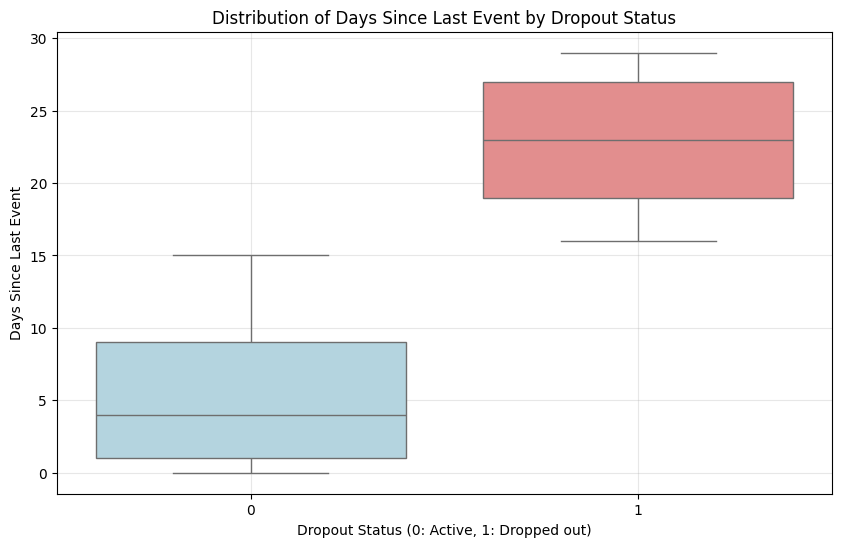

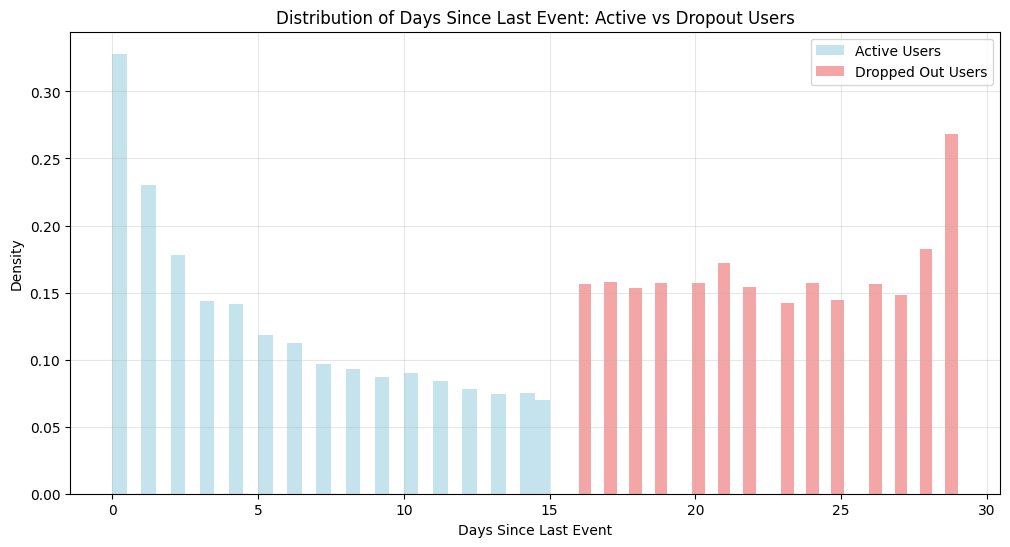

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data (assuming you have the dropout labels)
# For demonstration, I'll create a sample dropout column based on days_since_last_event
# You should replace this with your actual dropout labels



# Create sample dropout labels (replace with actual labels)
# Higher days_since_last_event suggests higher dropout probability
snapshots_hist['dropout'] = (snapshots_hist['days_since_last_event'] > 15).astype(int)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=snapshots_hist, x='dropout', y='days_since_last_event', palette=['lightblue', 'lightcoral'])
plt.xlabel('Dropout Status (0: Active, 1: Dropped out)')
plt.ylabel('Days Since Last Event')
plt.title('Distribution of Days Since Last Event by Dropout Status')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))

# Create histograms for each group
active_users = snapshots_hist[snapshots_hist['dropout'] == 0]['days_since_last_event']
dropout_users = snapshots_hist[snapshots_hist['dropout'] == 1]['days_since_last_event']

plt.hist(active_users, bins=30, alpha=0.7, label='Active Users', color='lightblue', density=True)
plt.hist(dropout_users, bins=30, alpha=0.7, label='Dropped Out Users', color='lightcoral', density=True)

plt.xlabel('Days Since Last Event')
plt.ylabel('Density')
plt.title('Distribution of Days Since Last Event: Active vs Dropout Users')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
snapshots = pd.read_csv('/content/drive/MyDrive/sql_chunk_cleaned/all_snapshots.csv')

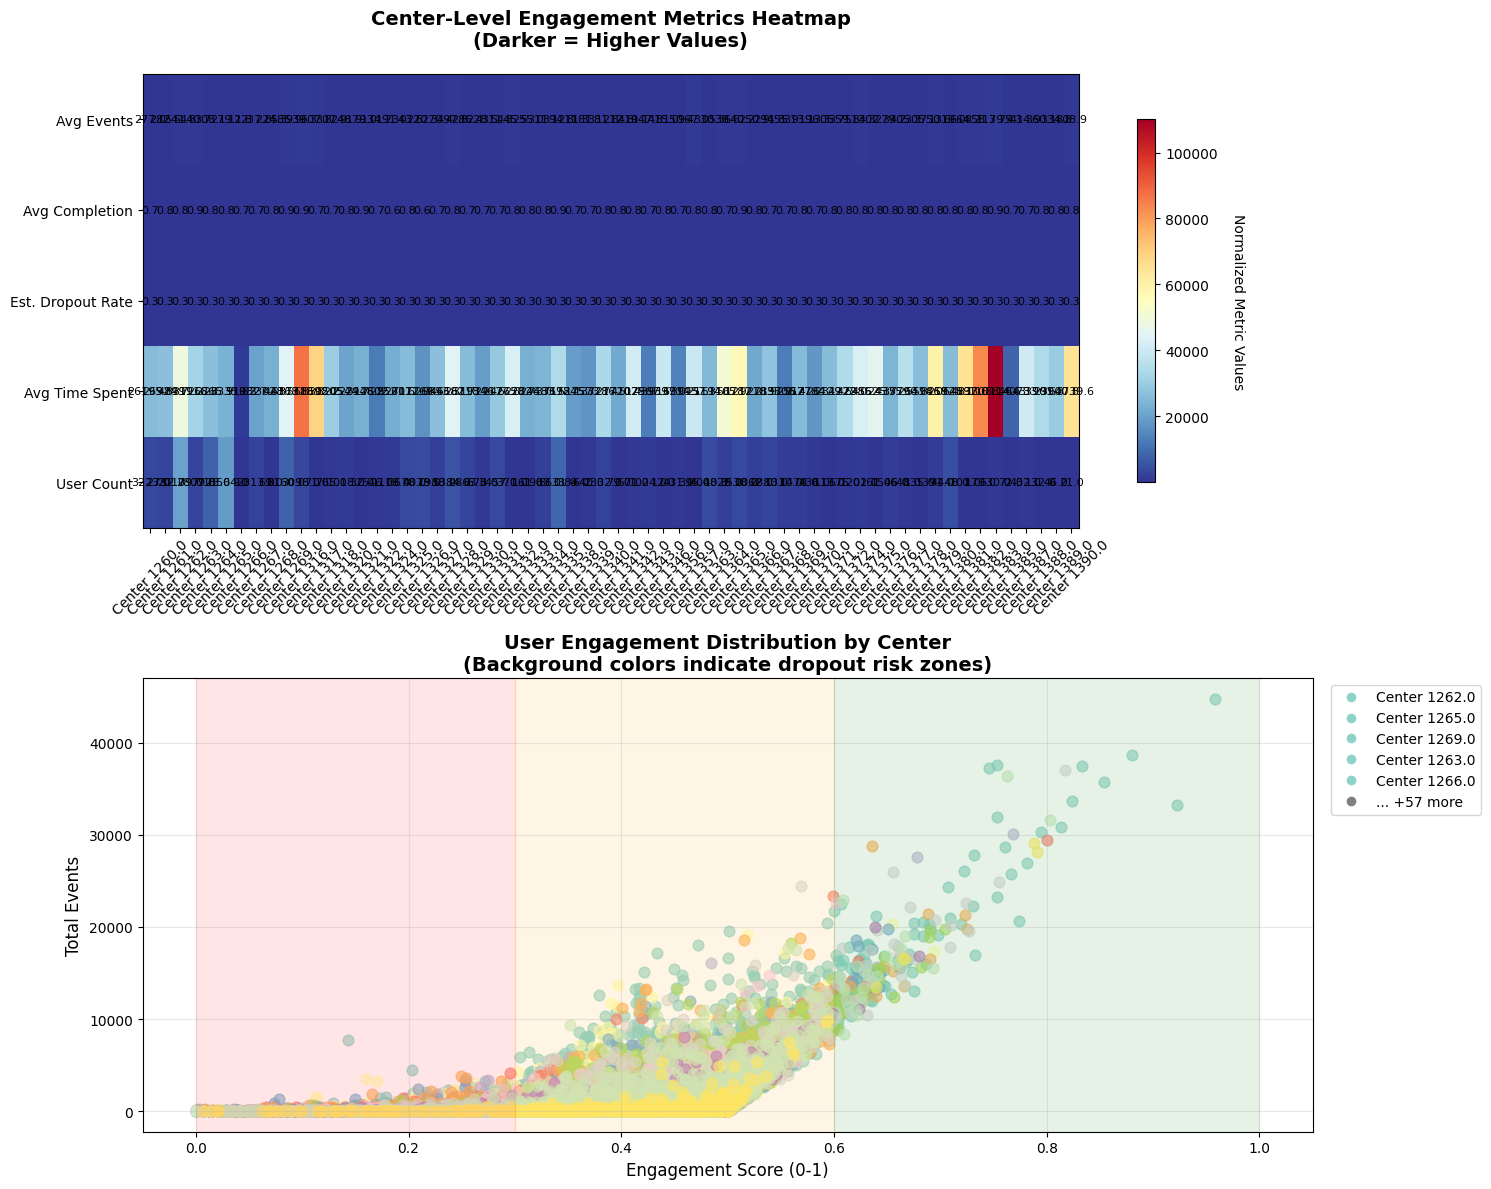


CENTER-WISE ENGAGEMENT SUMMARY
           Users  Avg_Events  Std_Events  Avg_Completion  Avg_Days_Inactive  Avg_Engagement  High Risk  Low Risk  Medium Risk
center_id                                                                                                                    
1260.0      3223     277.022     955.105           0.719             12.162           0.335      0.024     0.517        0.459
1261.0      2752     282.537     870.102           0.781             10.771           0.363      0.014     0.607        0.379
1262.0     20179     541.804    1774.169           0.811             11.369           0.370      0.012     0.593        0.395
1263.0      2807     440.660    1321.367           0.856             12.098           0.377      0.011     0.596        0.393
1264.0      7923     308.106     820.699           0.841             11.535           0.376      0.010     0.613        0.376
1265.0     18564     279.075     766.580           0.796             11.390           

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Assuming your data is in a DataFrame called 'df'
# If you need to load it from the JSON format you provided:
df = snapshots

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# ============================================================================
# VISUALIZATION 1: Center-Level Engagement vs Dropout Heatmap
# ============================================================================

# Group by center and calculate key metrics
center_metrics = df.groupby('center_id').agg({
    'total_events': ['mean', 'count'],
    'days_since_last_event': 'mean',
    'pct_completed': 'mean',
    'activity_trend': 'mean',
    'sum_component_time': 'mean'
}).round(2)

# Flatten column names
center_metrics.columns = ['avg_events', 'user_count', 'avg_days_inactive',
                         'avg_completion', 'avg_activity_trend', 'avg_time_spent']

# Add a synthetic dropout indicator (since actual dropout label isn't visible in sample)
# You should replace this with your actual dropout column
center_metrics['estimated_dropout_rate'] = np.where(
    (center_metrics['avg_days_inactive'] > 20) &
    (center_metrics['avg_completion'] < 0.5),
    0.7, 0.3
)

# Create heatmap data
heatmap_data = center_metrics[['avg_events', 'avg_completion', 'estimated_dropout_rate',
                              'avg_time_spent', 'user_count']].T

# Plot heatmap
im = axes[0].imshow(heatmap_data.values, cmap='RdYlBu_r', aspect='auto')
axes[0].set_xticks(range(len(heatmap_data.columns)))
axes[0].set_xticklabels([f'Center {c}' for c in heatmap_data.columns], rotation=45)
axes[0].set_yticks(range(len(heatmap_data.index)))
axes[0].set_yticklabels(['Avg Events', 'Avg Completion', 'Est. Dropout Rate',
                        'Avg Time Spent', 'User Count'])

# Add text annotations
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        text = axes[0].text(j, i, f'{heatmap_data.iloc[i, j]:.1f}',
                           ha="center", va="center", color="black", fontsize=8)

axes[0].set_title('Center-Level Engagement Metrics Heatmap\n(Darker = Higher Values)',
                 fontsize=14, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(im, ax=axes[0], shrink=0.8)
cbar.set_label('Normalized Metric Values', rotation=270, labelpad=20)

# ============================================================================
# VISUALIZATION 2: Engagement Distribution with Risk Segmentation
# ============================================================================

# Create engagement score
df['engagement_score'] = (
    (df['total_events'] / df['total_events'].max()) * 0.3 +
    (df['pct_completed']) * 0.3 +
    (1 - df['days_since_last_event'] / df['days_since_last_event'].max()) * 0.2 +
    (df['sum_component_time'].astype(float) / df['sum_component_time'].astype(float).max()) * 0.2
)

# Create risk categories
def categorize_risk(row):
    if row['days_since_last_event'] > 25 and row['pct_completed'] < 0.3:
        return 'High Risk'
    elif row['days_since_last_event'] > 15 or row['pct_completed'] < 0.5:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['risk_category'] = df.apply(categorize_risk, axis=1)

# Create scatter plot with center clustering
centers = df['center_id'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(centers)))
center_colors = dict(zip(centers, colors))

for center in centers:
    center_data = df[df['center_id'] == center]
    axes[1].scatter(center_data['engagement_score'],
                   center_data['total_events'],
                   c=[center_colors[center]],
                   alpha=0.6,
                   s=60,
                   label=f'Center {center}')

# Add risk zone backgrounds
axes[1].axvspan(0, 0.3, alpha=0.1, color='red', label='High Risk Zone')
axes[1].axvspan(0.3, 0.6, alpha=0.1, color='orange', label='Medium Risk Zone')
axes[1].axvspan(0.6, 1.0, alpha=0.1, color='green', label='Low Risk Zone')

axes[1].set_xlabel('Engagement Score (0-1)', fontsize=12)
axes[1].set_ylabel('Total Events', fontsize=12)
axes[1].set_title('User Engagement Distribution by Center\n(Background colors indicate dropout risk zones)',
                 fontsize=14, fontweight='bold')

# Add legend with limited entries to avoid clutter
legend_elements = []
for i, center in enumerate(centers[:5]):  # Show only first 5 centers in legend
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor=center_colors[center],
                                     markersize=8, label=f'Center {center}'))

if len(centers) > 5:
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor='gray',
                                     markersize=8, label=f'... +{len(centers)-5} more'))

axes[1].legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1))

# Add grid for better readability
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# BONUS: Summary Statistics Table
# ============================================================================

print("\n" + "="*80)
print("CENTER-WISE ENGAGEMENT SUMMARY")
print("="*80)

summary_stats = df.groupby('center_id').agg({
    'total_events': ['count', 'mean', 'std'],
    'pct_completed': 'mean',
    'days_since_last_event': 'mean',
    'engagement_score': 'mean'
}).round(3)

summary_stats.columns = ['Users', 'Avg_Events', 'Std_Events', 'Avg_Completion',
                        'Avg_Days_Inactive', 'Avg_Engagement']

# Add risk distribution
risk_dist = df.groupby(['center_id', 'risk_category']).size().unstack(fill_value=0)
risk_pct = risk_dist.div(risk_dist.sum(axis=1), axis=0).round(3)

# Combine summary with risk percentages
final_summary = pd.concat([summary_stats, risk_pct], axis=1)
print(final_summary.to_string())

print(f"\nTotal Centers Analyzed: {len(centers)}")
print(f"Total Users: {len(df)}")
print(f"Overall Engagement Score: {df['engagement_score'].mean():.3f} (±{df['engagement_score'].std():.3f})")

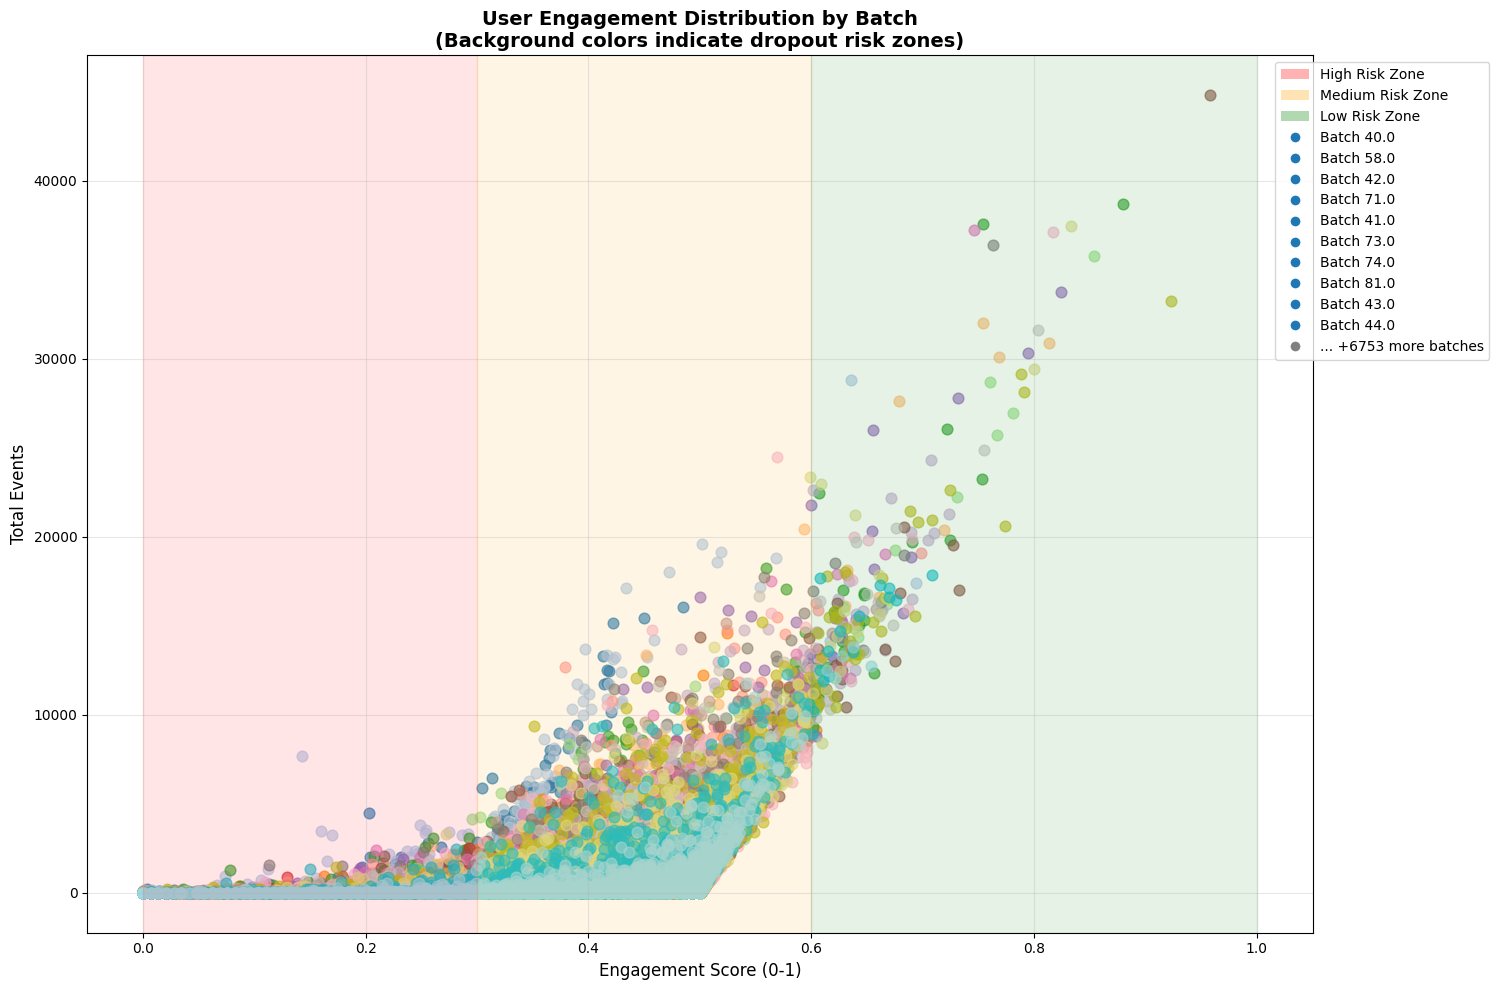

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# ============================================================================
# VISUALIZATION: Engagement Distribution by Batch with Risk Segmentation
# ============================================================================

# Create engagement score
df['engagement_score'] = (
    (df['total_events'] / df['total_events'].max()) * 0.3 +
    (df['pct_completed']) * 0.3 +
    (1 - df['days_since_last_event'] / df['days_since_last_event'].max()) * 0.2 +
    (df['sum_component_time'].astype(float) / df['sum_component_time'].astype(float).max()) * 0.2
)

# Create risk categories
def categorize_risk(row):
    if row['days_since_last_event'] > 25 and row['pct_completed'] < 0.3:
        return 'High Risk'
    elif row['days_since_last_event'] > 15 or row['pct_completed'] < 0.5:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['risk_category'] = df.apply(categorize_risk, axis=1)

# Get unique batches and create color mapping
batches = df['batch_id'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(batches)))
batch_colors = dict(zip(batches, colors))

# Create scatter plot with batch clustering
for batch in batches:
    batch_data = df[df['batch_id'] == batch]
    ax.scatter(batch_data['engagement_score'],
               batch_data['total_events'],
               c=[batch_colors[batch]],
               alpha=0.6,
               s=60,
               label=f'Batch {batch}')

# Add risk zone backgrounds
ax.axvspan(0, 0.3, alpha=0.1, color='red', label='High Risk Zone')
ax.axvspan(0.3, 0.6, alpha=0.1, color='orange', label='Medium Risk Zone')
ax.axvspan(0.6, 1.0, alpha=0.1, color='green', label='Low Risk Zone')

ax.set_xlabel('Engagement Score (0-1)', fontsize=12)
ax.set_ylabel('Total Events', fontsize=12)
ax.set_title('User Engagement Distribution by Batch\n(Background colors indicate dropout risk zones)',
             fontsize=14, fontweight='bold')

# Add legend with limited entries to avoid clutter
legend_elements = []

# Add risk zone legends first
legend_elements.append(plt.Rectangle((0, 0), 1, 1, facecolor='red', alpha=0.3, label='High Risk Zone'))
legend_elements.append(plt.Rectangle((0, 0), 1, 1, facecolor='orange', alpha=0.3, label='Medium Risk Zone'))
legend_elements.append(plt.Rectangle((0, 0), 1, 1, facecolor='green', alpha=0.3, label='Low Risk Zone'))

# Add batch legends (show first 10 batches to avoid overcrowding)
for i, batch in enumerate(batches[:10]):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor=batch_colors[batch],
                                     markersize=8, label=f'Batch {batch}'))

if len(batches) > 10:
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor='gray',
                                     markersize=8, label=f'... +{len(batches)-10} more batches'))

ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1))

# Add grid for better readability
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

